In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D

import xspec as x
#import os

#%matplotlib notebook

#import sys
#sys.stdout = open('/dev/stdout', 'w')
#sys.stderr = open('/dev/stderr', 'w')

In [6]:
x.Xset.chatter = 0
#x.Xset.logChatter = 25

# Create and open a log file for XSPEC output
# This returns a Python file object
logFile = x.Xset.openLog("newLogFile.txt")
# Get the Python file object for the currently opened log
#logFile = x.Xset.log
# Close XSPEC's currently opened log file.
#x.Xset.closeLog()

# 1. LINES ONLY

В этом блоке представлен алгоритм для вычисления $T_{spec}$ по спектрам (с преобладанием линий) двухкомпонентной плазмы разными способами и отображения его как на Рис.3 из публикации Вихлинина.

## 1.1 $T_{spec}$ from E(T)

Defining functions to draw $E \ (T)$:

In [7]:
def f(temperature, eMean, tList): 
    
    # <E> = f(T)
    #returns energy
    
    return eMean[np.argmin(np.abs(tList - temperature))]

    
def f_inv(energy, eMean, tList): 
    
    # T = f^(-1) (<E>)
    #returns temperature
    
    return tList[np.argmin(np.abs(eMean - energy))]
    
    
def get_data(dataName, show_table=False):
    
    # extracts data obtained from stats.sh
    # dataName is stats_NN.dat

    headers = [ 'Flux', 'Abund', 'T', 'z', 'n_H', 'Chnls', '$E_{min}$', '$E_{max}$', '$E_{sum}$', 'cs', 'ecs' ] 
    table = pd.read_csv(dataName, sep = ' ', names = headers)
    
    # adding column with E_mean
    
    table['$E_{mean}$'] = table['ecs']/table['cs']
    
    if show_table:
        display(table)
        
    # returns table as numpy array (?)
    
    return table.to_numpy().astype(float)
    

def plot_E_T(dataName, spectra_type, telescope):
    
    # plotting <E>(T) as in Fig.2 for given dataName
    # you should add spectra type and telescope name by yourself
    
    # possible values:
    # spectra_type = 'Line' or sectra_type = 'Continuum'
    # telescope = 'Chandra' or telescope = 'SRG/eROSITA'

    #print(dataName)
    #headers = [ 'Flux', 'Abund', 'T', 'z', 'n_H', 'Chnls', '$E_{min}$', '$E_{max}$', '$E_{sum}$', 'cs', 'ecs' ] 
    #table = pd.read_csv(dataName, sep = ' ', names = headers)
    #adding column with E_mean
    #table['$E_{mean}$'] = table['ecs']/table['cs'] 
    #data = table.to_numpy().astype(float)
    
    data = get_data(dataName, show_table=False)
    
    e_mean = data[:,11]
    temp = data[:,2]
    
    # taking first ever values of corresponding characteristics 
    
    #abundance = table['Abund'].to_numpy().astype(float)[0]
    #absorption = table['n_H'].to_numpy().astype(float)[0]
    #redshift = table['z'].to_numpy().astype(float)[0]
    
    abundance = data[0, 1]
    absorption = data[0, 4]
    redshift = data[0, 3]
    
    plt.plot(temp, e_mean, linewidth = 3, label = spectra_type + ', ' + telescope)
    
    plt.ylim(0, 3)
    plt.xlabel('Temperature (keV)', fontsize = 15)
    plt.ylabel('Average energy (keV)', fontsize = 15)
    plt.title(spectra_type + '-dominated spectra (' + telescope + 
              ') \n $n_H =' + str(absorption) + '\cdot 10^{22} \ cm^{-2}$; z = ' + 
              str(redshift), fontsize = 15) # +'; Z = '+str(abundance)+' Solar units')
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xscale('log')
    #plt.yscale('log')
    #plt.grid()
    plt.legend(fontsize = 15, loc=2)

    #return data[:,11], data[:,2]
    #return e_mean, temp
    
def add_T(Tmin, Tmax, dataName):
    
    # adding vertical lines for given temperatures
    # and horizontal lines for corresponding energies
    
    data = get_data(dataName, show_table=False)
    
    eMean = data[:,11]
    tList = data[:,2]
    
    plt.axvline(Tmin, linewidth=3, linestyle="--", color='red')
    plt.axvline(Tmax, linewidth=3, linestyle="--", color='green')
    
    #E_min = e_mean[np.argmin(np.abs(temp - Tmin))]
    #E_max = e_mean[np.argmin(np.abs(temp - Tmax))]
    E_min = f(Tmin, eMean, tList)
    E_max = f(Tmax, eMean, tList)
    
    print('E_max =', round(E_max,2), 'keV')
    print('E_min =', round(E_min,2), 'keV')
    
    plt.axhline(E_min, linewidth=3, linestyle="--", color='red', label='$E_{min}, T_{min}$')
    plt.axhline(E_max, linewidth=3, linestyle="--", color='green', label='$E_{max}, T_{max}$')
    
    plt.legend(fontsize=15, loc = 4)

Построим графики зависимости средних энергий от температуры для различных спектров и телескопов. Эти зависимости получены в результате выполнения скрипта `stats.sh`.

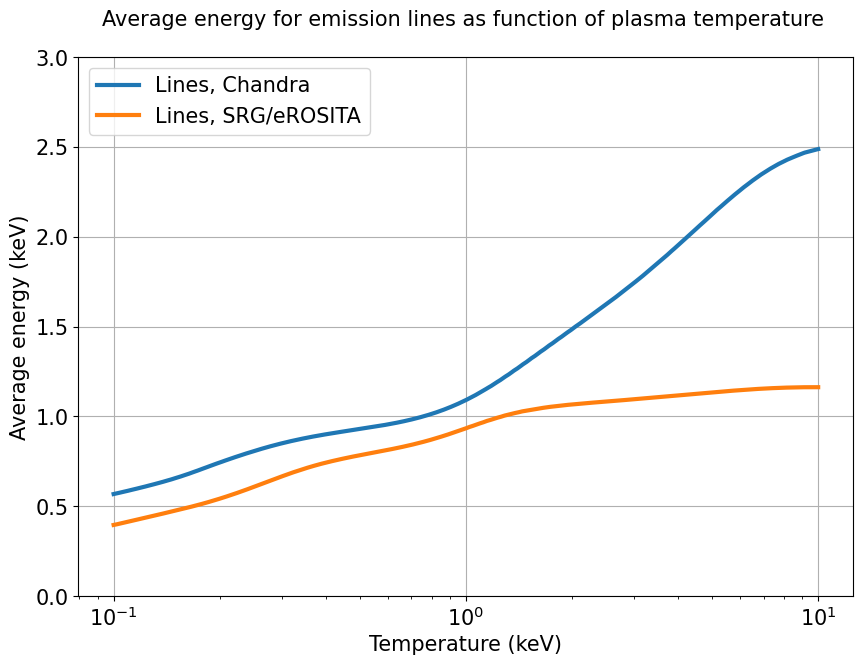

In [8]:
plt.figure(figsize=(10,7))

data_name1 = "data/stats_03.dat"   #'Lines, CH'
data_name2 = "data/stats_11.dat"   #'Cont, CH'
data_name3 = "data/stats_10.dat"   #'Lines, ER'
data_name4 = "data/stats_13.dat"   #'Cont, ER'
data_name5 = "data/stats_07.dat"   #'Lines, ER'
data_name6 = "data/stats_12.dat"   #'Lines, ER'

plot_E_T(data_name1, 'Lines', 'Chandra')
#plot_E_T(data_name2, 'Continuum', 'Chandra')
plot_E_T(data_name3, 'Lines', 'SRG/eROSITA')
#plot_E_T(data_name4, 'Continuum', 'SRG/eROSITA')
#plot_E_T(data_name6, 'Line2', 'er')


#for i in ['02', '03', '05', '08', '14', '15', '04', '16']:
#        dn = "data/stats_"+str(i)+".dat"
#        plot_E_T(dn, str(i), 'Chandra')

        
#plt.xscale('linear')

#add_T(1.0, 3.0, data_name1)

# comment if there is only one E(T)
# this move deletes unique titles
plt.title('Average energy for emission lines as function of plasma temperature \n', fontsize=15)
plt.grid()
#plt.savefig('letter26.10/Fig2.png')
plt.show()

Алгоритм вычисления $T_{spec}$ по графикам $E \ (T)$ согласно формулам (1-3):

In [9]:
def get_Tspec_lines(fmin, Tmin, Tmax, Data):
    
    # derive T_spec from given values 
    # of T_min, T_max, f_min and for given <E>(T)

    E_1 = f(Tmin, Data[:,11], Data[:,2])
    E_2 = f(Tmax, Data[:,11], Data[:,2])

    S_j_1 = Data[np.argmin(np.abs(Data[:,2] - Tmin)), 9]
    S_j_2 = Data[np.argmin(np.abs(Data[:,2] - Tmax)), 9]
    
    #print(Data[np.argmin(np.abs(tList - Tmin)),9], Data[np.argmin(np.abs(tList - Tmax)),9])
    #print()

    num =    fmin*S_j_1*E_1 + (1-fmin)*S_j_2*E_2
    denom =  fmin*S_j_1     + (1-fmin)*S_j_2
    
    #Etot = num/denom
    #Tspec = f_inv(Etot, Data[:,11], Data[:,2])
    #plt.scatter(fmin, Tspec, color="blue")

    return f_inv(num/denom, Data[:,11], Data[:,2])


def plot_Tspec_fmin(Tmin, Tmax, N_fmins, Data, naive=False, lstyle = '-', cline = 'blue'):

    # draw plot like Fig.3

    f_min = np.linspace(0, 1, N_fmins+1)
    
    #naive weighting
    if naive:
        plt.plot(f_min, f_min*T_min+(1-f_min)*T_max, linestyle = '--', linewidth=2, color='black')

    T_spec = f_min*0

    for i in range(0, len(f_min)):

        T_spec[i] = get_Tspec_lines(f_min[i], T_min, T_max, Data)

    #print('*************')

    plt.plot(f_min, T_spec, linewidth=2, linestyle = lstyle, color = cline)
    #, label='eq. [1-3]')#'from '+str(T_max)+' to '+str(T_min))

def plot_Tspec_fmin_details():  
    
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel('$f_{min}$', fontsize = 15)
    plt.ylabel('$T_{spec}$ (keV)', fontsize = 15)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    line_n = Line2D([], [], label='Naive weighting', color='black', linestyle='--', linewidth=2)
    line_e = Line2D([], [], label='$T_{spec}$ from eq. [1-3]', color='blue', linestyle='-', linewidth=2)
    dots_f = Line2D([], [], label='Single-T fit', color='black', marker='.', linestyle='None', markersize=12)
    handles.extend([line_n, line_e, dots_f])
    plt.legend(handles=handles, fontsize=15)

## 1.2 $T_{spec}$ from direct fit

In [147]:
def draw_model(nrm, linesandcont):
    
    x.Plot("model")
    x.Plot.add = True
    #x.Plot.setID()
    xVals = x.Plot.x()
    modVals = x.Plot.model()
    yAdd1 = x.Plot.addComp(1)
    yAdd2 = x.Plot.addComp(2)
    plt.plot(xVals, modVals, linewidth = 3, label='Initial model', color='black')
    if linesandcont:
        yAdd3 = x.Plot.addComp(3)
        yAdd4 = x.Plot.addComp(4)
        yAdd12 = [a+b for a,b in zip(yAdd1, yAdd2)]
        yAdd34 = [c+d for c,d in zip(yAdd3, yAdd4)]
    else:
        yAdd12 = yAdd1
        yAdd34 = yAdd2
    plt.plot(xVals, yAdd12, linewidth = 2, linestyle = ":", 
             label=f'Low T', color='red')
    plt.plot(xVals, yAdd34, linewidth = 2, linestyle = "--", 
             label=f'High T', color='green')
    #plt.plot(xVals, yAdd12, label='sum 1 2')
    #plt.plot(xVals, yAdd34, label='sum 3 4')
    #plt.plot(xVals, yAdd3, label='3')
    #plt.plot(xVals, yAdd4, label='4')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.1, 14)
    plt.ylim(bottom=10**(-7), top=10**(1.5)*nrm)
    plt.legend(fontsize = 15, loc=1)
    add_plt_fancy()
    #plt.show()
    
def draw_best_model(nrm, linesandcont):
    
    x.Plot("model")
    modVals = x.Plot.model()
    xVals = x.Plot.x()
    if linesandcont:
        y1 = x.Plot.addComp(1)
        y2 = x.Plot.addComp(2)
        plt.plot(xVals, y1, label="APEC: Z=$Z_{{from \ fit}}$")
        #plt.plot(xVals, y2, label="APEC: Z=0")
        plt.plot(xVals, [-aa for aa in y2], label='APEC: Z=0', linestyle = '-.')
        #plt.plot(xVals, [c+d for c,d in zip(y1, y2)], label='sum')
    plt.plot(xVals, modVals, label=f"Best-fit", color='blue', alpha=0.3)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.1, 14)
    plt.ylim(bottom=10**(-6), top=10**(1.5)*nrm)
    add_plt_fancy()
    #plt.title(f"Best-fit model (reduced $\\chi^2=$ {x.Fit.statistic/x.Fit.dof:.3f})", fontsize = 15)
    #plt.show()
    
def draw_goodness():
    
    x.Plot("goodness")
    xValsG = x.Plot.x()
    yValsG = x.Plot.y()
    #print(xValsG, yValsG)
    #plt.hist(yValsG, bins=xValsG)
    plt.bar(xValsG, height=yValsG, width = (np.min(xValsG)-np.max(xValsG))/len(xValsG))
    #plt.plot(xValsG, yValsG, label="goodness")
    plt.xlabel(x.Plot.labels()[0], fontsize = 15)
    plt.ylabel(x.Plot.labels()[1], fontsize = 15)
    plt.title(x.Plot.labels()[2], fontsize = 15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.axvline(x.Fit.statistic, linestyle = "--", color='red', linewidth = 3)
    
def draw_data_and_best_model(nrm, linesandcont):
    
    x.Plot("data")
    x.Plot.xAxis = "keV"
    x.Plot.add = True
    xVals = x.Plot.x()
    yVals = x.Plot.y()
    if linesandcont:
        y1 = x.Plot.addComp(1)
        y2 = x.Plot.addComp(2)
    modVals = x.Plot.model()
    #plt.plot(xVals, modVals, linewidth = 5, color = 'green')
    plt.yscale('log')
    #plt.plot(xVals, yVals, label='Data', color='black') 
    xErrs = x.Plot.xErr()
    yErrs = x.Plot.yErr()
    plt.errorbar(xVals, yVals, yErrs, xErrs, 
                 fmt = "none", ecolor = "black", label="Data with errors")
    if linesandcont:
        plt.plot(xVals, y1, label="APEC: Z=$Z_{{from \ fit}}$")
        plt.plot(xVals, [-aa for aa in y2], label="APEC: Z=0")
        summa = [c+d for c,d in zip(y1, y2)]
        plt.plot(xVals, summa, label='Best-fit', color='red') #modVals = summa
    else:
        plt.plot(xVals, modVals, label='Best-fit', color='red')
    add_plt_fancy()
    plt.xlabel("")
    plt.ylim(0.0001, 10**4*nrm)
    plt.title(f"Data and best-fit model (reduced $\\chi^2=$ {x.Fit.statistic/x.Fit.dof:.3f})", fontsize = 15)
    
    plt.subplot(6,2,6)
    x.Plot("resid")
    #plt.subplot(2,2,4)
    xValsR = x.Plot.x()
    yValsR = x.Plot.y()
    xErrsR = x.Plot.xErr()
    yErrsR = x.Plot.yErr()
    plt.errorbar(xValsR, yValsR, yErrsR, xErrsR, 
                 fmt = "none", ecolor = "black", label="errors")
    if not linesandcont:
        summa = modVals
    plt.scatter(xValsR, [a-b for a,b in zip(yVals, summa)], s=3, 
                color='blue', label='data minus \nbest fit')
    add_plt_fancy()
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks([])

    plt.subplot(6,2,8)
    x.Plot("chi")
    #plt.subplot(2,2,4)
    xValsC = x.Plot.x()
    yValsC = x.Plot.y()
    #xErrsR = x.Plot.xErr()
    #yErrsR = x.Plot.yErr()
    plt.scatter(xValsC, yValsC, color = "black", label = "contribution to \n the fit statistic \n from each bin")
    add_plt_fancy()
    plt.title(x.Plot.labels()[1], fontsize = 14)
    plt.ylabel("")
            
def add_plt_fancy():
    
    plt.xlabel(x.Plot.labels()[0], fontsize = 14)
    plt.ylabel(x.Plot.labels()[1], fontsize = 14)
    plt.title(x.Plot.labels()[2], fontsize = 14)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.xscale('log')
    plt.xticks([0.1, 1., 10.], [0.1, 1, 10])
    plt.legend(fontsize=15, loc=0)
    
#def add_background():
        #x.Plot("data")
        #bkg = x.Plot.backgroundVals()
        #plt.plot(xVals, yVals)
        
def print_parnames(MODEL):
    
    ncomp = len(MODEL.componentNames)
    for icomp in MODEL.componentNames:
        print (icomp, eval(f'MODEL.{icomp}.parameterNames'))

def perform_fakeit(tname, expos):

    if tname == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif tname == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'

    fs = x.FakeitSettings(response = RMF_NAME, 
                               arf = ARF_NAME, 
                        background = '', 
                          exposure = expos, 
                        correction = '', 
                      backExposure = '', 
                          fileName = 'fakeit.pha')
    x.AllData.fakeit(nSpectra = 1, 
                     settings = fs, 
                   applyStats = True,
                   filePrefix = "",
                      noWrite = True)
    
def plot_contours_from_steppar(Nst, par_x_num, par_y_num, mmmodel, zoomin=True):

    #x.Plot.device = "/xs"
    x.Plot.device = "/null"
    x.Plot("contour")
    #x.Plot.device = "/null"
    chi2 = x.Plot.z()
    #print(x.Fit.statistic, x.Plot.contourLevels())

    #plt.subplot(1,2,1)
    
    par_x = mmmodel(par_x_num).values[0]
    par_y = mmmodel(par_y_num).values[0]

    #x11 = np.linspace(best_kT-0.005, best_kT+0.005, len(chi2))
    #y11 = np.linspace(abund_from_fit-0.01, abund_from_fit+0.01, len(chi2))
    #print(x11, y11)
    x11 = x.Fit.stepparResults(str(par_x_num))[0:Nst+1]
    y11 = x.Fit.stepparResults(str(par_y_num))[0::Nst+1]
    #print(x11, y11)
    X, Y = np.meshgrid(x11, y11)
    center = np.argwhere(chi2==np.min(chi2))[0]
    #plt.contour(X, Y, XCYC, levels=[x.Fit.statistic], colors='yellow')
    center_x = X[center[0]][center[1]]
    center_y = Y[center[0]][center[1]]

    #plt.contourf(X, Y, XCYC, 20, cmap='jet')

    contours = plt.contour(X, Y, chi2, levels=x.Plot.contourLevels(), colors='red')
    #plt.clabel(contours, inline=True, fontsize=8)
    
    exxxt = [x11[0], x11[-1], y11[0], y11[-1]]
    plt.xlim(x11[0], x11[-1])
    plt.ylim(y11[0], y11[-1])
    
    if zoomin:
        #for ii, seg in enumerate(contours.allsegs[2]):
        #    xleft, xright = np.min(seg), np.max(seg)
        #    print(np.min(seg), np.max(seg))
        #    plt.plot(seg[:,0], seg[:,1], '.-', label=ii)
        #plt.legend(fontsize=9, loc='best')

        #print(len(contours.allsegs), contours.allsegs)

        # finding borders of 3sigma level (or 2sigma) for fancier imshow
        seg = contours.allsegs[len(contours.allsegs)-1]
        x_left = np.min(seg[0][:,0])
        x_right = np.max(seg[0][:,0])
        y_left = np.min(seg[0][:,1])
        y_right = np.max(seg[0][:,1])

        scale_n = 2
        x_c = (center_x + par_x)/2
        x_l = x_c - scale_n*( x_c - np.min([par_x, center_x, x_left])) #(best_kT - x_left)
        x_r = x_c + scale_n*(-x_c + np.max([par_x, center_x, x_right])) #(x_right - best_kT)
        y_c = (center_y + par_y)/2
        y_l = y_c - scale_n*( y_c - np.min([par_y, center_y, y_left])) #(abund_from_fit - y_left)
        y_r = y_c + scale_n*(-y_c + np.max([par_y, center_y, y_right])) #(y_right - abund_from_fit)

        plt.xlim(x_l, x_r)
        plt.ylim(y_l, y_r)
        exxxt = x_l, x_r, y_l, y_r
        
    plt.imshow(chi2, extent=exxxt, aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(fraction=0.046, pad=0.04)

    plt.scatter(center_x, center_y, marker='+', c='cyan', label=f'$X_{{centered}}={center_x:.3f}, Y_{{centered}}={center_y:.3f}$')
    plt.axvline(center_x, color='cyan', alpha=0.3)
    plt.axhline(center_y, color='cyan', alpha=0.3)

    plt.axvline(par_x, color='yellow', alpha=0.3)
    plt.axhline(par_y, color='yellow', alpha=0.3)
    plt.scatter(par_x, par_y, marker='+', color='yellow', label=f'$X_{{min \ \\chi^2}}={par_x:.3f}, Y_{{min \ \\chi^2}}={par_y:.3f}$')

    #seg0 = contours.allsegs[0]
    #dx_left = np.min(seg[0][:,0]) - center_x
    #dx_right = np.max(seg[0][:,0]) - center_x
    #dy_left = np.min(seg[0][:,1]) - center_x
    #dy_right = np.max(seg[0][:,1]) - center_x
    
    plt.xlabel(x.Plot.labels()[0], fontsize = 12)
    plt.ylabel(x.Plot.labels()[1], fontsize = 12)
    #titlelabels = [float(f"{a:.3f}") for a in x.Plot.contourLevels()]
    #plt.title(x.Plot.labels()[2]+f"\n Cyan cross = {x.Fit.statistic:.3f}; yellow cross = {chi2[center[0]][center[1]]:.3f} \n levels = {*titlelabels,}", fontsize = 12)
    plt.legend()
    #plt.show()
    
    #return dx_left, dx_right, dy_left, dy_right 

    #plt.subplot(1,2,2)
    # 3d
    #ax = plt.axes(projection='3d')
    #ax.contour3D(X, Y, chi2, 100, cmap='viridis')#, rstride=1, cstride=1, edgecolor='none')
    #ax.set_xlabel(x.Plot.labels()[0])
    #ax.set_ylabel(x.Plot.labels()[1])
    #ax.set_zlabel('Chi-Squared')
    #ax.set_xlim(x_l, x_r)
    #ax.set_ylim(y_l, y_r)
    #plt.colorbar(fraction=0.046, pad=0.04)
    #ax.view_init(60, 35)
    #plt.show()

def perform_steppar(mmmodel, par_x_num, par_x_delta, par_y_num, par_y_delta, Nst):
            
    best_X = mmmodel(par_x_num).values[0]
    best_Y = mmmodel(par_y_num).values[0]
    x.Xset.parallel.steppar = 4
    N_steps = Nst
    par1_delta = par_x_delta
    par2_delta = par_y_delta
    x.Fit.steppar(f"{par_x_num} {best_X-par1_delta} {best_X+par1_delta} {N_steps} {par_y_num} {best_Y-par2_delta} {best_Y+par2_delta} {N_steps}")
    #print(x.Fit.stepparResults('2'))

## PyXspec

Defining a function that calculates single-temperature fit for two-component plasma (with line-dominated spectra) of temperatures $T_{min}$ and $T_{max}$ and relative contributions $f_{min}$ and $f_{max}$ respectively.

Note: to get rid of trace elements for pure bremsstrahlung use `xset APEC_TRACE_ABUND 0`.

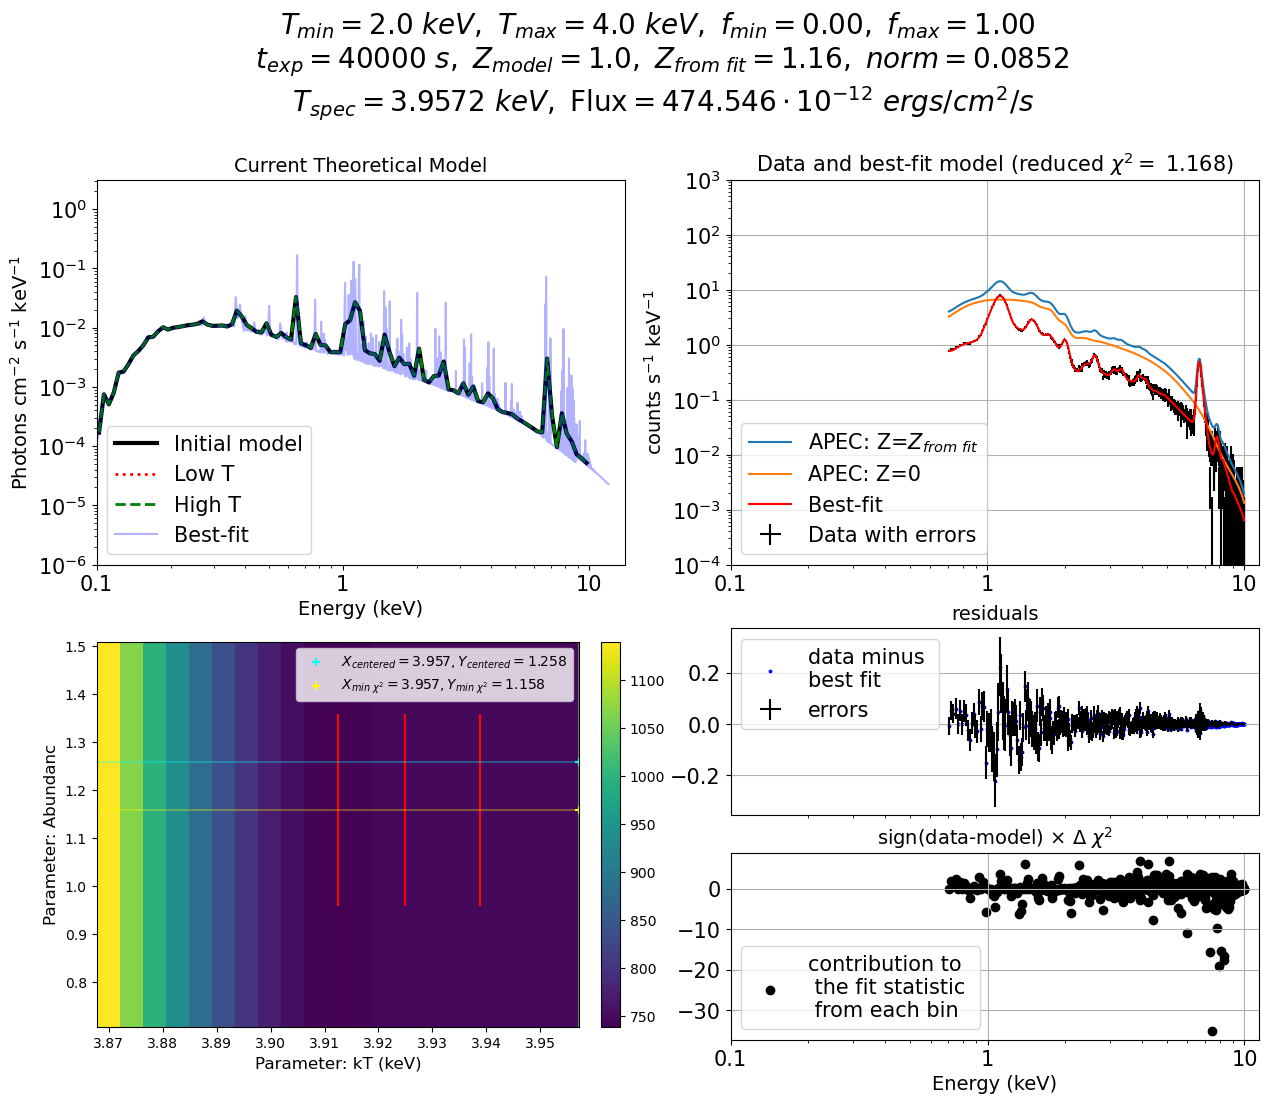

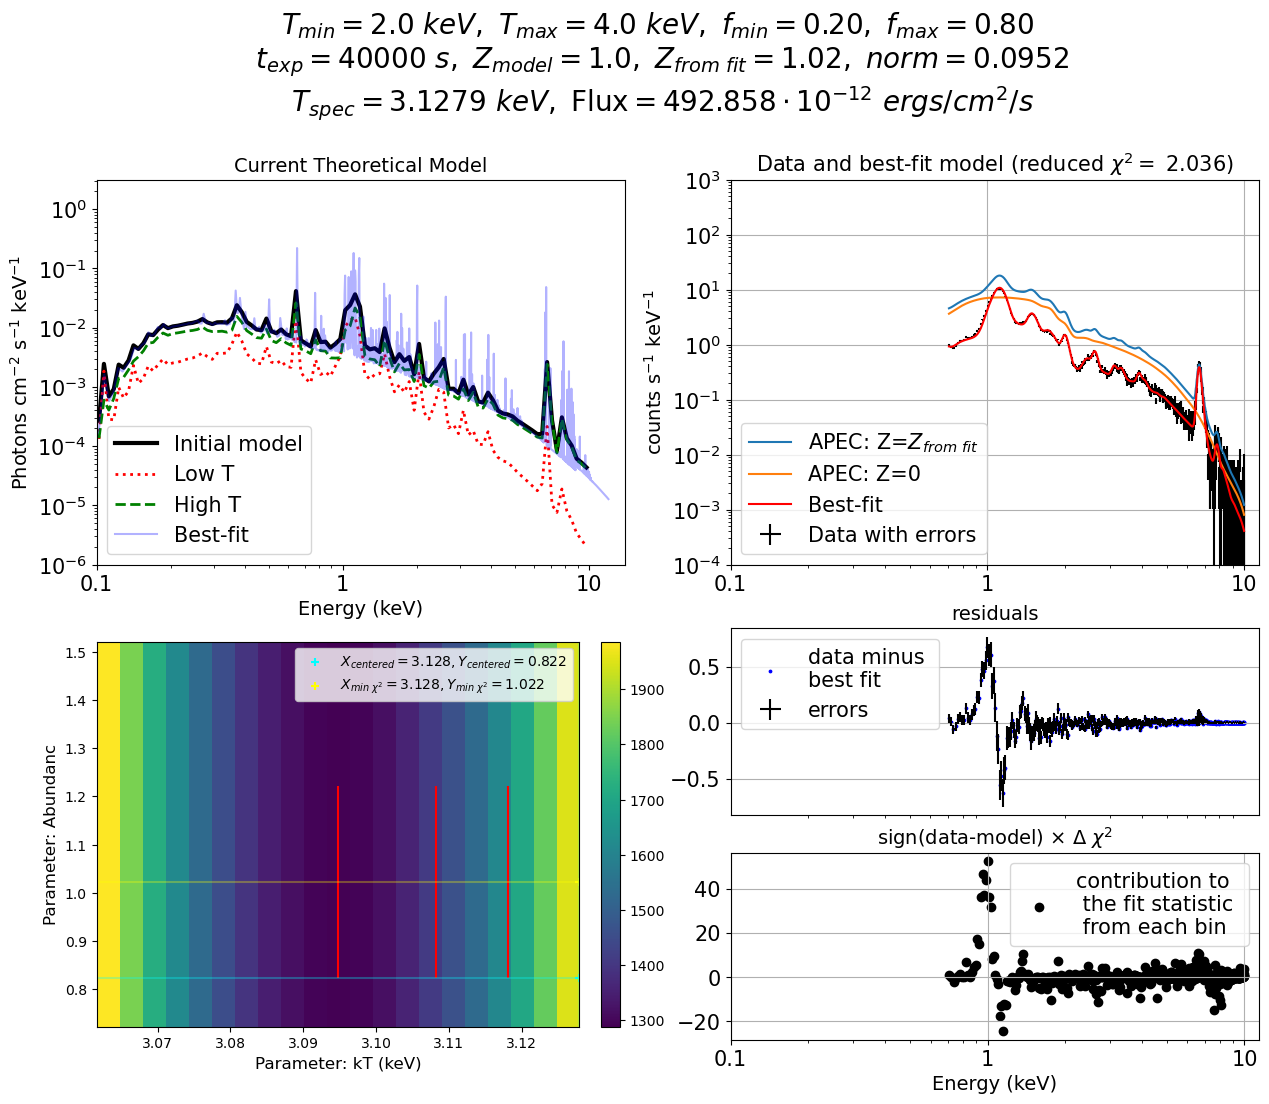

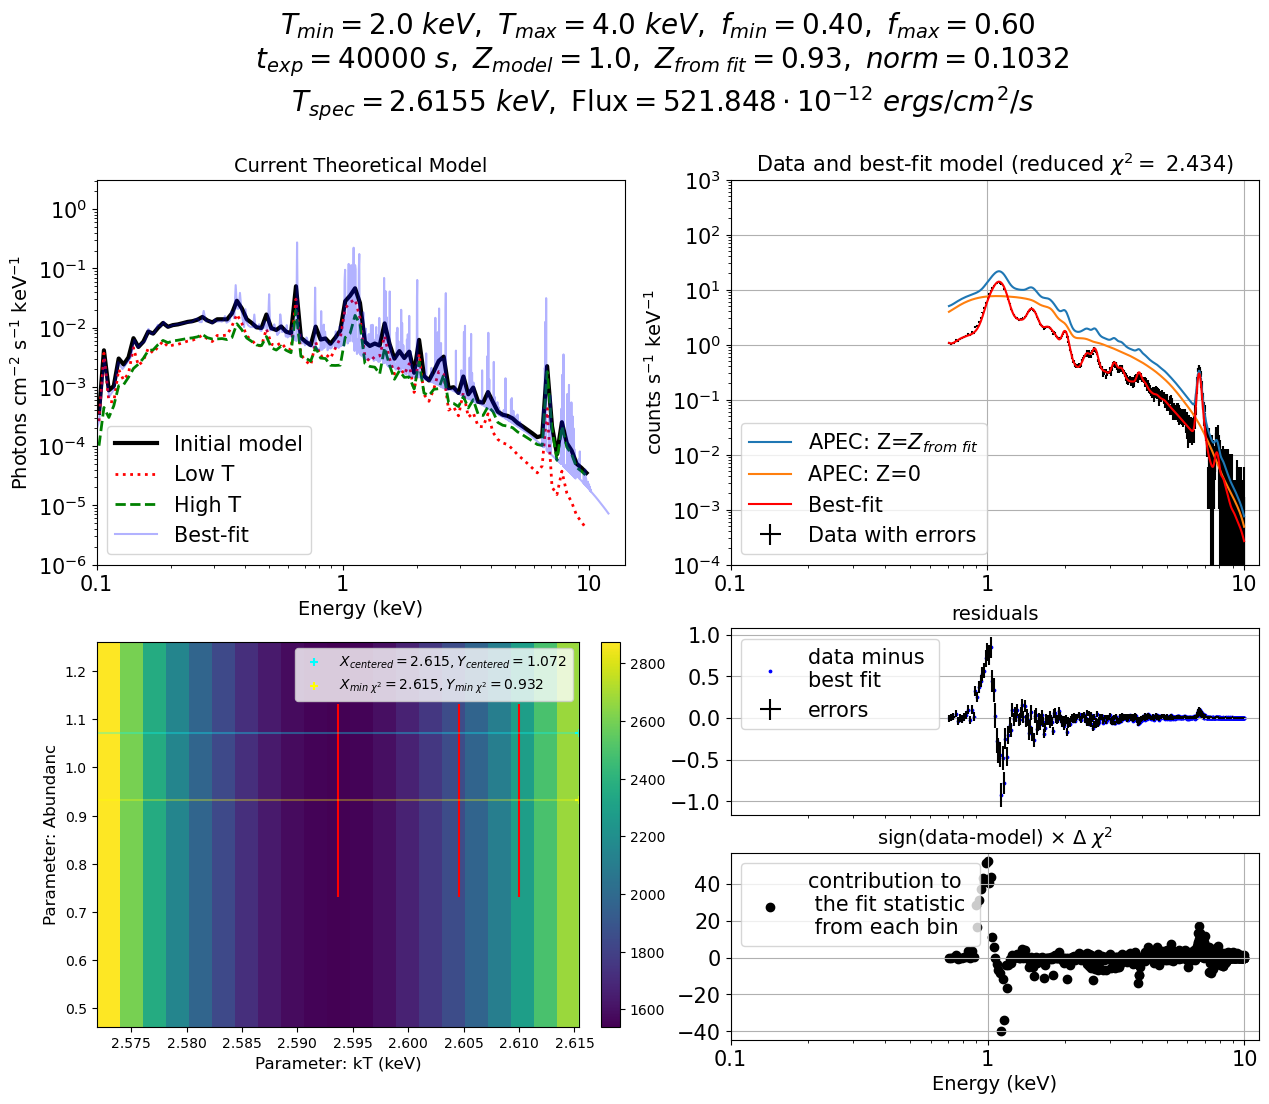

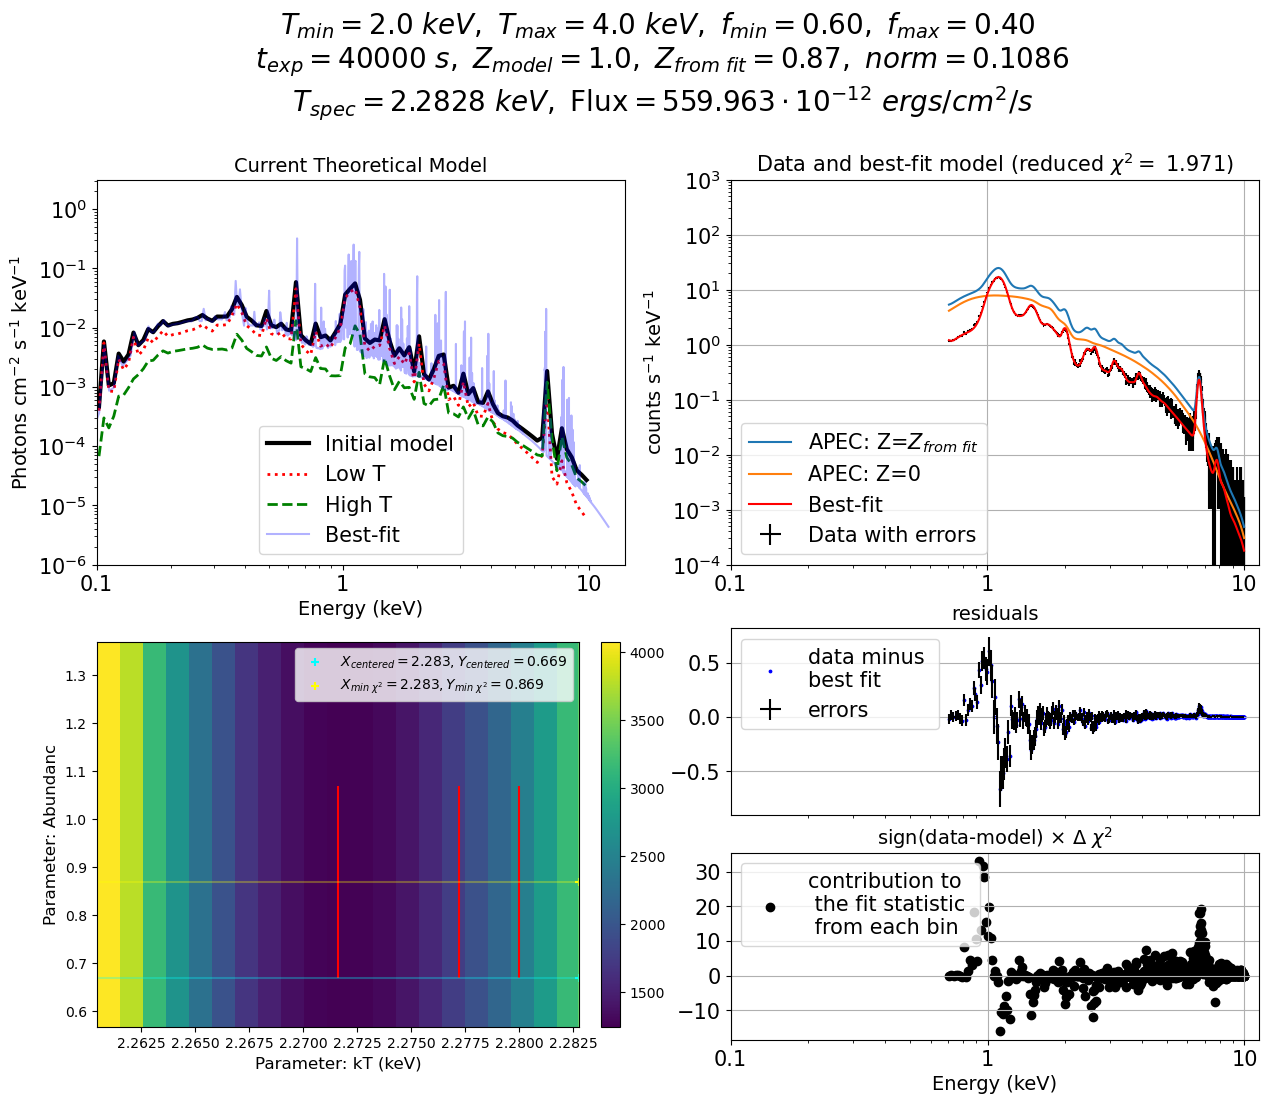

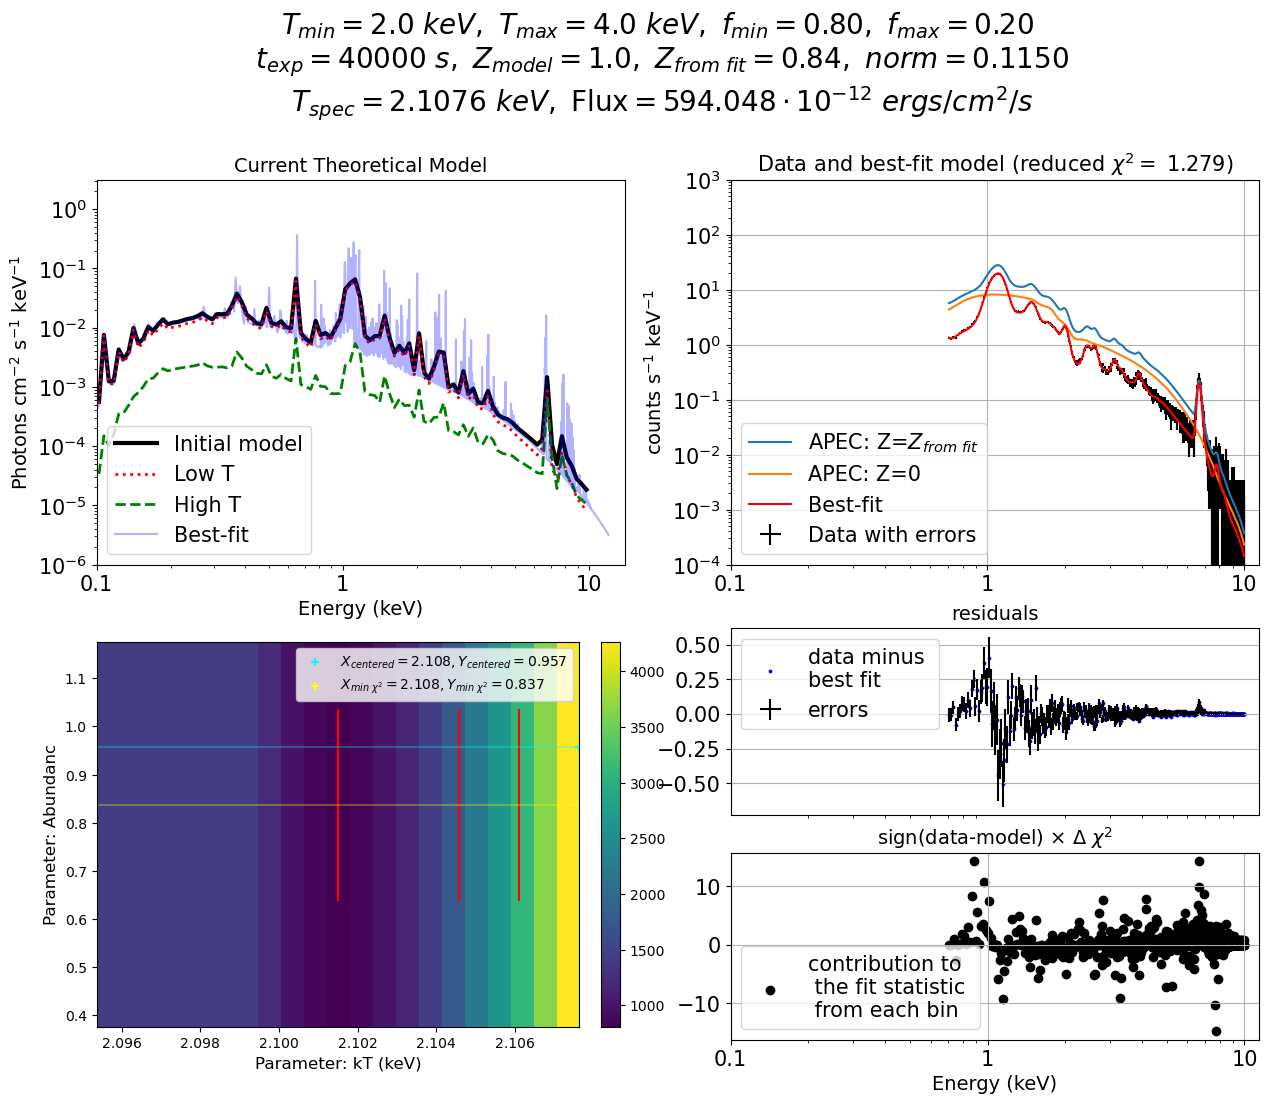

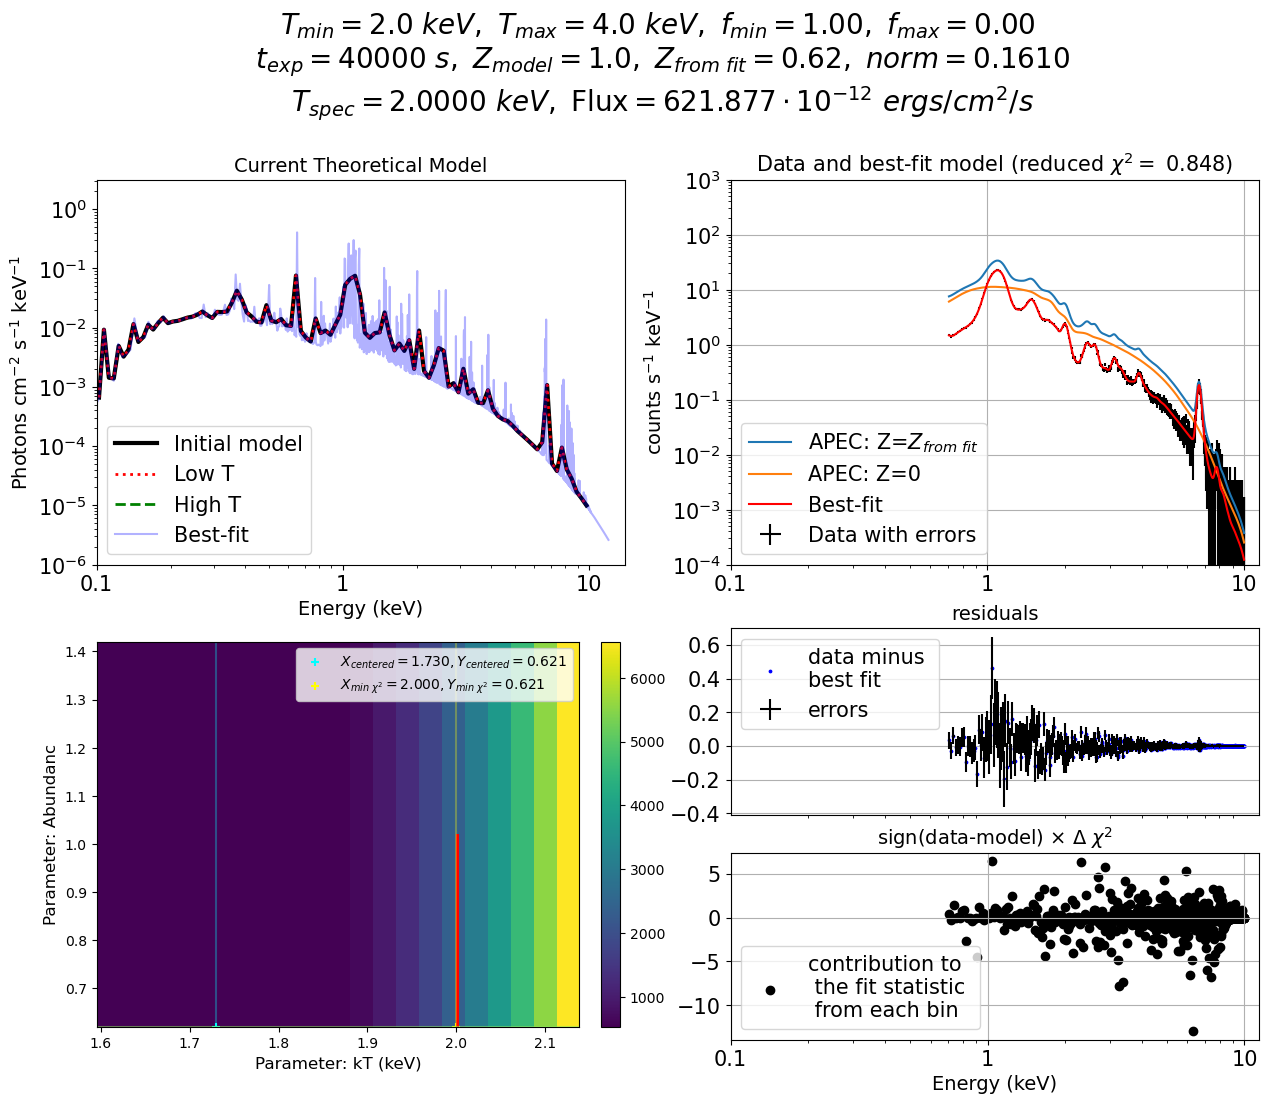

T:  [3.9572489001129525, 3.1279317571961363, 2.6154521973695335, 2.282794406890329, 2.107642181593094, 2.0]
F:  [4.745462557684153e-10, 4.9285816301265e-10, 5.218477656134521e-10, 5.599626930615342e-10, 5.940481643285472e-10, 6.218771272001698e-10]


In [327]:
def model_lines_only(T_minnn, T_maxxx, f_minnn, f_maxxx, abund, nrm, cfluxxx=False):
        
    if not cfluxxx:
        mod = x.Model('phabs*(const*(apec+const*apec)+const*(apec+const*apec))')
        mod.setPars(0.01, f_minnn, T_minnn, abund, 0, nrm, 1., T_minnn, 0.0, 0, nrm, f_maxxx, T_maxxx, abund, 0, nrm, 1., T_maxxx, 0, 0, nrm)
        mod(7).values =  "-1, -1, -1, -1, 1, 1"
        mod(17).values = "-1, -1, -1, -1, 1, 1"
        mod(7).frozen = True
        mod(17).frozen = True
        mod(8).link = "3"   # Tmin
        mod(10).link = "5"  # redshift
        mod(11).link = "6"  # norm
        mod(18).link = "13" # Tmax
        mod(20).link = "15" # redshift
        mod(21).link = "16" # norm
    else:
        mod = x.Model('phabs*cflux*(const*(apec+const*apec)+const*(apec+const*apec))')
        mod.setPars(0.01, 0.4, 2.0, -12., f_minnn, T_minnn, abund, 0, 1, 1., T_minnn, 0.0, 0, 1, f_maxxx, T_maxxx, abund, 0, 1, 1., T_maxxx, 0, 0, 1)
        mod(10).values =  "-1, 0.0001, -1, -1, 1, 1"
        mod(20).values = "-1, 0.0001, -1, -1, 1, 1"
        mod(10).frozen = True
        mod(20).frozen = True
        mod(11).link = "6"
        mod(13).link = "8"
        mod(14).link = "9"
        mod(21).link = "16"
        mod(23).link = "18"
        mod(24).link = "19"
        mod(9).frozen = True
        mod(19).frozen = True
        mod(9).values = "1, -1, 0.0, 0.0, 1.1, 1.1"
        mod(19).values = "1, -1, 0.0, 0.0, 1.1, 1.1"
        
    x.AllModels.show()
    
    return mod

    #x.Plot.show()
    #x.AllModels.setEnergies("0.1 10.0 10 log")

def single_T_fit_lines(T_minnn, T_maxxx, N_fmins, abund, telescope_name, nrm, texp, stpar=False, plot=False, Xplot=False):
        
    x.AllData.clear()
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=10.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list = []

    for l in range(0, N_fmins):
        
        f_minnn = 0.0+1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
           
        # set model for fakeit
        mod = model_lines_only(T_minnn, T_maxxx, f_minnn, f_maxxx, abund, nrm, cfluxxx=False)
        x.AllModels.show()
        x.AllModels.setEnergies("reset")
        
        # plot model
        if plot:
            plt.figure(figsize=(15, 17))
            plt.subplot(3,2,1)
            draw_model(nrm, linesandcont=True)

        # data from fake spectrum
        perform_fakeit(telescope_name, str(texp))
        x.AllData.ignore("**-0.7 10.0-**")             # IMPORTANT !
        x.AllData.show()
        x.AllModels.setEnergies("reset")
        
        # fitting
        x.AllModels.clear()
        mod2fit = x.Model("phabs*(apec+const*apec)")
        mod2fit.setPars(0.01, 1.0, abund, 0., nrm, 1, 1., 0.0, 0.0, nrm)
        mod2fit(1).frozen = True   # n_H
        mod2fit(2).values = f"{(T_minnn+T_maxxx)/2}, 0.001, {T_minnn}, {T_minnn}, {T_maxxx}, {T_maxxx}" # temperature
        mod2fit(3).frozen = False  # abundance
        #mod2fit(4).frozen = False  # redshift
        #mod2fit(5).frozen = True   # norm
        #mod2fit(5).values = f"{nrm}, -1, 0.0, 0.0, 1.1, 1.1"
        mod2fit(6).frozen = True   # const = -1
        mod2fit(6).values = "-1, -1, -1, -1, 1, 1"
        mod2fit(7).link = "2"      # temperature
        mod2fit(8).frozen = True   # zero abund for continuum
        mod2fit(9).link = "4"      # redshift
        mod2fit(10).link = "5"     # norm
        
        #x.AllData.ignore("bad")
        x.Fit.renorm('auto')
        x.Fit.nIterations = 100
        x.Fit.query = 'yes'
        #x.Fit.weight = 'standard'
        x.Fit.statMethod = "chi"
        #x.Fit.delta = 0.001
        x.Fit.perform()
        #x.Fit.goodness(100, sim=False)
        x.Fit.show()
               
        # steppar
        if stpar:
            N_steps = 20
            perform_steppar(mod2fit, 2, 0.3, 3, 0.2, N_steps)

        # return some parameters
        best_kT = mod2fit(2).values[0]
        abund_from_fit = mod2fit(3).values[0]
        norm = mod2fit(5).values[0]
        tspec_list.append(best_kT)
        #print(best_kT)
        
        # calculating flux
        x.AllModels.calcFlux('0.7 10.0')
        fluxx = x.AllData(1).flux[0]/(norm*abund_from_fit)
        flux_list.append(fluxx) # in units of ergs/cm2/s or use [4] in units of photons / s / cm^2
    
        if plot:
            plt.suptitle(f'$T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn:.2f}, \ f_{{max}}={f_maxxx:.2f}$ \n $t_{{exp}}={texp} \ s, \ Z_{{model}} ={abund}, \ Z_{{from \ fit}} = {abund_from_fit:.2f}, \ norm = {norm:.4f}$ \n $T_{{spec}}={best_kT:.4f} \ keV, \ $Flux$ = {fluxx*10**12:.3f}\cdot 10^{{-12}} \ ergs/cm^2/s$ \n ', fontsize = 20)
            plt.subplot(3,2,3)
            if stpar:
                plot_contours_from_steppar(N_steps, 2, 3, mod2fit, zoomin=True)
            else:
                draw_best_model(nrm, linesandcont=True)
                #draw_goodness()
            plt.subplot(3,2,2)
            draw_data_and_best_model(nrm, linesandcont=True)
            plt.subplot(3,2,1)
            draw_best_model(nrm, linesandcont=False)
            plt.show()

        #x.Plot.commands=()
        x.AllData.clear()
        x.AllModels.clear()

    return tspec_list, flux_list

fitlisttttt, fluxxxx = single_T_fit_lines(2.0, 4.0, 6, 1.0, 'Chandra', nrm=0.1, texp=40000, stpar=True, plot=True, Xplot=False)
print("T: ", fitlisttttt)
print("F: ", fluxxxx)

## Замечания и дополнения:

1) `churazov` weights - для слабых источников

2) [statistic](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node119.html), [steppar](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node86.html), [error](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node79.html), [error codes](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node60.html#tclouterror)

3) Калибровка через `cflux`

4) Добавить возможность менять $n_H$

5) Научиться добавлять фон: `background`

6) [Appendix B: Statistics in XSPEC](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node319.html#AppendixStatistics)

## 1.3 Figure 3

Reading from file (obsolete):

`fitlist = pd.read_csv("tspec_list.dat", header=None)[0].to_numpy().astype(float)`

`plt.scatter(np.linspace(0, 1, len(fitlist)), fitlist)`

Calculating one single-temperature fit (it was used for debugging):

`fitlist5 = single_T_fit_lines(0.50, 1.5, 4, 'Chandra', plot=True)`

In [12]:
#Tspec_lines_all[str(0.5)+'-'+str(1.5)] = single_T_fit_lines(0.5, 1.5, 3, telescope, plot = True)

Вычисляем всё необходимое в PyXspec:

In [15]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

T_mins = (0.25, 0.5, 1., 0.5, 1.0)
T_maxs = (0.5, 1.0, 2.0, 1.5, 3.0)

Tspec_lines_all = {}

for T_min, T_max in list(zip(T_mins, T_maxs)):

    tspec_list = single_T_fit_lines(T_min, T_max, 21, 1.0, telescope, nrm=0.001, texp=40000, stpar=True, plot = False)[0]
    Tspec_lines_all[str(T_min)+'-'+str(T_max)] = tspec_list
    
    print(str(T_min)+'-'+str(T_max)+": done")
    
#print(Tspec_lines_all)
for key in Tspec_lines_all.keys():
    print(key, 'keV')
    print([f'{vl:.2f}' for vl in Tspec_lines_all[key]], '\n')

0.25-0.5: done
0.5-1.0: done
1.0-2.0: done
0.5-1.5: done
1.0-3.0: done
0.25-0.5 keV
['0.50', '0.48', '0.47', '0.49', '0.47', '0.48', '0.46', '0.47', '0.45', '0.38', '0.35', '0.37', '0.36', '0.34', '0.32', '0.32', '0.30', '0.29', '0.28', '0.25', '0.25'] 

0.5-1.0 keV
['0.99', '0.98', '0.96', '0.95', '0.93', '0.90', '0.89', '0.87', '0.83', '0.82', '0.79', '0.76', '0.74', '0.70', '0.67', '0.65', '0.59', '0.59', '0.54', '0.52', '0.50'] 

1.0-2.0 keV
['1.86', '1.64', '1.50', '1.34', '1.28', '1.19', '1.18', '1.13', '1.11', '1.11', '1.07', '1.05', '1.05', '1.04', '1.02', '1.02', '1.02', '1.01', '1.00', '1.00', '1.00'] 

0.5-1.5 keV
['1.47', '1.42', '1.34', '1.31', '1.27', '1.24', '1.13', '1.00', '0.74', '0.67', '0.66', '0.61', '0.62', '0.59', '0.58', '0.55', '0.55', '0.52', '0.52', '0.50', '0.50'] 

1.0-3.0 keV
['2.41', '1.85', '1.41', '1.26', '1.19', '1.12', '1.10', '1.07', '1.07', '1.05', '1.02', '1.03', '1.02', '1.02', '1.01', '1.01', '1.01', '1.00', '1.00', '1.00', '1.00'] 



Рисуем картинку:

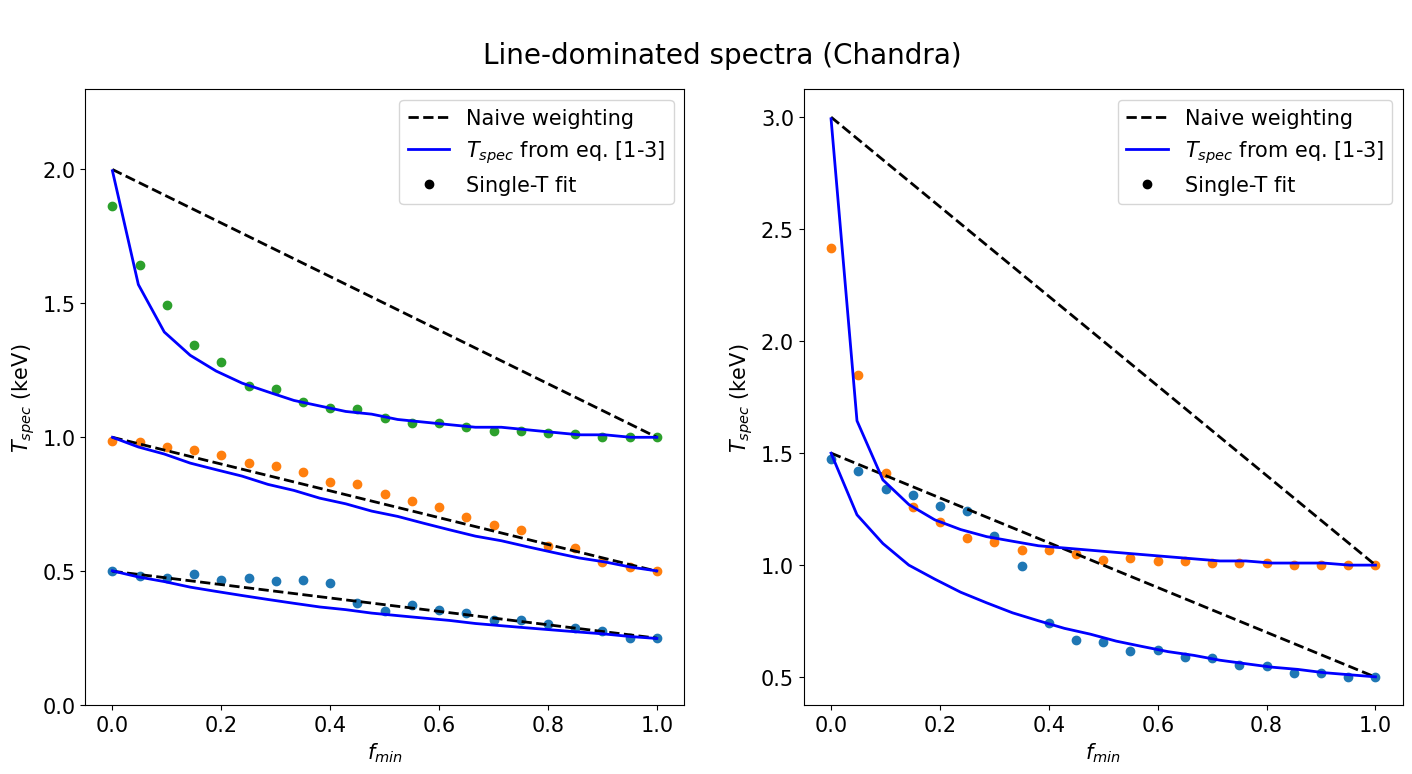

In [16]:
plt.figure(figsize=(17,8))
 
data__name = "data/stats_12.dat"

data = get_data(data__name, show_table=False)

plt.suptitle('\n' + 'Line-dominated spectra (' + telescope + ')', fontsize = 20)

plt.subplot(1,2,1)

T_mins = (0.25, 0.5, 1.)
T_maxs = (0.5, 1.0, 2.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # mean energy
    plot_Tspec_fmin(T_min, T_max, 21, data, naive=True, lstyle='-', cline='blue')
    plot_Tspec_fmin_details()
    
    # direct fit
    Tspec_list = Tspec_lines_all[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list)
    
    #plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1)
    
plt.ylim(0, 2.3)

    
plt.subplot(1,2,2)

T_mins = (0.5, 1.0)
T_maxs = (1.5, 3.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # mean energy
    plot_Tspec_fmin(T_min, T_max, 21, data, naive=True, lstyle='-', cline='blue')
    plot_Tspec_fmin_details()
    
    #plot_Tspec_fmin(T_min, T_max, 20, get_data("data/stats_10.dat", show_table=False), naive=False, lstyle='-', cline='red')
    
    # direct fit
    Tspec_list = Tspec_lines_all[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list)
    
#plt.savefig('Fig3_'+telescope+'_'+data__name[11:13]+'.png')
plt.show()

# 2. CONTINUUM ONLY

To show list of `xspec` commands use `x.Plot.commands`.
If something is not plotting, try `x.Plot.commands=()`.

## 2.1 $T_{spec}$ from weighting

In [16]:
def get_Tspec_continuum_eq45(fminnn, Tmin, Tmax):
    
    # derive T_spec from given values 
    # of T_min, T_max and f_min
    
    Tspec = []
    
    for fmin in fminnn:
        
        temperatures = [Tmin, Tmax]
        weights = temperatures*0

        alpha = 0.75
        
        weights = [temperatures[i]**(-alpha) for i in range(0, len(temperatures))]

        weights = np.multiply(weights, [fmin, (1-fmin)])

        #print(weights)

        num = np.dot(weights, temperatures)
        denom = sum(weights)

        #print(num/denom)
        
        Tspec.append(num/denom)

    return Tspec

#bbb = get_Tspec_continuum_eq45([0.2, 0.3], 1.0, 2.0)
#print(bbb)

# calculating photon count rate for continuum

def c_T(T, T_left, T_right, telescope_name, Xplot=False):
    
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=1024)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if telescope_name == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif telescope_name == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'

    # set model for fakeit
    
    mod = x.Model('phabs*apec')
    mod.setPars(0.01, T, 0.0, 0, 1)
    x.AllModels.show()
    
    if Xplot:
        x.Plot.device = '/xs'
    else:
        x.Plot.device = '/null'

    # fake spectrum
    fs = x.FakeitSettings(response = RMF_NAME, 
                               arf = ARF_NAME, 
                        background = '', 
                          exposure = '40000', 
                        correction = '', 
                      backExposure = '', 
                          fileName = 'fakeit.pha')
    x.AllData.fakeit(nSpectra = 1, 
                     settings = fs, 
                   applyStats = True,
                   filePrefix = "",
                      noWrite = True)

    x.AllData.ignore(f"**-{T_left} {T_right}-**")             # IMPORTANT !
    
    x.Plot.xAxis = "keV"
    #x.AllData.show()
    x.Plot("ldata")
    #xVals = x.Plot.x()
    #yVals = x.Plot.y()
    
    #s1 = x.AllData(1).rate[0]
    
    x.AllModels.calcFlux('0.7 10.0')
    flx = x.AllData(1).flux[0]
     
    #print(s1)

    return flx

#for i in range(0, 100):
#    ddd = c_T(0.01+i/10, 0.7, 10.0, 'Chandra', True)
#    print(ddd)

def get_Tspec_continuum_eq46(fminnn, Tmin, Tmax, alpha, telescope_name):
    
    # derive T_spec from given values 
    # of T_min, T_max and f_min
    
    Tspec = []
    
    for fmin in fminnn:
        
        temperatures = [Tmin, Tmax]
        weights = temperatures*0

        #alpha = 0.875
        
        weights = [temperatures[i]**(-alpha) for i in range(0, len(temperatures))]

        weights = np.multiply(weights, [fmin, (1-fmin)])
        
        c_T_min = c_T(Tmin, 0.7, 10.0, telescope_name, Xplot=False)
        c_T_max = c_T(Tmax, 0.7, 10.0, telescope_name, Xplot=False)
        
        weights = np.multiply(weights, [c_T_min, c_T_max])

        #print(weights)

        num = np.dot(weights, temperatures)
        denom = sum(weights)

        #print(num/denom)
        
        Tspec.append(num/denom)

    return Tspec

#bbb = get_Tspec_continuum_eq46(np.linspace(0, 1, 21), 1.0, 2.0, 0.875, 'Chandra')
#print(bbb)

## 2.2 $T_{spec}$ from direct fit

### Mazotta-like fit
Single-T fit for mixture of 2 continuums (now working properly):

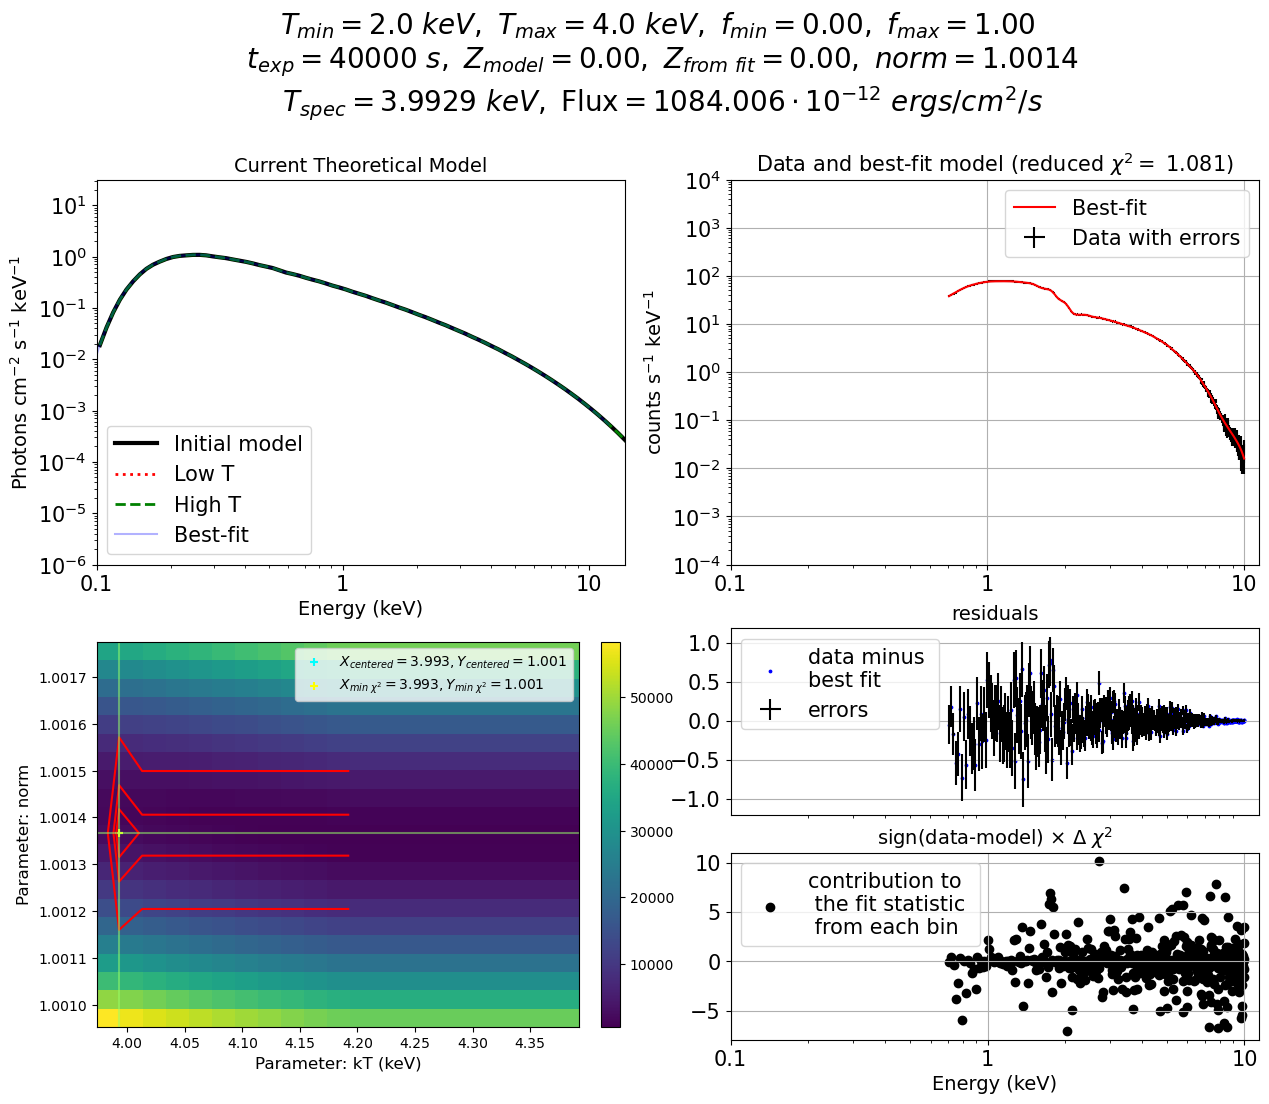

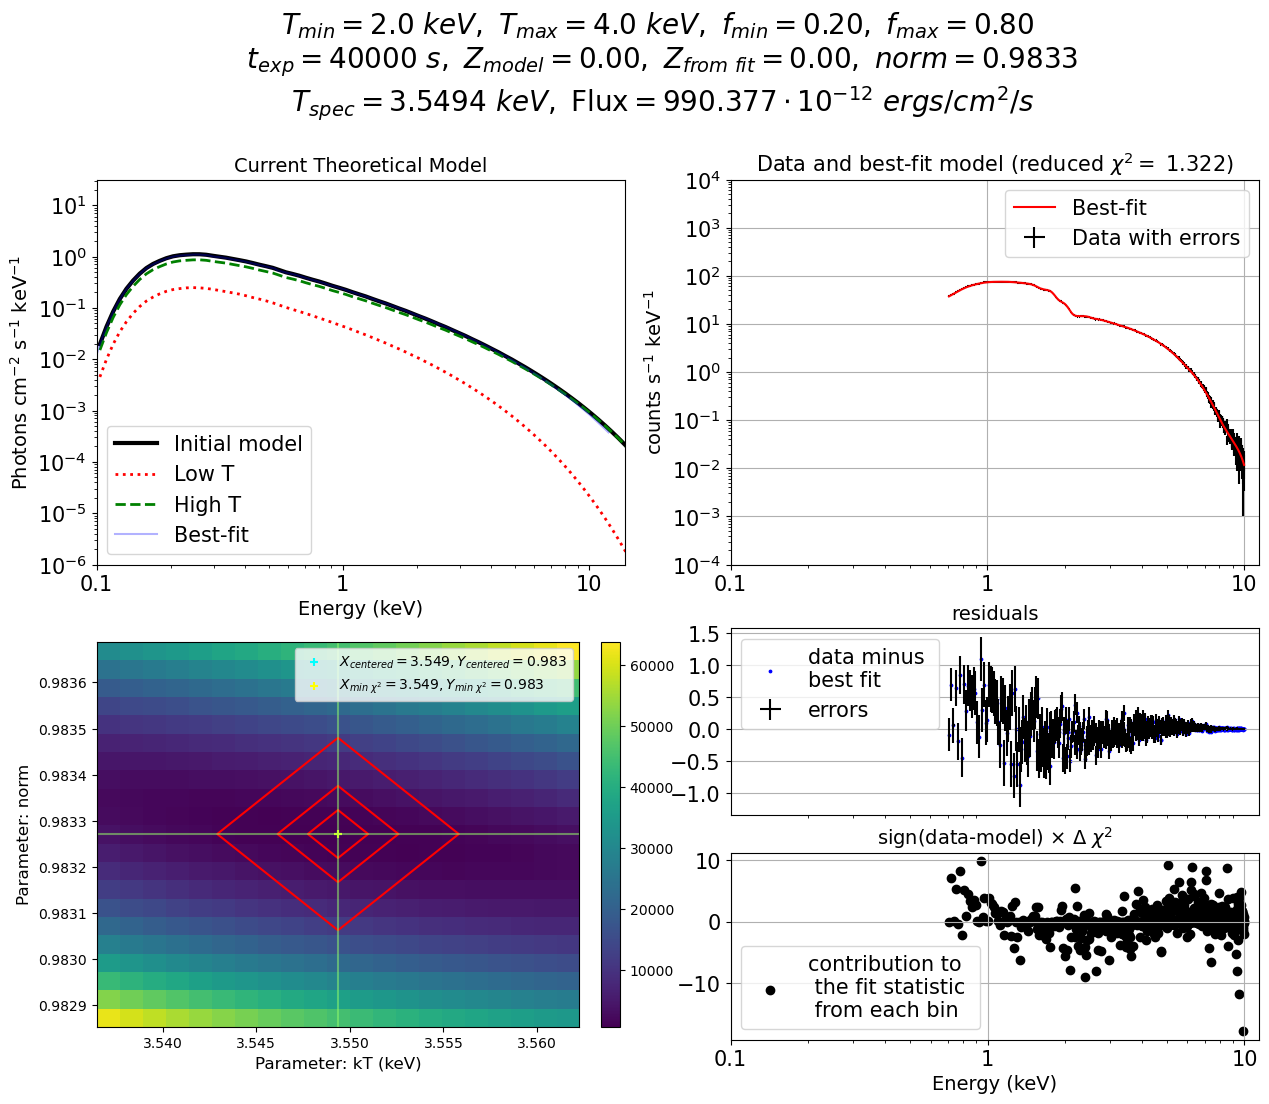

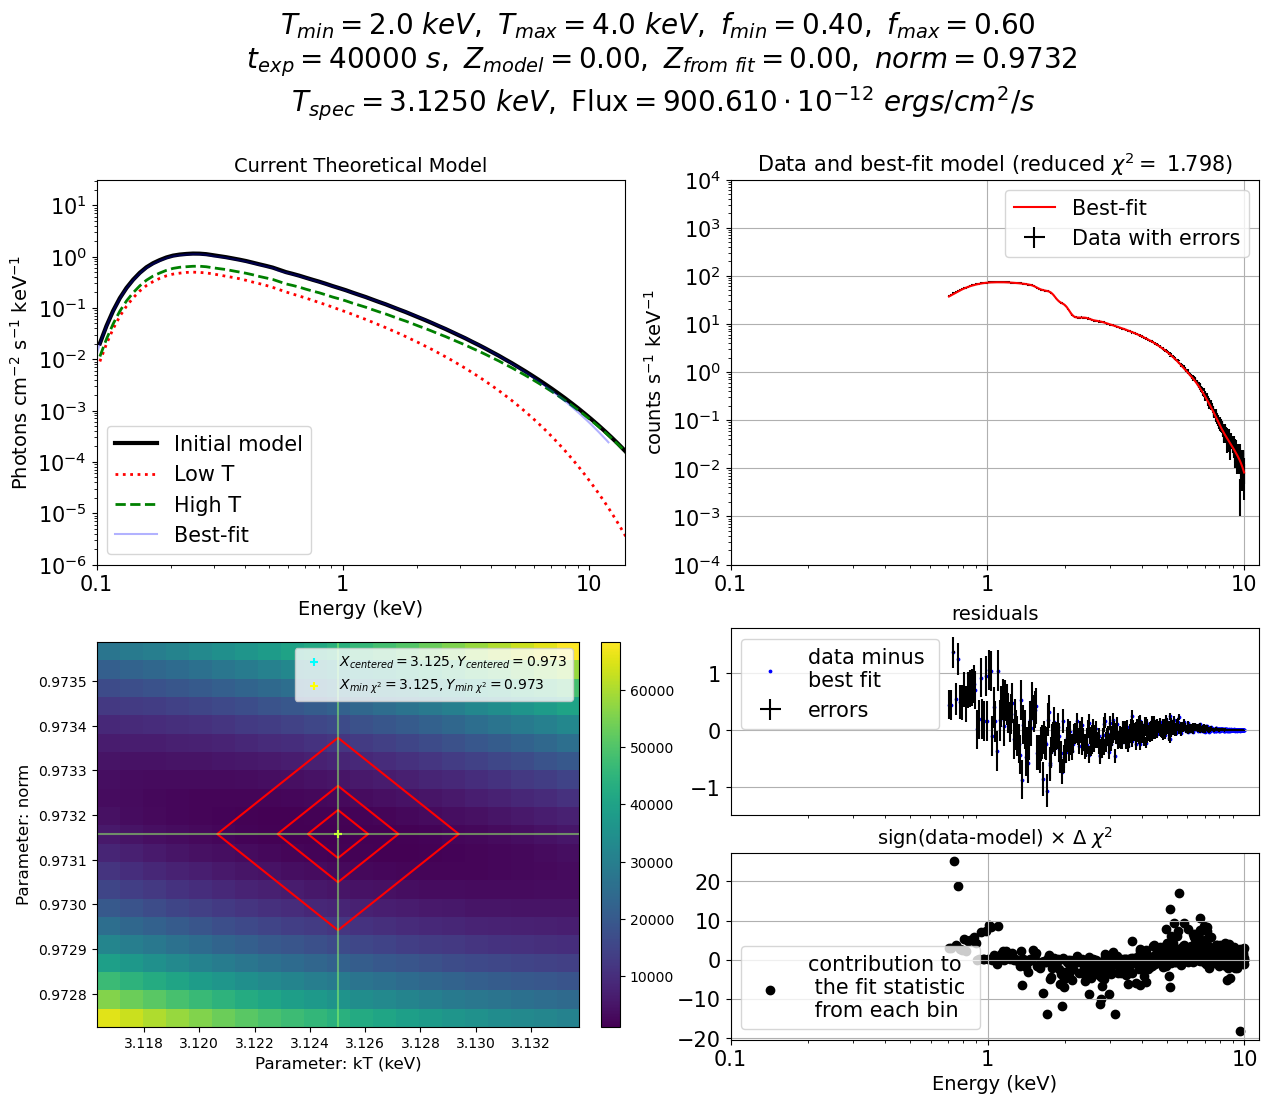

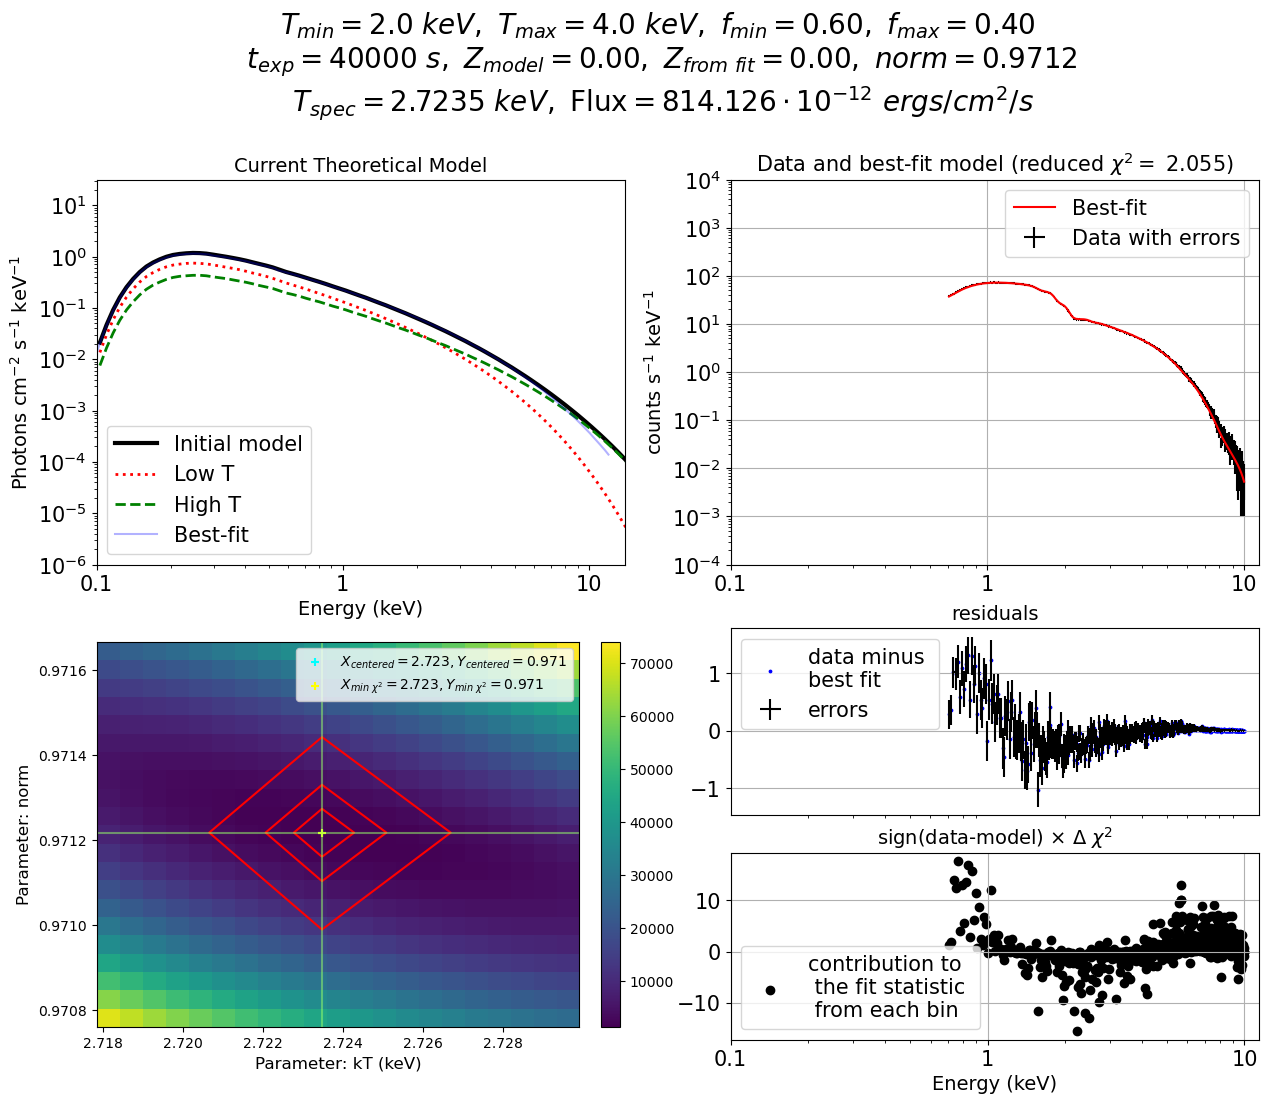

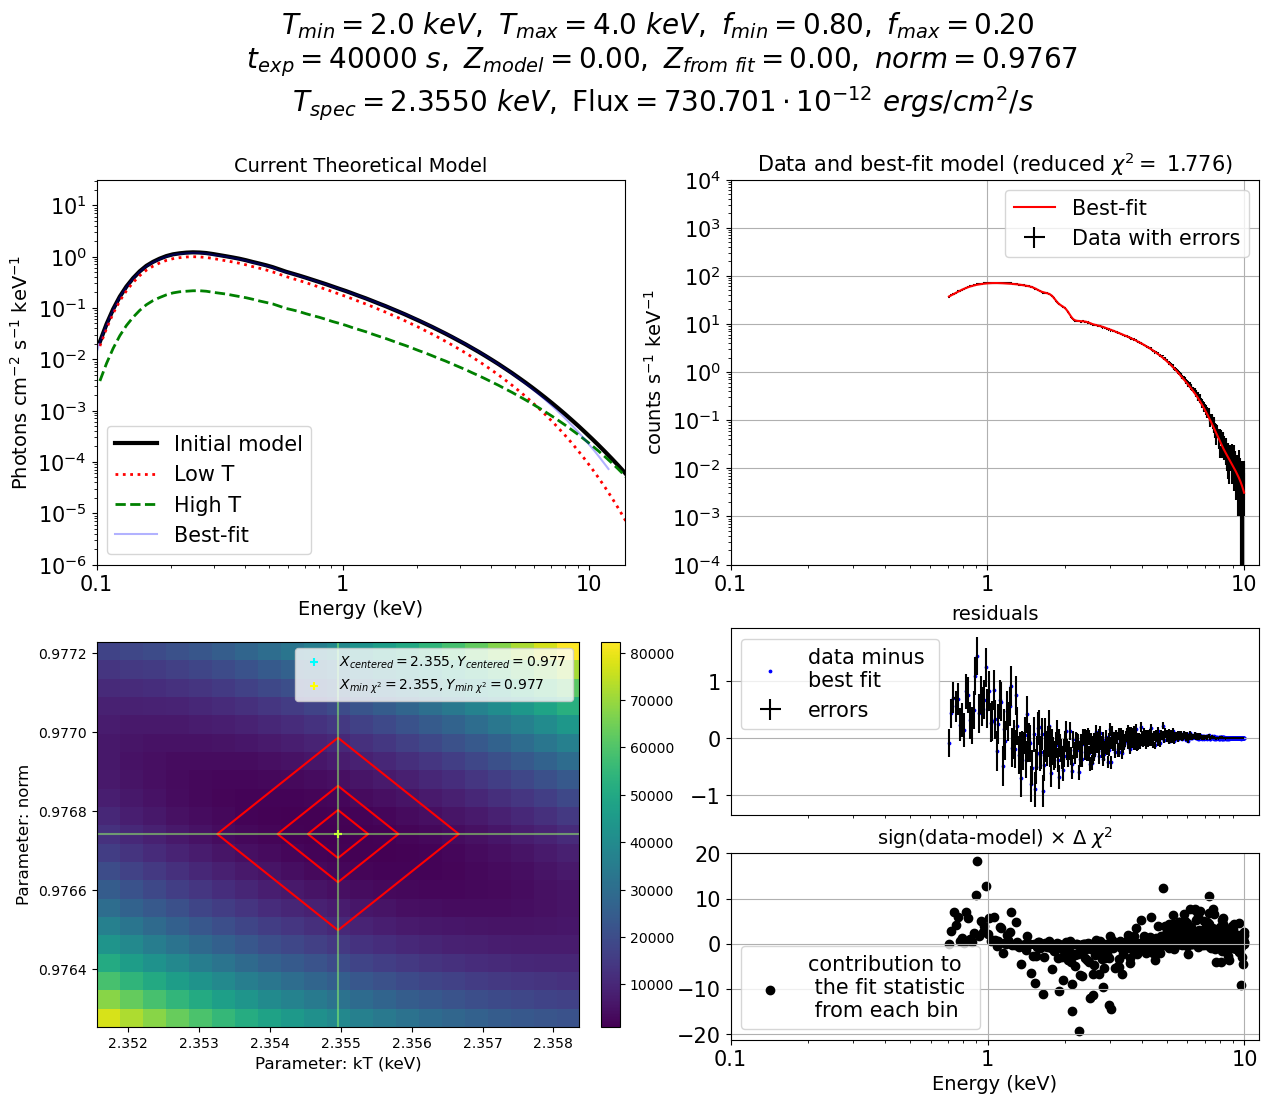

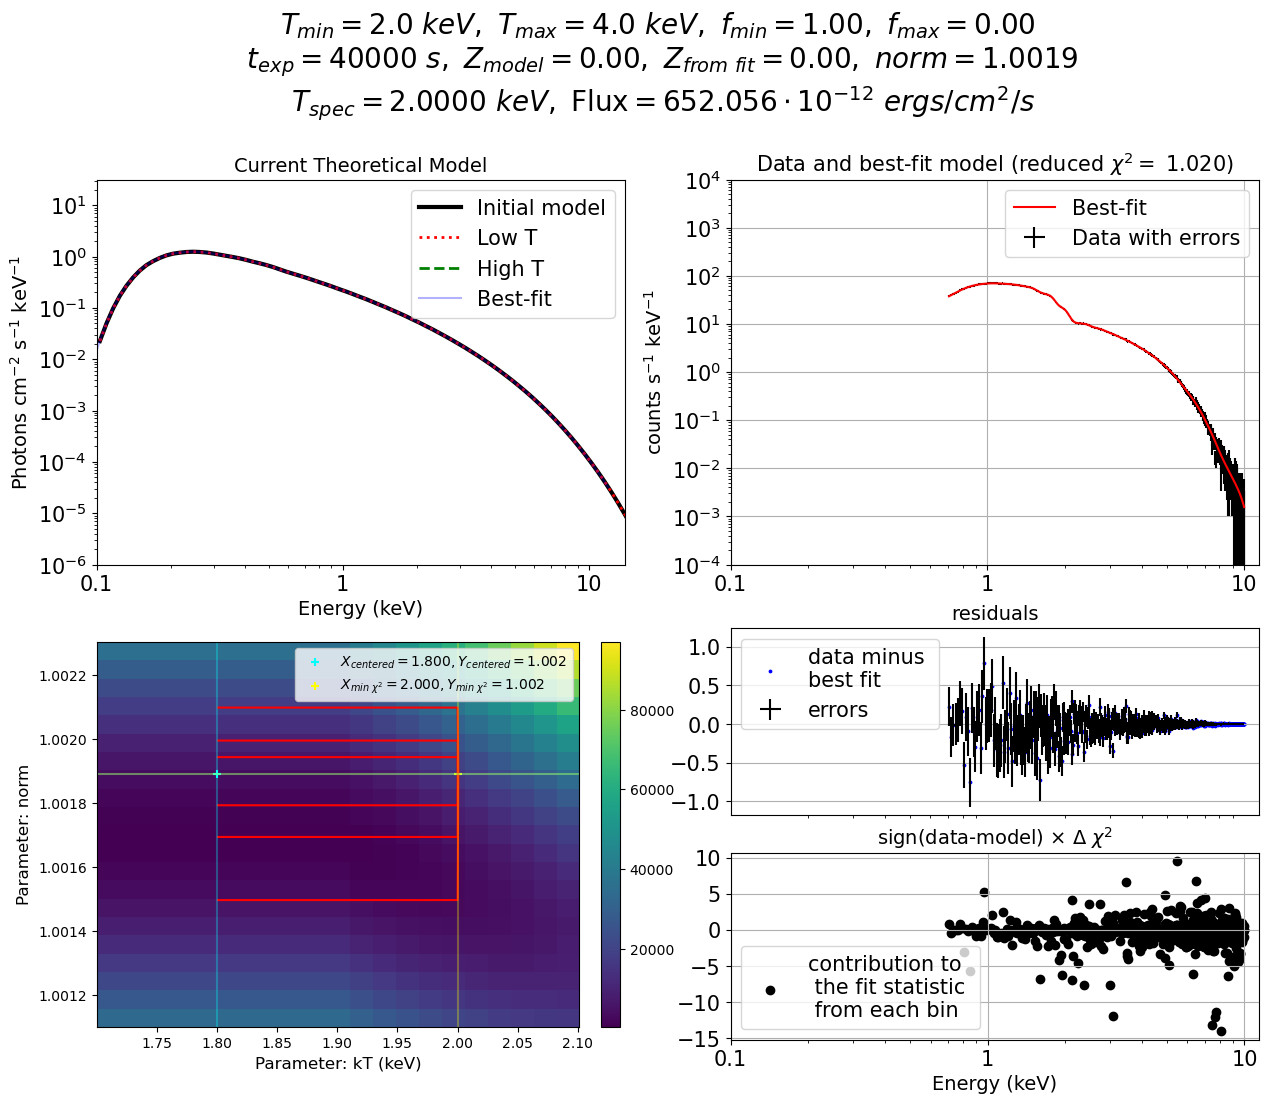

T:  [3.99292220677178, 3.5493655473226537, 3.125017883361866, 2.723473306439406, 2.3549587758760606, 2.0000008457944487]
F:  [1.0840061028186784e-09, 9.903772359620382e-10, 9.006096312328466e-10, 8.141262271251343e-10, 7.307006930516657e-10, 6.520564380174532e-10]


In [230]:
logFile = x.Xset.openLog("newLogFile.txt")

def single_T_fit_continuum(T_minnn, T_maxxx, N_fmins, telescope_name, nrm, texp, stpar=False, plot=False, Xplot=False):

    x.AllData.clear()
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
        
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list = []

    for l in range(0, N_fmins):

        f_minnn = 0.0 + 1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
        
        # set model for fakeit
        mod = x.Model('phabs*(const*apec+const*apec)')
        mod.setPars(0.01, f_minnn, T_minnn, 0.0, 0, nrm, f_maxxx, T_maxxx, 0.0, 0, nrm)
        mod(9).link = "4"
        mod(10).link = "5"
        mod(11).link = "6"
        x.AllModels.show()
        
        #x.AllModels.setEnergies("0.1 10.0 5 log")
        x.AllModels.setEnergies("reset")
        
        # plot model
        if plot:
            plt.figure(figsize=(15, 17))
            plt.subplot(3,2,1)
            draw_model(nrm, linesandcont=False)
            
        # data from fake spectrum
        perform_fakeit(telescope_name, str(texp))
        x.AllData.ignore("**-0.7 10.-**")     # IMPORTANT !
        x.AllData.show()
        
        # fitting
        x.AllModels.clear()
        mod2fit = x.Model("phabs*apec")
        mod2fit.setPars(0.01, 1.0, 0.0, 0., nrm)
        mod2fit(1).frozen = True    #n_H
        mod2fit(2).values = f"{(T_minnn+T_maxxx)/2}, 0.001, {T_minnn}, {T_minnn}, {T_maxxx}, {T_maxxx}" # temperature
        #mod2fit(3).frozen = False  #abundance
        #mod2fit(4).frozen = False  # redshift
        #mod2fit(5).frozen = True   # norm
        #mod2fit(5).values = f"{nrm}, 0.01, 0.0, 0.0, 1.1, 1.1"
        
        #x.AllData.ignore("bad")
        x.Fit.renorm('auto')
        x.Fit.nIterations = 100
        x.Fit.query = 'yes'
        #x.Fit.weight = 'standard'
        x.Fit.statMethod = 'chi'
        x.Fit.perform()
        #x.AllModels.show()
        x.Fit.show()
        
        # steppar
        if stpar:
            N_steps = 20
            perform_steppar(mod2fit, 2, 0.2, 5, nrm/10, N_steps)

        # return some parameters
        best_kT = mod2fit(2).values[0]
        abund_from_fit = mod2fit(3).values[0]
        norm = mod2fit(5).values[0]
        tspec_list.append(best_kT)
        #print(best_kT)
        
        # calculating flux
        #fluxx = x.AllData(1).rate[0]
        #flux_list.append(fluxx) # in units of counts / s
        x.AllModels.calcFlux('0.7 10.0')
        fluxx = x.AllData(1).flux[0]
        flux_list.append(fluxx) # in units of ergs/cm2/s
        # or use [4] in units of photons / s / cm^2
        
        if plot:
            plt.suptitle(f'$T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn:.2f}, \ f_{{max}}={f_maxxx:.2f}$ \n $t_{{exp}}={texp} \ s, \ Z_{{model}} =0.00, \ Z_{{from \ fit}} = {abund_from_fit:.2f}, \ norm = {norm:.4f}$ \n $T_{{spec}}={best_kT:.4f} \ keV, \ $Flux$ = {fluxx*10**12:.3f}\cdot 10^{{-12}} \ ergs/cm^2/s$ \n ', fontsize = 20)
            plt.subplot(3,2,3)
            if stpar:
                plot_contours_from_steppar(N_steps, 2, 5, mod2fit, zoomin=True)
            else:
                draw_best_model(nrm, linesandcont=False)
                #draw_goodness()
            plt.subplot(3,2,2)
            draw_data_and_best_model(nrm, linesandcont=False)
            plt.subplot(3,2,1)
            draw_best_model(nrm, linesandcont=False)
            plt.show()
            
        #x.Plot.commands=()
        x.AllData.clear()

    return tspec_list, flux_list
    
ccc, fluxccc = single_T_fit_continuum(2.0, 4.0, 6, 'Chandra', nrm=1, texp=40000, stpar=True, plot=True, Xplot=False)
print("T: ", ccc)
print("F: ", fluxccc)

## 2.3 Figure 4

Вычисляем всё необходимое:

In [136]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

if telescope == 'Chandra':
    alpha_current = 0.875
else:
    alpha_current = 0.73
    
print(alpha_current)

f_min = np.linspace(0, 1, 11)
T_spec = f_min*0

T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

Tspec_from_eq46 ={}
Tspec_from_fit ={}

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # Tspec from equations 4, 6
    tspec_list = get_Tspec_continuum_eq46(f_min, T_min, T_max, alpha_current, telescope)
    Tspec_from_eq46[str(T_min)+'-'+str(T_max)] = tspec_list
    
    # Tspec from direct fit
    tspec_list_1 = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.01, 40000, stpar=True, plot=False, Xplot=False)[0]
    Tspec_from_fit[str(T_min)+'-'+str(T_max)] = tspec_list_1
    
    print(str(T_min)+'-'+str(T_max)+": done")
    
#for key in Tspec_from_eq46.keys():
#    print(key, 'keV')
#    print('Eqs. 4, 6:', [f'{vl:.2f}' for vl in Tspec_from_eq46[key]], '\n')
#    print('Direct fit', [f'{vl:.2f}' for vl in Tspec_from_fit[key]], '\n')

0.875
0.25-1.0: done
0.5-2.0: done
1.0-4.0: done
2.0-8.0: done
4.0-16.0: done


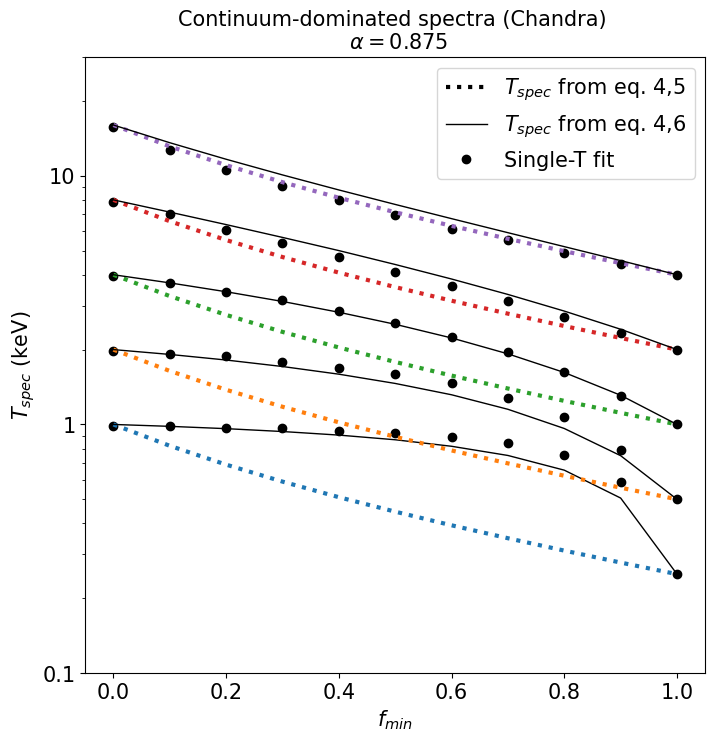

In [135]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # naive weighting
    #plt.plot(f_min, f_min*T_min+(1-f_min)*T_max, linestyle = '--', linewidth=2, color='black')
    
    # Tspec from equations 4, 5
    plt.plot(f_min, get_Tspec_continuum_eq45(f_min, T_min, T_max), linestyle = ':', linewidth = 3)

    # Tspec from equations 4, 6
    Tspec_list = Tspec_from_eq46[str(T_min)+'-'+str(T_max)]
    plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1)
    #plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black')
    
    # Tspec from direct fit
    Tspec_list1 = Tspec_from_fit[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list1)), Tspec_list1, color='black')
    
#plt.scatter(np.linspace(0, 1, len(T_spec)), T_spec, color='blue')   
    
plt.ylim(0.1, 30)
plt.yscale('log')
plt.xticks(size=15)
plt.yticks([0.1, 1, 10], [0.1, 1, 10], size=15)
plt.xlabel('$f_{min}$', fontsize = 15)
plt.ylabel('$T_{spec}$ (keV)', fontsize = 15)
plt.title('Continuum-dominated spectra ('+telescope+') \n $\\alpha=$'+str(alpha_current), fontsize = 15)

handles, labels = plt.gca().get_legend_handles_labels()
#line_n = Line2D([], [], label='Naive weighting', color='black', linestyle='--', linewidth=2)
line_e = Line2D([], [], label='$T_{spec}$ from eq. 4,5', color='black', linestyle=':', linewidth=3)
dots_f = Line2D([], [], label='$T_{spec}$ from eq. 4,6', color='black', linestyle='-', linewidth=1)
dots_T = Line2D([], [], label='Single-T fit', color='black', marker='.', linewidth=0, markersize=12)
handles.extend([line_e, dots_f, dots_T])
plt.legend(handles=handles, fontsize=15)

#plt.savefig('Fig4_'+str(telescope)+'.png')
plt.show()

## 2.4 Searching for $\alpha_{min}$

Let's try to find the value of $\alpha$ at which $T_{sl}$ from equations 4,6 is the closest to $T_{spec}$ from direct fit. Observations by SRG/eROSITA and also by Chandra are considered. See eq. (13) from Mazzotta et al. (2004): https://arxiv.org/pdf/astro-ph/0404425.pdf

$\Delta=\frac{1}{N} \sum_{T_1, T_2} \sqrt{\left(\frac{T_{\mathrm{sl}} - T_{\mathrm{spec}}}{T_{\mathrm{spec}}}\right)^2}$

In [78]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

deltas = []
#alphas = np.linspace(0.350, 0.950, 3)  #Chandra
alphas = np.linspace(0.650, 0.850, 5)  #eROSITA

#[0.875, 0.900, 0.925, 0.950, 0.975, 1.000]
#[0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900]

f_min = np.linspace(0, 1, 21)

for a in alphas:

    delta_sum = 0
    N_deltasum = 0

    T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
    T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

    #T_min = 0.5
    #T_max = 2.0

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        # Tspec from equations 4, 6
        T_sl = get_Tspec_continuum_eq46(f_min, T_min, T_max, a, telescope)
        #print(T_sl)

        # Tspec from direct fit
        #T_spec = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.7, plot=False, Xplot=False)[0]
        T_spec = Tspec_from_fit[str(T_min)+'-'+str(T_max)]
        #print(T_spec)

        #print(T_spec)
        difference = [Ta-Tb for Ta, Tb in zip(T_sl, T_spec)]
        #print(difference)
        terms = [num/denom for num, denom in zip(difference, T_spec)]
        #print(term)
        terms2 = [t**2 for t in terms]
        #print(terms2)
        sqrterms2 = [np.sqrt(tt) for tt in terms2]
        
        delta_term = np.sum(sqrterms2)

        delta_sum = delta_sum + delta_term
        
        N_deltasum = N_deltasum + len(f_min)
        
        print(N_deltasum, end=" ")
        
    Delta = delta_sum/N_deltasum
    
    print(a, Delta)

    deltas.append(Delta)
    
#print(deltas)

21 42 63 84 105 0.65 0.02067995957254531
21 42 63 84 105 0.7 0.024861328272167256
21 42 63 84 105 0.75 0.03211573321286605
21 42 63 84 105 0.8 0.04085761708662324
21 42 63 84 105 0.85 0.05356651841578203


In [79]:
if telescope == 'Chandra': 
    alphas_CH = alphas
    deltas_CH = deltas
else:
    alphas_ER = alphas
    deltas_ER = deltas

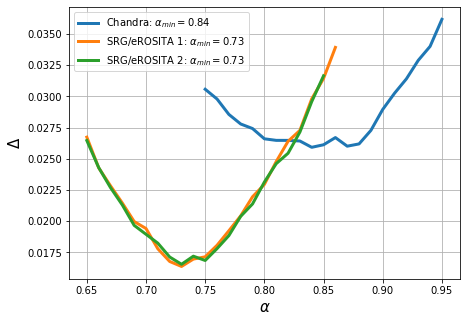

In [67]:
plt.figure(figsize=(7,5))
plt.plot(alphas_CH, deltas_CH, linewidth=3, label='Chandra: $\\alpha_{min} =$'+str(alphas_CH[np.argmin(deltas_CH)]))
plt.plot(list1, list2, linewidth=3, label='SRG/eROSITA 1: $\\alpha_{min} =$'+str(list1[np.argmin(list2)]))
plt.plot(alphas_ER, deltas_ER, linewidth=3, label='SRG/eROSITA 2: $\\alpha_{min} =$'+str(alphas_ER[np.argmin(deltas_ER)]))
plt.xlabel('$\\alpha$', fontsize=15)
plt.ylabel('$\\Delta$', fontsize=15)#, rotation = 'horizontal')
plt.legend()
plt.grid()
#plt.savefig('delta_alpha_ER.png')
plt.show()

We can see that $\Delta$ reaches its minimum at $\alpha=0.73$ (for SRG/eROSITA observations). 

# 3. REALISTIC METALLICITIES

## 3.1 $T_{spec}$ from direct fit

In [ ]:
x.AllModels.clear()
mod2fit = x.Model("phabs*(apec+apec)")
mod2fit.setPars(0.01, 1.0, abund, 0, nrm, 1.0, 0.0, 0, nrm)
mod2fit(1).frozen = True    # n_H
mod2fit(2).values = f"{(T_minnn+T_maxxx)/2}, 0.001, {T_minnn}, {T_minnn}, {T_maxxx}, {T_maxxx}" # temperature
mod2fit(7).frozen = True   # abundance cont
#mod2fit(4).frozen = False  # redshift   
#mod2fit(5).frozen = True   # norm
#mod2fit(5).values = f"{nrm}, -1, 0.0, 0.0, 1.1, 1.1"
mod2fit(3).frozen = False   # abundance lines
mod2fit(6).link = "2"
mod2fit(8).link = "4"
mod2fit(9).link = "5"

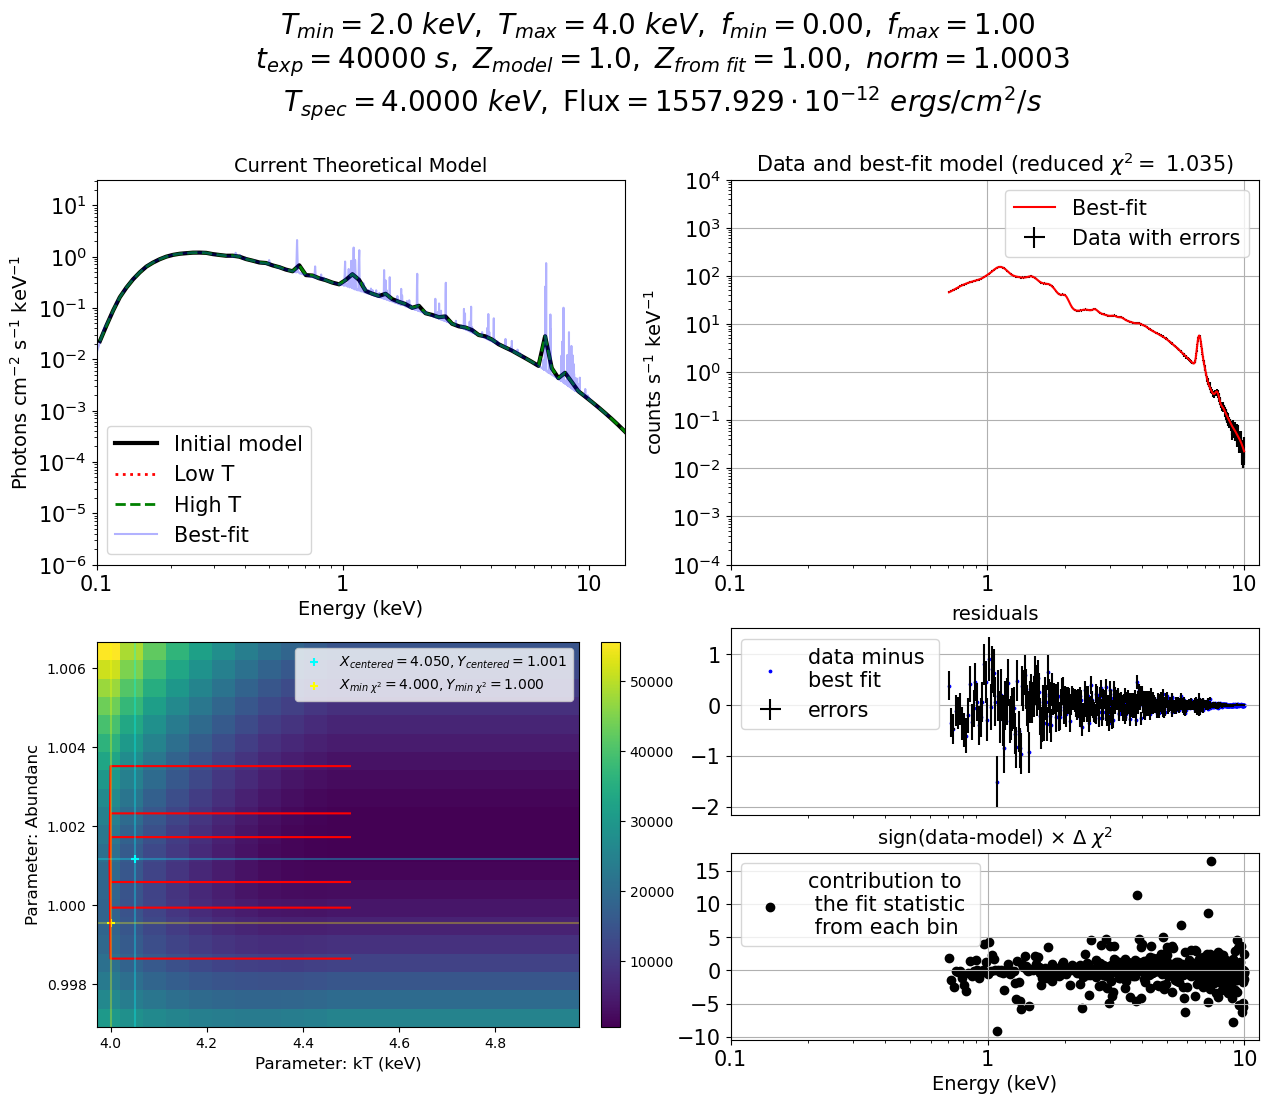

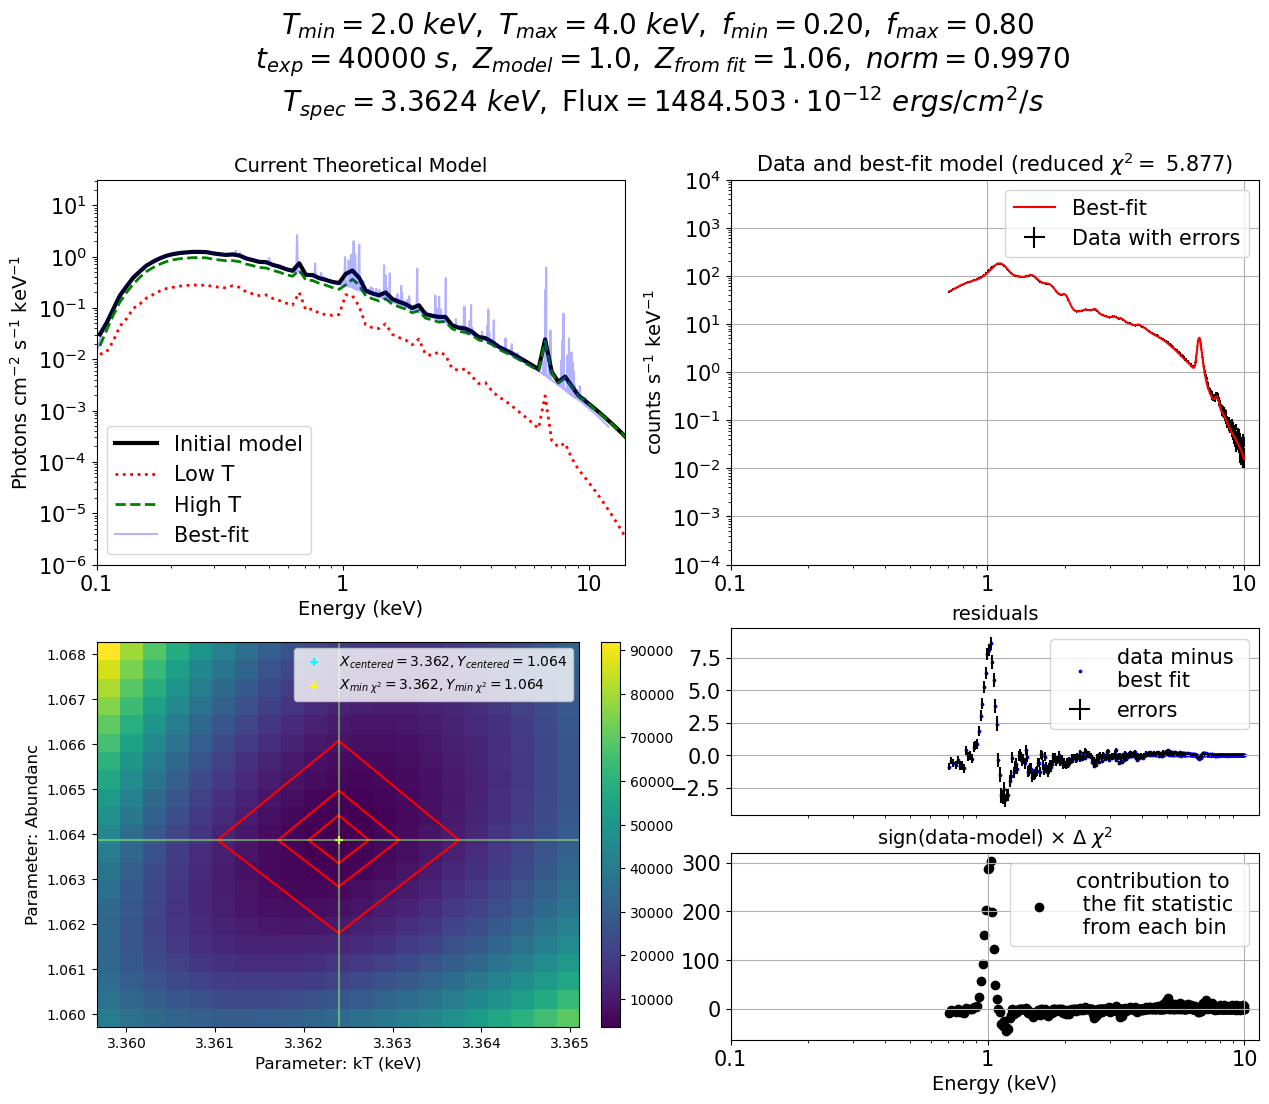

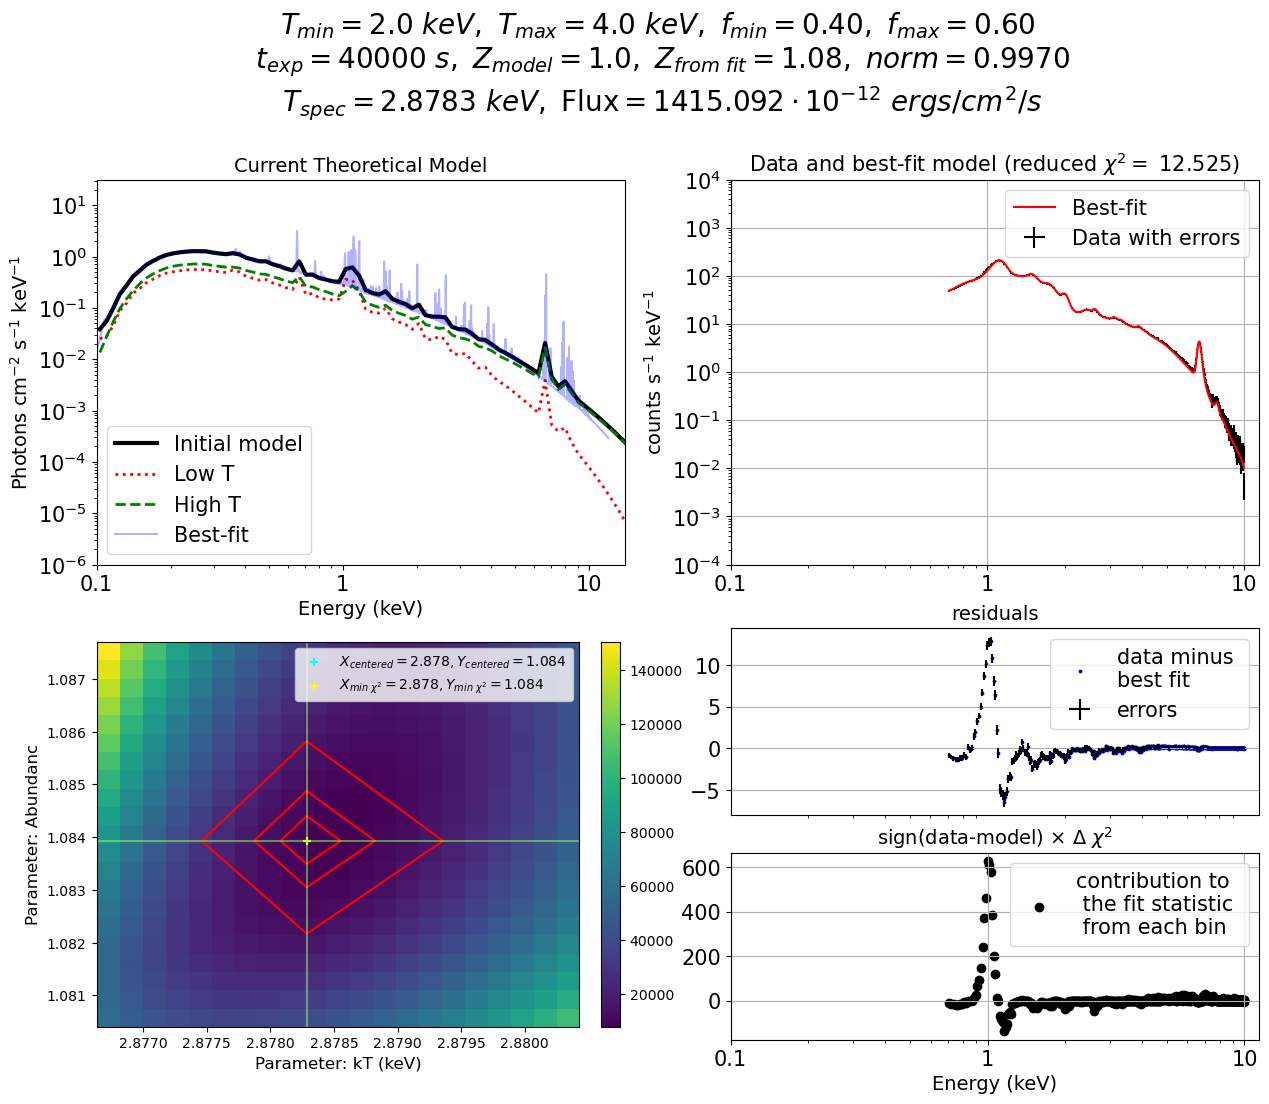

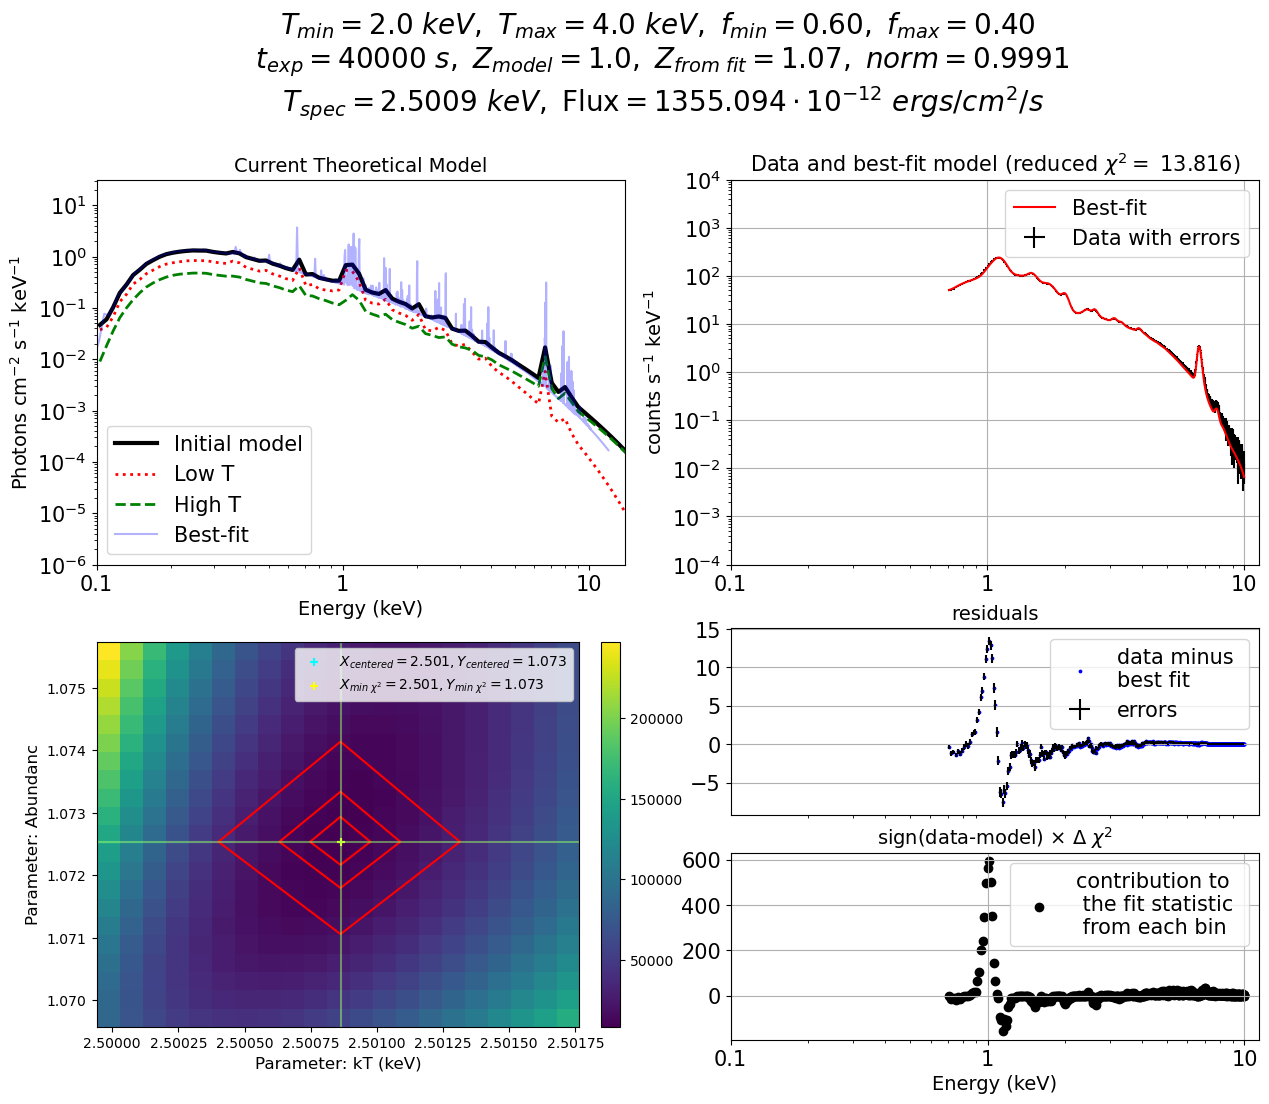

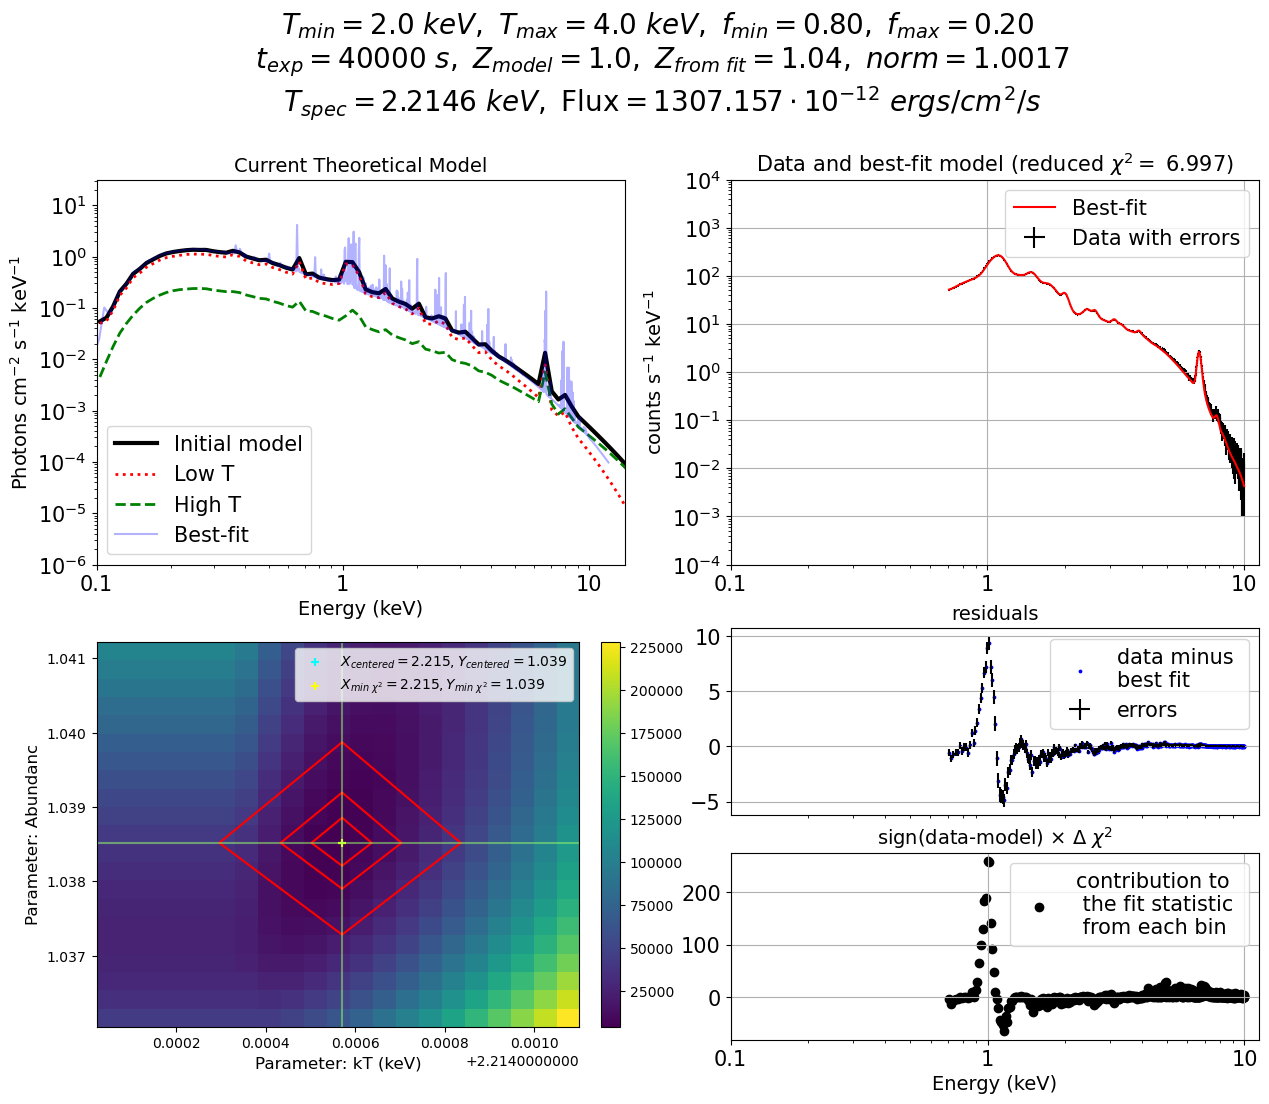

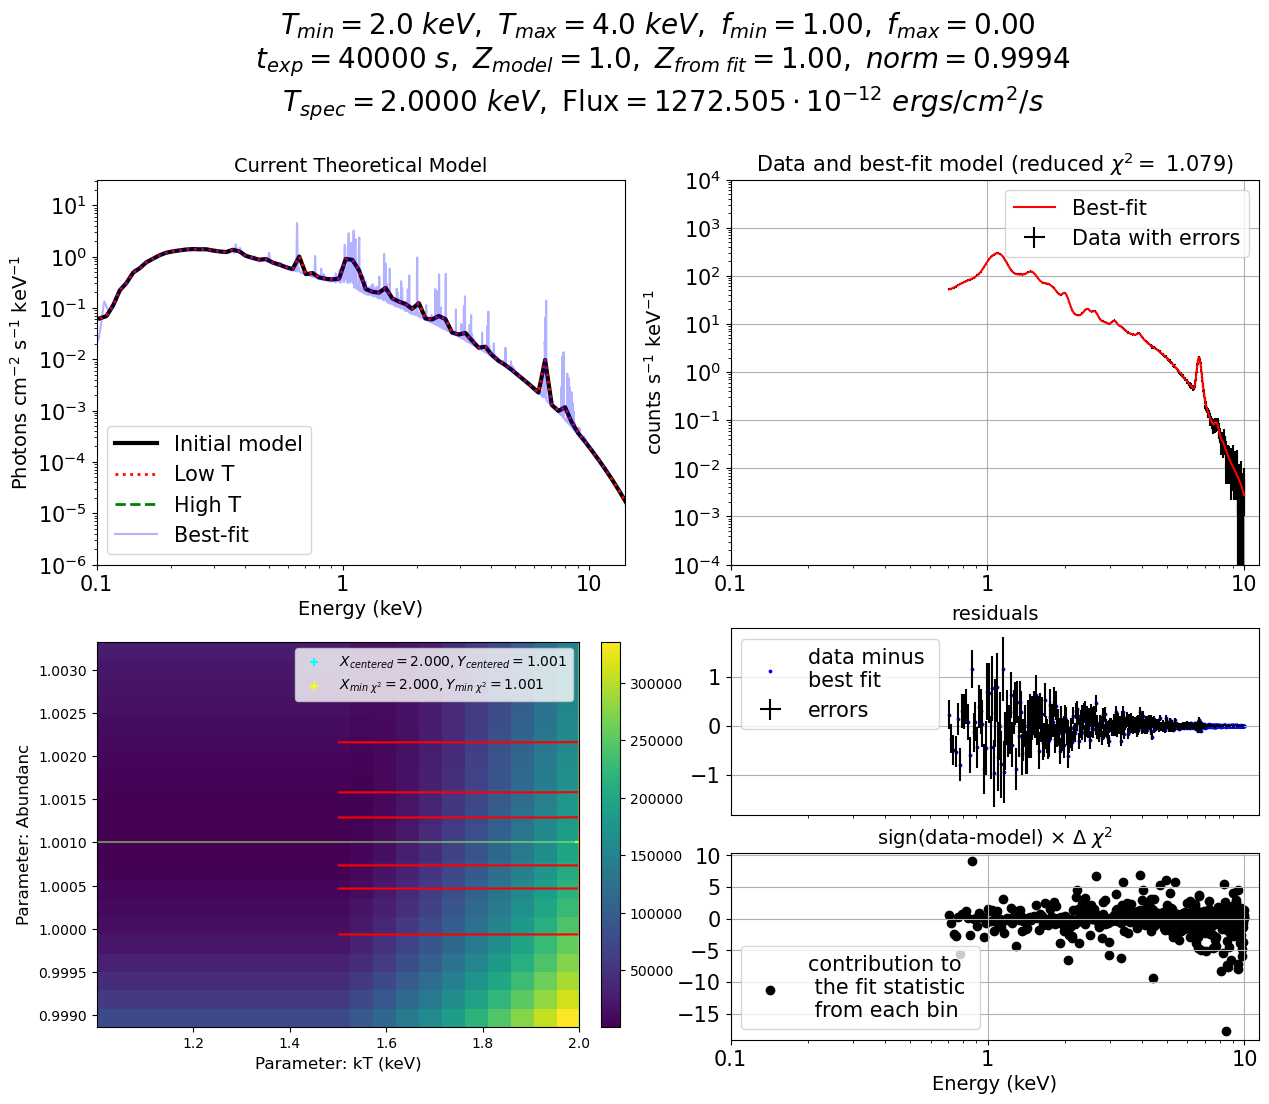

T:  [4.0, 3.3623923503127138, 2.8782860495839317, 2.5008623256088103, 2.2145705420588553, 2.000031407883339]
F:  [1.557929259812231e-09, 1.4845034707949906e-09, 1.415092168368616e-09, 1.3550937625431254e-09, 1.3071568572590894e-09, 1.2725052998430234e-09]


In [232]:
logFile = x.Xset.openLog("newLogFile.txt")

def single_T_realistic(T_minnn, T_maxxx, N_fmins, abund, telescope_name, nrm, texp, stpar=False, plot=False, Xplot=False):

    x.AllData.clear()
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list=[]

    for l in range(0, N_fmins):

        f_minnn = 0.0+1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
        
        # set model for fakeit
        mod = x.Model('phabs*(const*apec+const*apec)')
        mod.setPars(0.01, f_minnn, T_minnn, abund, 0, nrm, f_maxxx, T_maxxx, abund, 0, nrm)
        mod(9).link = "4"
        mod(10).link = "5"
        mod(11).link = "6"
        x.AllModels.show()
       
        # plot model
        if plot:
            plt.figure(figsize=(15, 17))
            plt.subplot(3,2,1)
            draw_model(nrm, linesandcont=False)
        
        # data from fake spectrum
        perform_fakeit(telescope_name, str(texp))
        x.AllData.ignore("**-0.7 10.-**")             # IMPORTANT !
        x.AllData.show()
        
        # fitting
        x.AllModels.clear()
        mod2fit = x.Model("phabs*apec")
        mod2fit.setPars(0.01, 1.0, abund, 0., nrm)
        mod2fit(1).frozen = True    # n_H 
        mod2fit(2).values = f"{(T_minnn+T_maxxx)/2}, 0.001, {T_minnn}, {T_minnn}, {T_maxxx}, {T_maxxx}" # temperature
        mod2fit(3).frozen = False   # abundance
        #mod2fit(4).frozen = False  # redshift   
        #mod2fit(5).frozen = True   # norm
        #mod2fit(5).values = f"{nrm}, -1, 0.0, 0.0, 1.1, 1.1"
        
        #x.AllData.ignore("bad")
        x.Fit.renorm('auto')
        x.Fit.nIterations = 100
        x.Fit.query = 'yes'
        #x.Fit.weight = 'standard'
        x.Fit.statMethod = 'chi'
        x.Fit.perform()
        #x.Fit.goodness(10)
        #x.AllModels.show()
        x.Fit.show()

        # steppar
        if stpar:    
            N_steps = 20
            perform_steppar(mod2fit, 2, 0.5, 3, 0.5, N_steps)
            
        # return some parameters
        best_kT = mod2fit(2).values[0]
        abund_from_fit = mod2fit(3).values[0]
        norm = mod2fit(5).values[0]
        tspec_list.append(best_kT)
        #print(best_kT)

        # calculating flux
        #fluxx = x.AllData(1).rate[0]
        #flux_list.append(fluxx) # in units of counts / s
        x.AllModels.calcFlux('0.7 10.0')
        fluxx = x.AllData(1).flux[0]
        flux_list.append(fluxx) # in units of ergs/cm2/s 
        # or use [4] in units of photons / s / cm^2      
        
        if plot:
            plt.suptitle(f'$T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn:.2f}, \ f_{{max}}={f_maxxx:.2f}$ \n $t_{{exp}}={texp} \ s, \ Z_{{model}} ={abund}, \ Z_{{from \ fit}} = {abund_from_fit:.2f}, \ norm = {norm:.4f}$ \n $T_{{spec}}={best_kT:.4f} \ keV, \ $Flux$ = {fluxx*10**12:.3f}\cdot 10^{{-12}} \ ergs/cm^2/s$ \n ', fontsize = 20)
            plt.subplot(3,2,3)
            if stpar:
                plot_contours_from_steppar(N_steps, 2, 3, mod2fit, zoomin=True)
            else:
                draw_best_model(nrm, linesandcont=False)
                #draw_goodness()
            plt.subplot(3,2,2)
            draw_data_and_best_model(nrm, linesandcont=False)
            plt.subplot(3,2,1)
            draw_best_model(nrm, linesandcont=False)
            plt.show()
            
        #x.Plot.commands=()
        x.AllData.clear()

    return tspec_list, flux_list
    
aaa, aaa1 = single_T_realistic(2.0, 4.0, 6, 1.0, 'Chandra', nrm=1, texp=40000, stpar=True, plot=True, Xplot=False)
print("T: ", aaa)
print("F: ", aaa1)

In [226]:
Fq_cont = [1.0831059770111345e-09, 1.0073619542743226e-09, 9.269410743153196e-10, 8.389419996619415e-10, 7.481353816020657e-10, 6.508245286956499e-10]
Fq_real = [1.5563238431228227e-09, 1.4827369738204856e-09, 1.4134684424116026e-09, 1.3546114165049142e-09, 1.306918973396868e-09, 1.2721006114171883e-09]
Fq_lins = [4.739913449145126e-10, 4.916271240147492e-10, 5.203415866235842e-10, 5.551566600236308e-10, 5.909945642927532e-10, 6.217249725556695e-10]

In [227]:
print('F_cnt + F_lin = F_sum =?= F_fit')
for i in range(0, 6):
    fline = [1-Fco/Fsum for Fco, Fsum in zip(Fq_cont, Fq_real)]
    print(f'{Fq_cont[i]*10**12:.2f} + {Fq_lins[i]*10**12:.2f} = {Fq_cont[i]*10**12 + Fq_lins[i]*10**12:.2f} =?= {Fq_real[i]*10**12:.2f} ....... f_line = {fline[i]:.2f}, x = {iks[i]:.2f}')

F_cnt + F_lin = F_sum =?= F_fit
1083.11 + 473.99 = 1557.10 =?= 1556.32 ....... f_line = 0.30, x = 1.01
1007.36 + 491.63 = 1498.99 =?= 1482.74 ....... f_line = 0.32, x = 0.53
926.94 + 520.34 = 1447.28 =?= 1413.47 ....... f_line = 0.34, x = 0.49
838.94 + 555.16 = 1394.10 =?= 1354.61 ....... f_line = 0.38, x = 0.43
748.14 + 590.99 = 1339.13 =?= 1306.92 ....... f_line = 0.43, x = 0.41
650.82 + 621.72 = 1272.55 =?= 1272.10 ....... f_line = 0.49, x = 0.00


## 3.2 Figure 5

In [225]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

f_min = np.linspace(0, 1, 11)
T_spec = f_min*0

T_mins = (1.0, 2.0)
T_maxs = (3.0, 6.0)

Tspec_continuum_fit_fig5 = {}
Tspec_cont_all_fig5 = {}
single_T_fit_all_fig5 = {}
Tspec_lines_all_fig5 = {}

exxxpo = 40000
normmm = 0.01

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    #Tsum = np.zeros(11)
    
    Tspec_cont_all_fig5[str(T_min)+'-'+str(T_max)] = get_Tspec_continuum_eq46(f_min, T_min, T_max, 0.875, telescope)
    Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, normmm, exxxpo, stpar=True, plot=False, Xplot=False)[0]
    
    #N_trials = 10
    #for i in range(0, N_trials):
    #    Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, normmm, exxxpo, stpar=False, plot=False, Xplot=False)[0]
        #plt.plot(f_min, Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)])
    #    Tsum += Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)]
    #Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = Tsum/N_trials
    
    if T_min == 1.0:
        single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_realistic(T_min, T_max, len(f_min), 0.1, telescope, normmm, exxxpo, stpar=True, plot=False, Xplot=False)[0]
        Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_lines(T_min, T_max, len(f_min), 5, telescope, normmm, exxxpo, stpar=True, plot = False, Xplot=False)[0]
    if T_min == 2.0:
        single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_realistic(T_min, T_max, len(f_min), 0.3, telescope, normmm, exxxpo, stpar=True, plot=False, Xplot=False)[0]
        Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_lines(T_min, T_max, len(f_min), 5, telescope, normmm, exxxpo, stpar=True, plot = False, Xplot=False)[0]
    
    print(str(T_min)+'-'+str(T_max)+": done")
    
def print_values(TSPEC_LISTS):
    
    for item in TSPEC_LISTS:
   
        for key in item.keys():
            print(key, 'keV')
            print([f'{vl:.2f}' for vl in item[key]], '\n')
            
#print_values([Tspec_cont_all_fig5, single_T_fit_all_fig5])

1.0-3.0: done
2.0-6.0: done


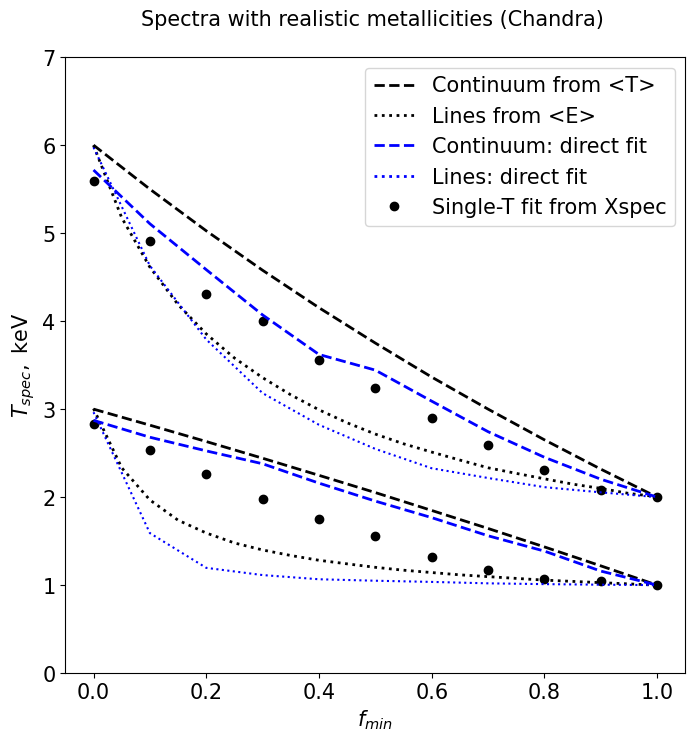

In [231]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'
#f_min = np.linspace(0, 1, 6)
#T_mins = (1.0, 2.0)
#T_maxs = (3.0, 6.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # line-dominated from <E>
    plot_Tspec_fmin(T_min, T_max, 20, get_data("data/stats_03.dat", show_table=False), naive=False, lstyle=':', cline='black')
    #Tspec_list3 = f_min*0
    #for i in range(0, len(f_min)):
    #    Tspec_list3[i] = get_Tspec_lines(f_min[i], T_min, T_max, get_data("data/stats_12.dat", show_table=False))
    #plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
    
    # line-dominated from direct fit
    Tspec_list4 = Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list4, linestyle=':', color='blue')
    
    # continuum from eq. 4,6
    Tspec_list1 = Tspec_cont_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
    
    # continuum from direct fit
    Tspec_list5 = Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list5, linestyle = '--', linewidth = 2, color = 'blue')
    
    # realistic metallicities
    Tspec_list2 = single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.scatter(f_min, Tspec_list2, color='black')
    #Tspec_list = Tspec_cont_all[str(T_min)+'-'+str(T_max)]
    #plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black')
    #plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1) 
    
handles, labels = plt.gca().get_legend_handles_labels()
line_n = Line2D([], [], label='Continuum from <T>', color='black', linestyle='--', linewidth=2)
line_e = Line2D([], [], label='Lines from <E>', color='black', linestyle=':', linewidth=2)
line_n1 = Line2D([], [], label='Continuum: direct fit', color='blue', linestyle='--', linewidth=2)
line_e1 = Line2D([], [], label='Lines: direct fit', color='blue', linestyle=':', linewidth=2)
dots_f = Line2D([], [], label='Single-T fit from Xspec', color='black', marker='.', linestyle='None', markersize=12)
handles.extend([line_n, line_e, line_n1, line_e1, dots_f])
plt.legend(handles=handles, fontsize=15)
    
plt.ylim(0, 7)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('$f_{min}$', fontsize = 15)
plt.ylabel('$T_{spec},$ keV', fontsize = 15)
plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig5_eROSITA.png')
plt.show()

# Finally, x($f_{line}$)

Figure 6.

In [287]:
def universal_function(flin, delta1, delta2, beta):
    
    return np.exp( -(flin/delta1)**(2*beta) ) * np.exp( -(flin/delta2)**(8) )

In [252]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

f_min = np.linspace(0, 1, 11)

T_mins = (0.5, 1., 2., 3., 0.5, 1., 2., 3., 0.5, 1., 2., 3.)
T_maxs = (1. , 2., 4., 6., 1.5, 3., 6., 9., 2. , 4., 8., 12.)

metallicities = (0.1, 0.3, 1.0)

exxxpo = 40000
normmmm = 1

Tspec_lines_f6 = {}
Tspec_cont_f6 = {}
single_T_fit_f6 = {}

Flux_lines_f6 = {}
Flux_cont_f6 = {}
Flux_fit_f6 = {}

print(telescope)

for metallicity in metallicities:

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        name = str(metallicity)+': '+str(T_min)+'-'+str(T_max)

        Tspec_cont_f6[name], Flux_cont_f6[name] = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, normmmm, exxxpo, stpar=True, plot=False, Xplot=False)
        single_T_fit_f6[name], Flux_fit_f6[name] = single_T_realistic(T_min, T_max, len(f_min), metallicity, telescope, normmmm, exxxpo, stpar=True, plot=False, Xplot=False)
        Tspec_lines_f6[name], Flux_lines_f6[name] = single_T_fit_lines(T_min, T_max, len(f_min), 5, telescope, normmmm, exxxpo, stpar=True, plot = False, Xplot=False)
        
        print(name + ' done')
        
        #plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
        #plt.scatter(f_min, Tspec_list2, color='black')
        #plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
        #plt.show()
        
#print_values([Flux_lines_f6, Flux_cont_f6, Flux_fit_f6])
#print_values([Tspec_lines_f6, Tspec_cont_f6, single_T_fit_f6])

Chandra
0.1: 0.5-1.0 done
0.1: 1.0-2.0 done
0.1: 2.0-4.0 done
0.1: 3.0-6.0 done
0.1: 0.5-1.5 done
0.1: 1.0-3.0 done
0.1: 2.0-6.0 done
0.1: 3.0-9.0 done
0.1: 0.5-2.0 done
0.1: 1.0-4.0 done
0.1: 2.0-8.0 done
0.1: 3.0-12.0 done
0.3: 0.5-1.0 done
0.3: 1.0-2.0 done
0.3: 2.0-4.0 done
0.3: 3.0-6.0 done
0.3: 0.5-1.5 done
0.3: 1.0-3.0 done
0.3: 2.0-6.0 done
0.3: 3.0-9.0 done
0.3: 0.5-2.0 done
0.3: 1.0-4.0 done
0.3: 2.0-8.0 done
0.3: 3.0-12.0 done
1.0: 0.5-1.0 done
1.0: 1.0-2.0 done
1.0: 2.0-4.0 done
1.0: 3.0-6.0 done
1.0: 0.5-1.5 done
1.0: 1.0-3.0 done
1.0: 2.0-6.0 done
1.0: 3.0-9.0 done
1.0: 0.5-2.0 done
1.0: 1.0-4.0 done
1.0: 2.0-8.0 done
1.0: 3.0-12.0 done


In [253]:
#for key in Flux_lines_f6.keys():
#    print(key, 'keV')
    #print([vl*10**10 for vl in Flux_lines_f6[key]], '\n')
    #print([vl*10**10 for vl in Flux_cont_f6[key]], '\n')
    #print([(vl1 + vl2)*10**10 for vl1, vl2 in zip(Flux_lines_f6[key], Flux_cont_f6[key])], '\n')
    #print([vl*10**10 for vl in Flux_fit_f6[key]], '\n')

F_cnt + F_lin = F_sum =?= F_fit
310.62 + 2021.29 = 2331.91 =?= 512.36 ....... f_line = 0.39, x = 0.00
289.96 + 2123.30 = 2413.26 =?= 490.67 ....... f_line = 0.41, x = -0.23
269.32 + 2209.91 = 2479.23 =?= 469.19 ....... f_line = 0.43, x = -0.46
248.14 + 2312.76 = 2560.91 =?= 448.06 ....... f_line = 0.45, x = -0.38
227.30 + 2413.35 = 2640.66 =?= 427.00 ....... f_line = 0.47, x = -0.33
206.58 + 2497.56 = 2704.14 =?= 407.57 ....... f_line = 0.49, x = -0.29
186.18 + 2550.29 = 2736.48 =?= 388.89 ....... f_line = 0.52, x = -0.23
166.15 + 2548.95 = 2715.10 =?= 372.64 ....... f_line = 0.55, x = -0.07
145.83 + 2489.00 = 2634.82 =?= 356.05 ....... f_line = 0.59, x = -0.02
126.54 + 2354.27 = 2480.81 =?= 340.88 ....... f_line = 0.63, x = 0.07
108.64 + 2183.13 = 2291.77 =?= 326.37 ....... f_line = 0.67, x = 0.00


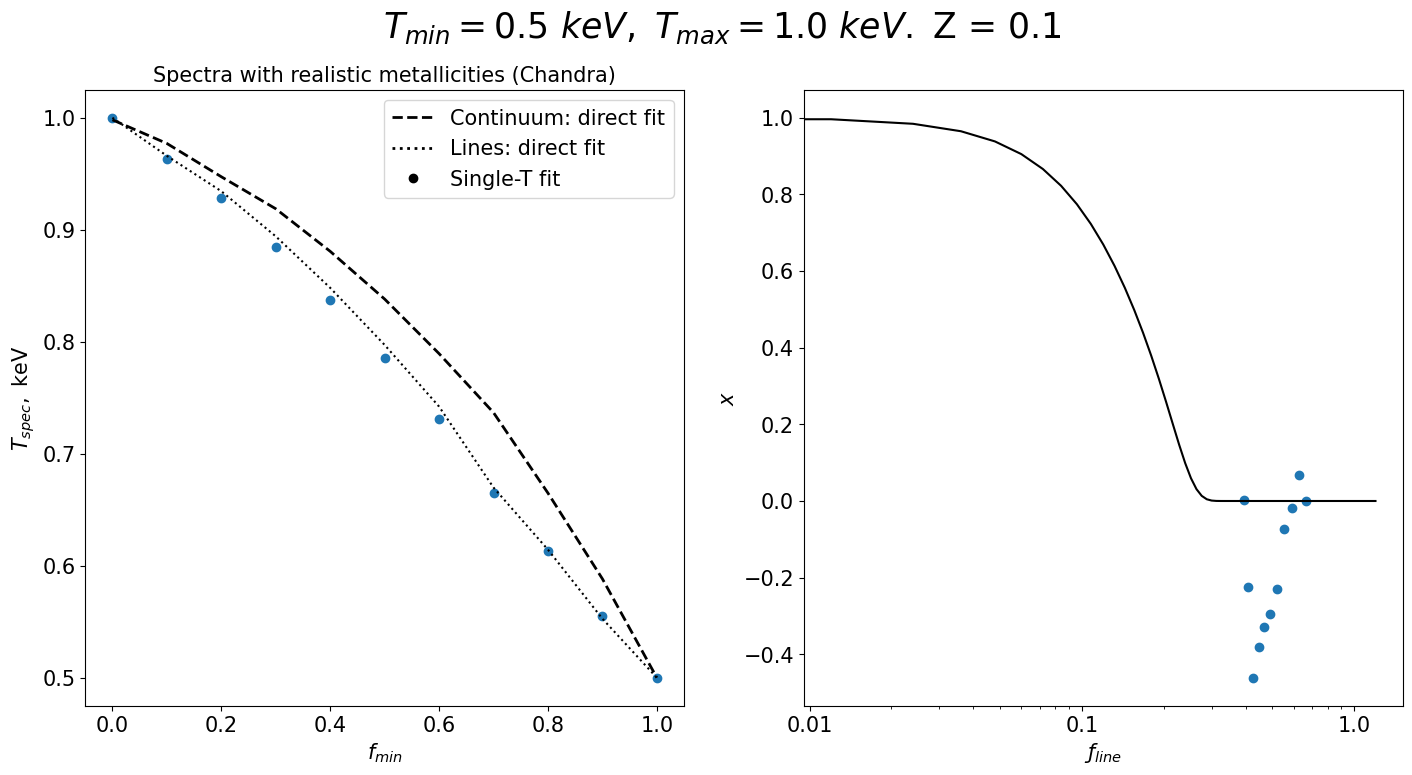

F_cnt + F_lin = F_sum =?= F_fit
651.15 + 622.05 = 1273.20 =?= 712.17 ....... f_line = 0.09, x = 4.27
613.80 + 850.19 = 1463.99 =?= 685.00 ....... f_line = 0.10, x = 0.79
580.38 + 1171.15 = 1751.53 =?= 655.94 ....... f_line = 0.12, x = 0.70
543.98 + 1465.94 = 2009.92 =?= 629.07 ....... f_line = 0.14, x = 0.64
509.90 + 1650.78 = 2160.68 =?= 599.15 ....... f_line = 0.15, x = 0.51
474.60 + 1783.04 = 2257.64 =?= 574.03 ....... f_line = 0.17, x = 0.38
440.79 + 1848.44 = 2289.23 =?= 556.17 ....... f_line = 0.21, x = 0.30
406.25 + 1902.73 = 2308.98 =?= 542.53 ....... f_line = 0.25, x = 0.24
374.03 + 1959.82 = 2333.86 =?= 531.10 ....... f_line = 0.30, x = 0.20
341.82 + 1992.83 = 2334.64 =?= 521.80 ....... f_line = 0.34, x = 0.18
311.68 + 2021.16 = 2332.83 =?= 512.51 ....... f_line = 0.39, x = 19118.37


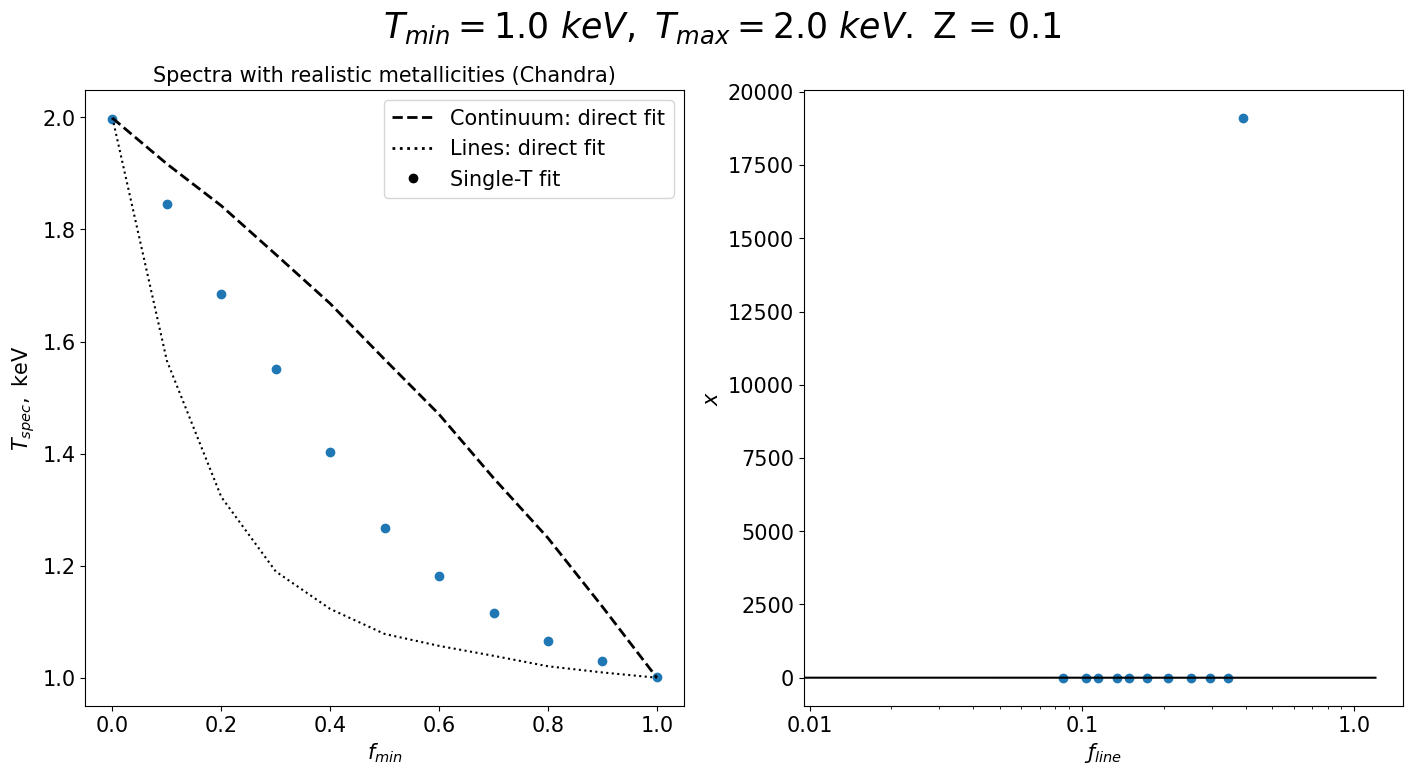

F_cnt + F_lin = F_sum =?= F_fit
1083.49 + 474.03 = 1557.52 =?= 1130.43 ....... f_line = 0.04, x = -0.26
1037.54 + 481.55 = 1519.08 =?= 1086.87 ....... f_line = 0.05, x = 0.90
991.68 + 491.69 = 1483.37 =?= 1040.01 ....... f_line = 0.05, x = 0.90
946.76 + 505.35 = 1452.11 =?= 997.77 ....... f_line = 0.05, x = 0.90
901.75 + 520.24 = 1421.99 =?= 954.27 ....... f_line = 0.06, x = 0.91
857.78 + 537.24 = 1395.02 =?= 910.83 ....... f_line = 0.06, x = 0.89
814.83 + 554.98 = 1369.81 =?= 868.42 ....... f_line = 0.06, x = 0.88
771.95 + 573.28 = 1345.23 =?= 829.28 ....... f_line = 0.07, x = 0.91
731.66 + 590.90 = 1322.56 =?= 788.78 ....... f_line = 0.07, x = 0.86
689.82 + 606.41 = 1296.23 =?= 750.61 ....... f_line = 0.08, x = 0.90
650.51 + 621.88 = 1272.39 =?= 712.10 ....... f_line = 0.09, x = 0.00


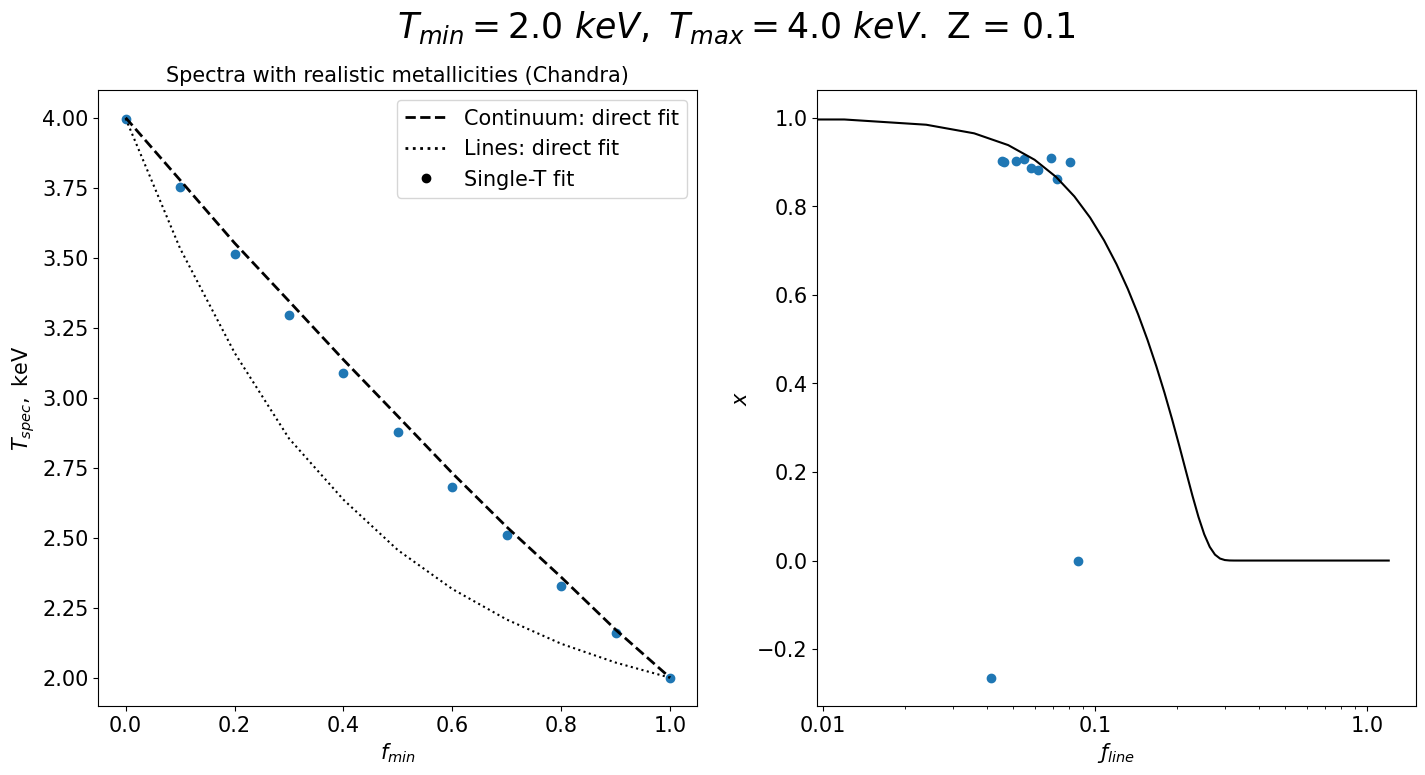

F_cnt + F_lin = F_sum =?= F_fit
1323.11 + 451.16 = 1774.27 =?= 1367.10 ....... f_line = 0.03, x = -9.71
1276.42 + 459.59 = 1736.01 =?= 1323.08 ....... f_line = 0.04, x = 0.96
1232.81 + 465.05 = 1697.86 =?= 1280.60 ....... f_line = 0.04, x = 0.94
1187.26 + 468.98 = 1656.24 =?= 1232.41 ....... f_line = 0.04, x = 0.87
1143.58 + 472.32 = 1615.90 =?= 1190.79 ....... f_line = 0.04, x = 0.93
1102.18 + 475.76 = 1577.94 =?= 1149.17 ....... f_line = 0.04, x = 0.93
1059.90 + 479.46 = 1539.36 =?= 1106.55 ....... f_line = 0.04, x = 0.89
1018.31 + 483.63 = 1501.95 =?= 1065.54 ....... f_line = 0.04, x = 0.90
977.89 + 488.05 = 1465.93 =?= 1026.57 ....... f_line = 0.05, x = 0.90
938.39 + 492.93 = 1431.32 =?= 987.02 ....... f_line = 0.05, x = 0.90
900.24 + 498.08 = 1398.31 =?= 949.37 ....... f_line = 0.05, x = 0.00


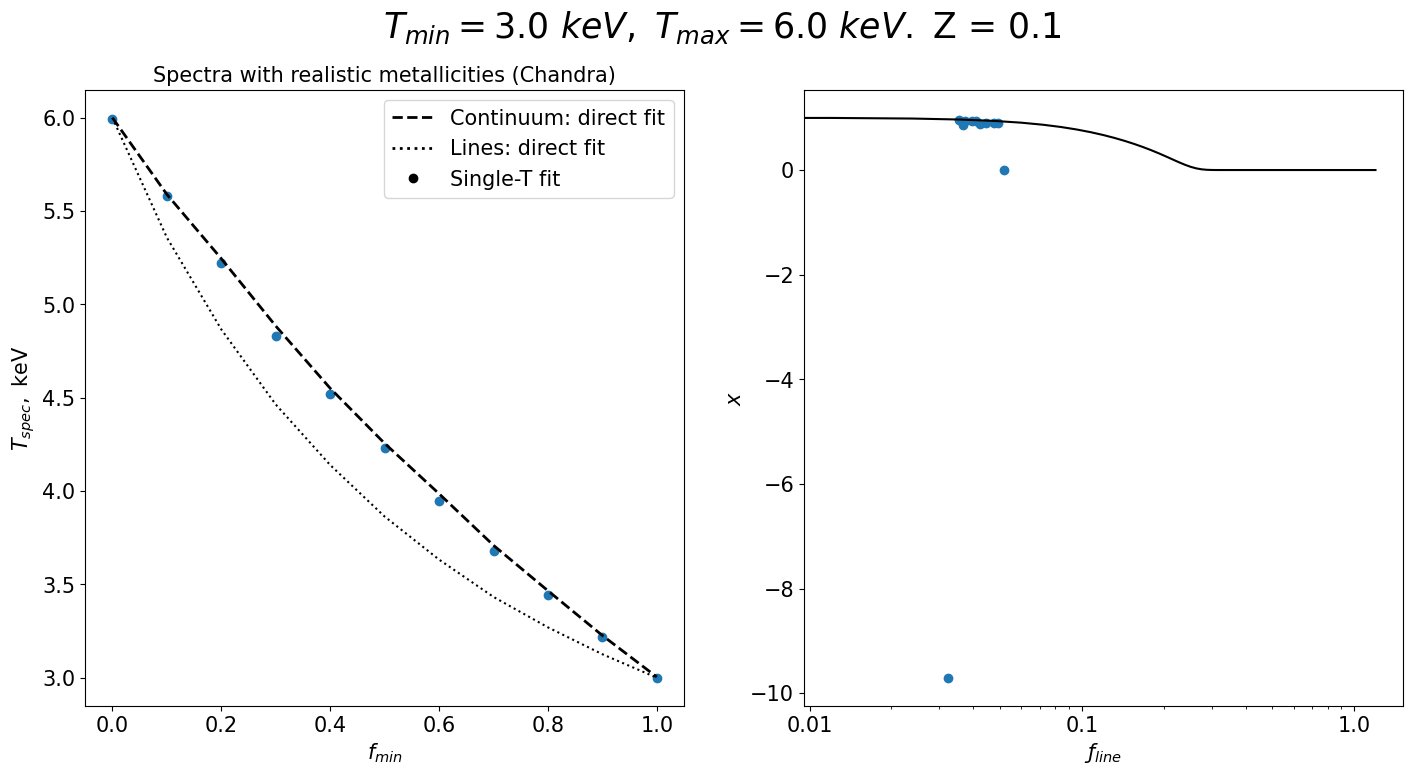

F_cnt + F_lin = F_sum =?= F_fit
494.07 + 915.49 = 1409.57 =?= 585.53 ....... f_line = 0.16, x = 10617.34
454.26 + 1054.22 = 1508.48 =?= 549.50 ....... f_line = 0.17, x = 0.05
414.71 + 1199.81 = 1614.52 =?= 511.91 ....... f_line = 0.19, x = -0.27
374.04 + 1477.90 = 1851.93 =?= 474.39 ....... f_line = 0.21, x = -0.23
334.24 + 2546.46 = 2880.70 =?= 437.08 ....... f_line = 0.24, x = 0.47
294.78 + 2541.15 = 2835.94 =?= 404.25 ....... f_line = 0.27, x = 0.39
254.34 + 2484.45 = 2738.79 =?= 378.71 ....... f_line = 0.33, x = 0.28
215.04 + 2421.94 = 2636.97 =?= 360.63 ....... f_line = 0.40, x = 0.22
176.48 + 2355.93 = 2532.41 =?= 346.46 ....... f_line = 0.49, x = 0.21
140.48 + 2284.97 = 2425.45 =?= 335.55 ....... f_line = 0.58, x = 0.24
108.40 + 2183.13 = 2291.53 =?= 326.57 ....... f_line = 0.67, x = 0.00


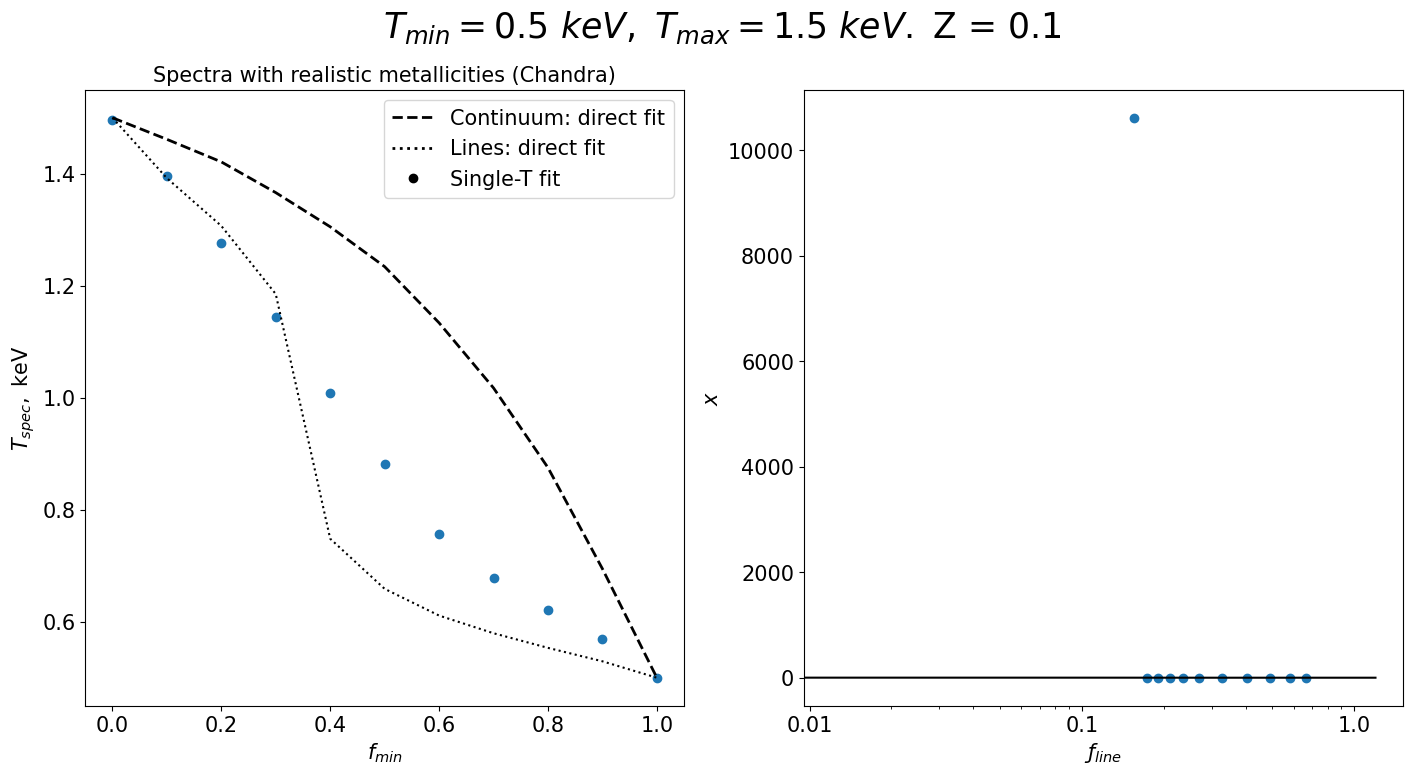

F_cnt + F_lin = F_sum =?= F_fit
898.32 + 498.17 = 1396.49 =?= 947.30 ....... f_line = 0.05, x = -3.76
836.25 + 832.06 = 1668.31 =?= 892.03 ....... f_line = 0.06, x = 0.89
772.61 + 1452.54 = 2225.15 =?= 833.99 ....... f_line = 0.07, x = 0.83
711.27 + 1673.58 = 2384.85 =?= 775.05 ....... f_line = 0.08, x = 0.74
649.05 + 1814.36 = 2463.41 =?= 718.24 ....... f_line = 0.10, x = 0.66
588.60 + 1868.04 = 2456.64 =?= 657.80 ....... f_line = 0.11, x = 0.51
527.64 + 1912.06 = 2439.69 =?= 603.49 ....... f_line = 0.13, x = 0.34
468.52 + 1959.71 = 2428.23 =?= 569.41 ....... f_line = 0.18, x = 0.25
413.68 + 1984.31 = 2397.99 =?= 547.16 ....... f_line = 0.24, x = 0.20
360.26 + 2003.12 = 2363.38 =?= 529.49 ....... f_line = 0.32, x = 0.17
310.52 + 2021.01 = 2331.53 =?= 512.73 ....... f_line = 0.39, x = 1.04


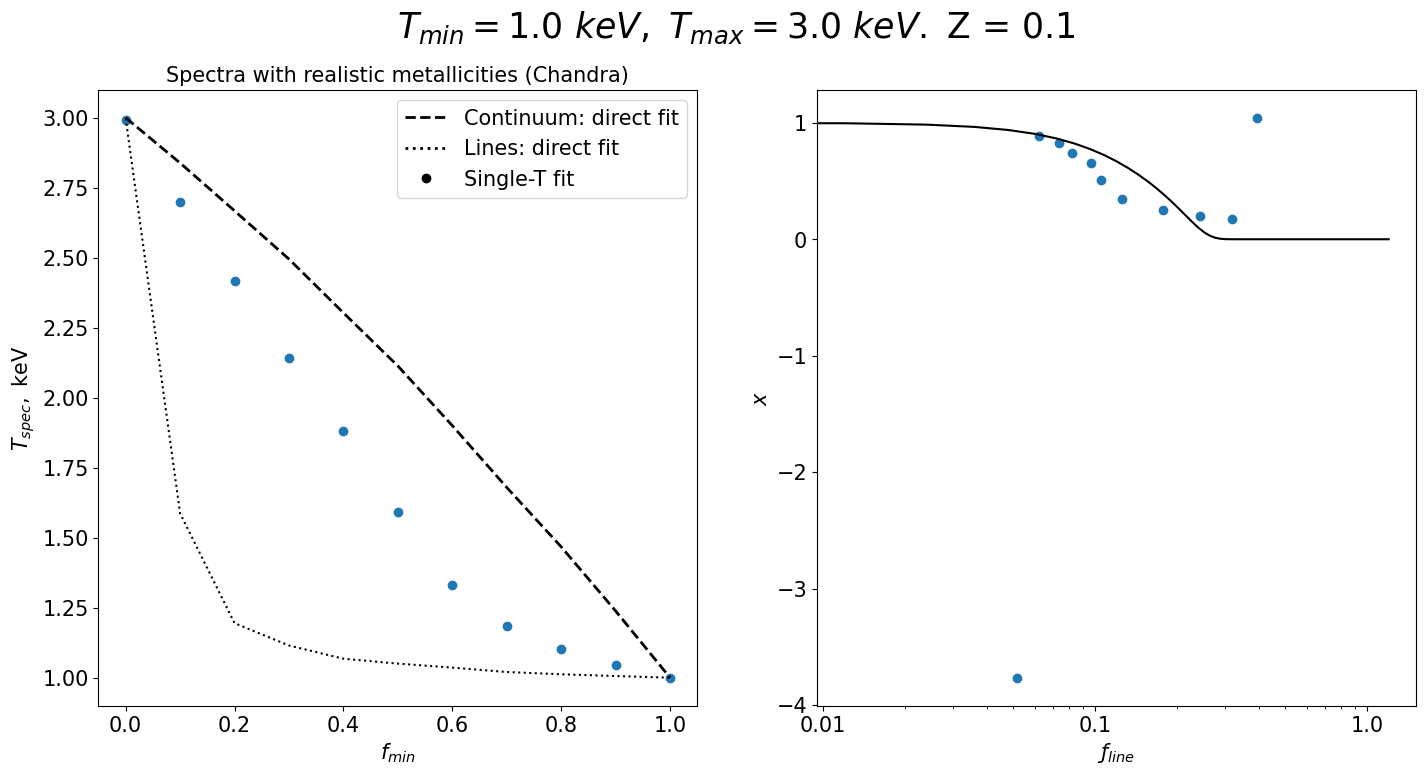

F_cnt + F_lin = F_sum =?= F_fit
1320.53 + 451.15 = 1771.68 =?= 1366.55 ....... f_line = 0.03, x = 0.38
1247.22 + 466.79 = 1714.01 =?= 1294.37 ....... f_line = 0.04, x = 0.92
1175.40 + 475.75 = 1651.15 =?= 1222.11 ....... f_line = 0.04, x = 0.89
1103.53 + 487.39 = 1590.92 =?= 1152.62 ....... f_line = 0.04, x = 0.90
1032.35 + 505.51 = 1537.86 =?= 1084.77 ....... f_line = 0.05, x = 0.91
964.42 + 527.50 = 1491.92 =?= 1016.05 ....... f_line = 0.05, x = 0.89
897.08 + 548.13 = 1445.21 =?= 951.53 ....... f_line = 0.06, x = 0.90
832.51 + 568.70 = 1401.21 =?= 887.46 ....... f_line = 0.06, x = 0.87
768.88 + 588.48 = 1357.36 =?= 826.98 ....... f_line = 0.07, x = 0.89
709.00 + 605.04 = 1314.04 =?= 768.64 ....... f_line = 0.08, x = 0.87
651.88 + 621.74 = 1273.62 =?= 712.97 ....... f_line = 0.09, x = 1.00


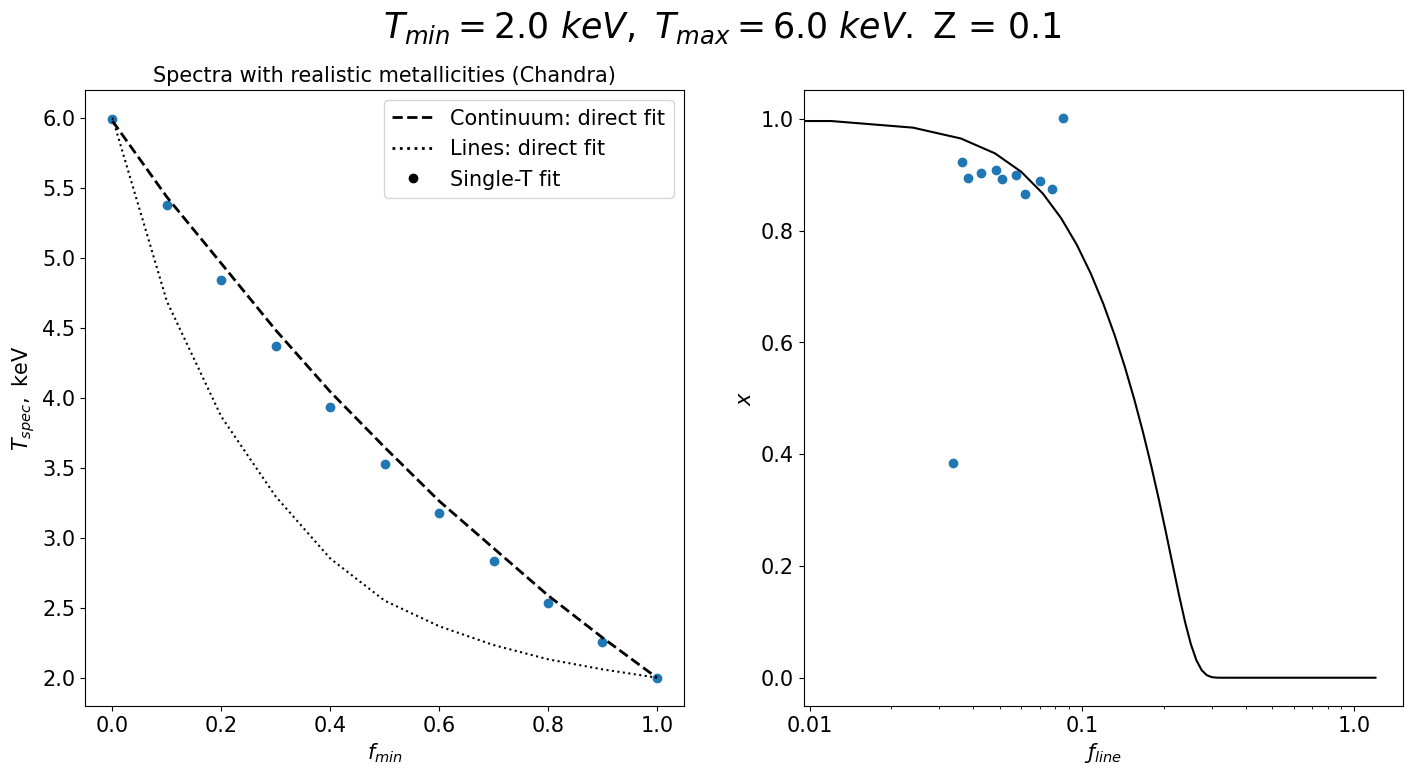

F_cnt + F_lin = F_sum =?= F_fit
1501.69 + 399.47 = 1901.16 =?= 1543.50 ....... f_line = 0.03, x = -0.41
1438.53 + 436.08 = 1874.61 =?= 1476.45 ....... f_line = 0.03, x = 0.89
1371.38 + 455.00 = 1826.37 =?= 1411.57 ....... f_line = 0.03, x = 0.92
1306.76 + 464.22 = 1770.99 =?= 1347.49 ....... f_line = 0.03, x = 0.90
1242.94 + 469.50 = 1712.43 =?= 1285.09 ....... f_line = 0.03, x = 0.90
1182.55 + 473.93 = 1656.48 =?= 1225.81 ....... f_line = 0.04, x = 0.90
1121.94 + 478.15 = 1600.09 =?= 1166.32 ....... f_line = 0.04, x = 0.89
1062.07 + 482.68 = 1544.75 =?= 1110.43 ....... f_line = 0.04, x = 0.91
1005.38 + 487.39 = 1492.77 =?= 1055.57 ....... f_line = 0.05, x = 0.93
952.18 + 492.58 = 1444.76 =?= 1001.58 ....... f_line = 0.05, x = 0.88
899.32 + 498.08 = 1397.40 =?= 948.58 ....... f_line = 0.05, x = 0.00


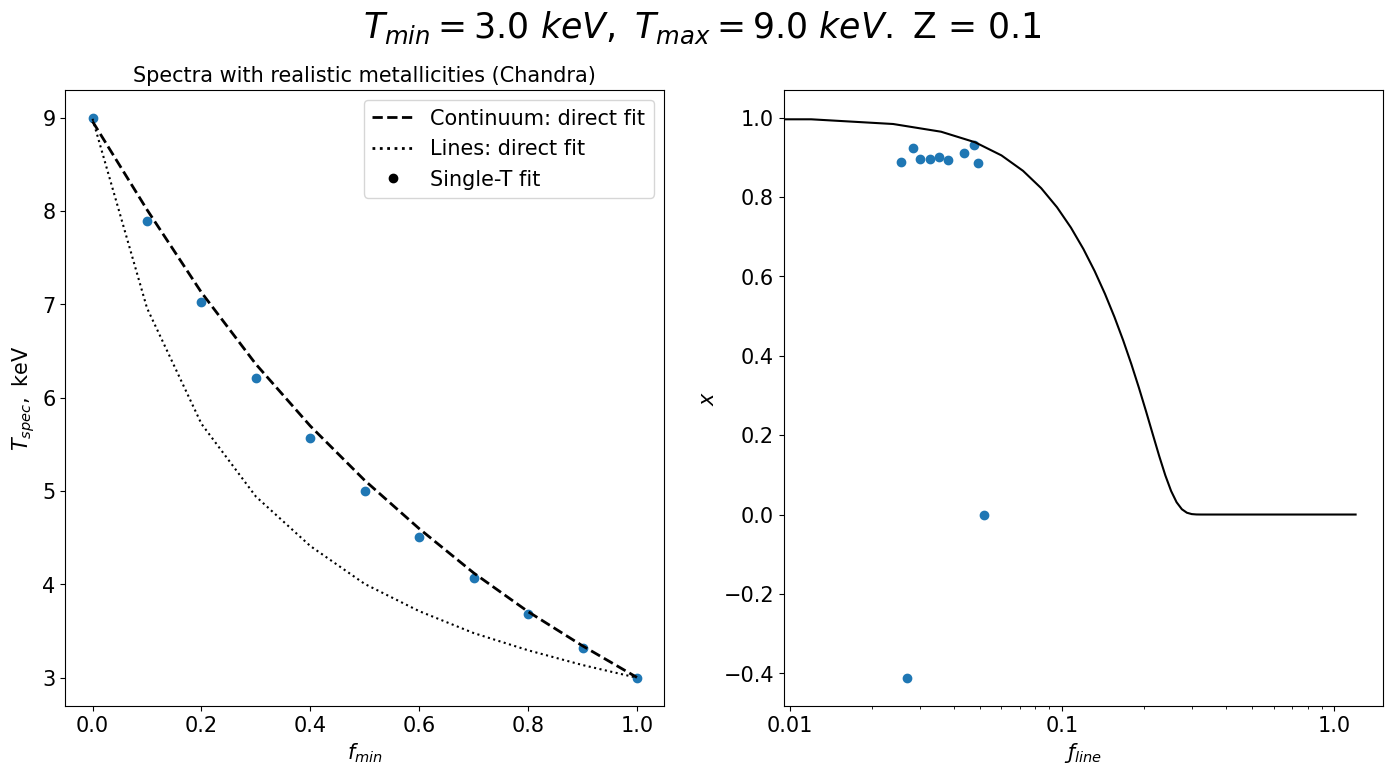

F_cnt + F_lin = F_sum =?= F_fit
650.56 + 621.88 = 1272.44 =?= 712.24 ....... f_line = 0.09, x = 1.24
594.44 + 723.96 = 1318.41 =?= 660.07 ....... f_line = 0.10, x = 0.50
537.67 + 918.52 = 1456.19 =?= 605.79 ....... f_line = 0.11, x = 0.46
480.81 + 2513.21 = 2994.02 =?= 549.77 ....... f_line = 0.13, x = 0.74
425.71 + 2462.41 = 2888.12 =?= 494.47 ....... f_line = 0.14, x = 0.64
368.33 + 2429.09 = 2797.42 =?= 437.95 ....... f_line = 0.16, x = 0.51
312.30 + 2389.02 = 2701.32 =?= 389.94 ....... f_line = 0.20, x = 0.34
256.44 + 2352.37 = 2608.80 =?= 363.91 ....... f_line = 0.30, x = 0.22
200.78 + 2316.25 = 2517.03 =?= 348.14 ....... f_line = 0.42, x = 0.20
150.18 + 2262.50 = 2412.68 =?= 335.41 ....... f_line = 0.55, x = 0.23
108.48 + 2183.13 = 2291.62 =?= 326.74 ....... f_line = 0.67, x = 0.00


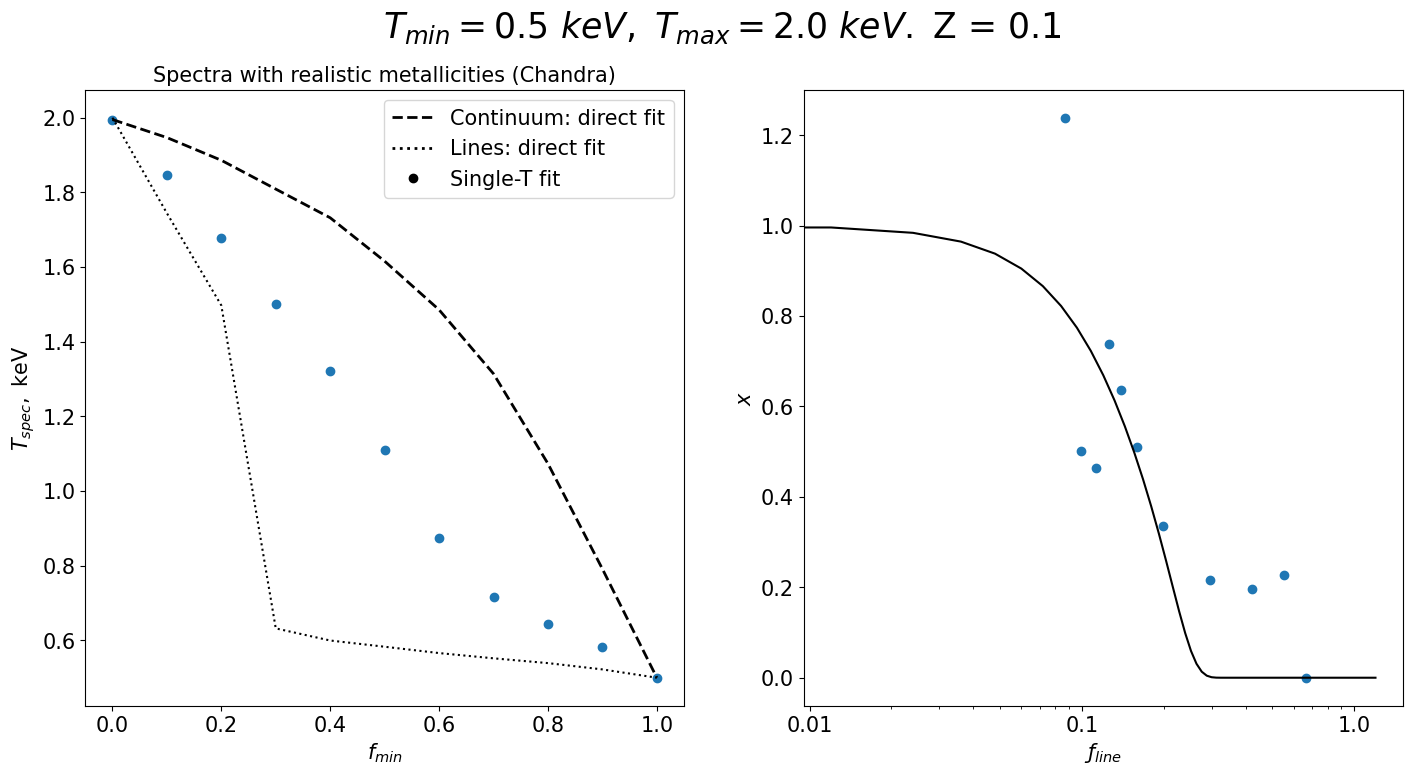

F_cnt + F_lin = F_sum =?= F_fit
1083.32 + 474.01 = 1557.33 =?= 1131.80 ....... f_line = 0.04, x = -0.05
1000.58 + 1030.77 = 2031.34 =?= 1050.70 ....... f_line = 0.05, x = 0.91
915.97 + 1638.92 = 2554.89 =?= 972.31 ....... f_line = 0.06, x = 0.85
833.08 + 1806.56 = 2639.64 =?= 891.23 ....... f_line = 0.07, x = 0.77
749.99 + 1863.71 = 2613.70 =?= 813.04 ....... f_line = 0.08, x = 0.70
669.68 + 1906.75 = 2576.43 =?= 734.31 ....... f_line = 0.09, x = 0.60
588.84 + 1953.89 = 2542.73 =?= 651.67 ....... f_line = 0.10, x = 0.44
512.50 + 1977.45 = 2489.95 =?= 587.74 ....... f_line = 0.13, x = 0.25
439.95 + 1993.42 = 2433.37 =?= 555.68 ....... f_line = 0.21, x = 0.18
371.28 + 2007.12 = 2378.40 =?= 532.64 ....... f_line = 0.30, x = 0.16
310.33 + 2021.13 = 2331.46 =?= 512.44 ....... f_line = 0.39, x = 1.03


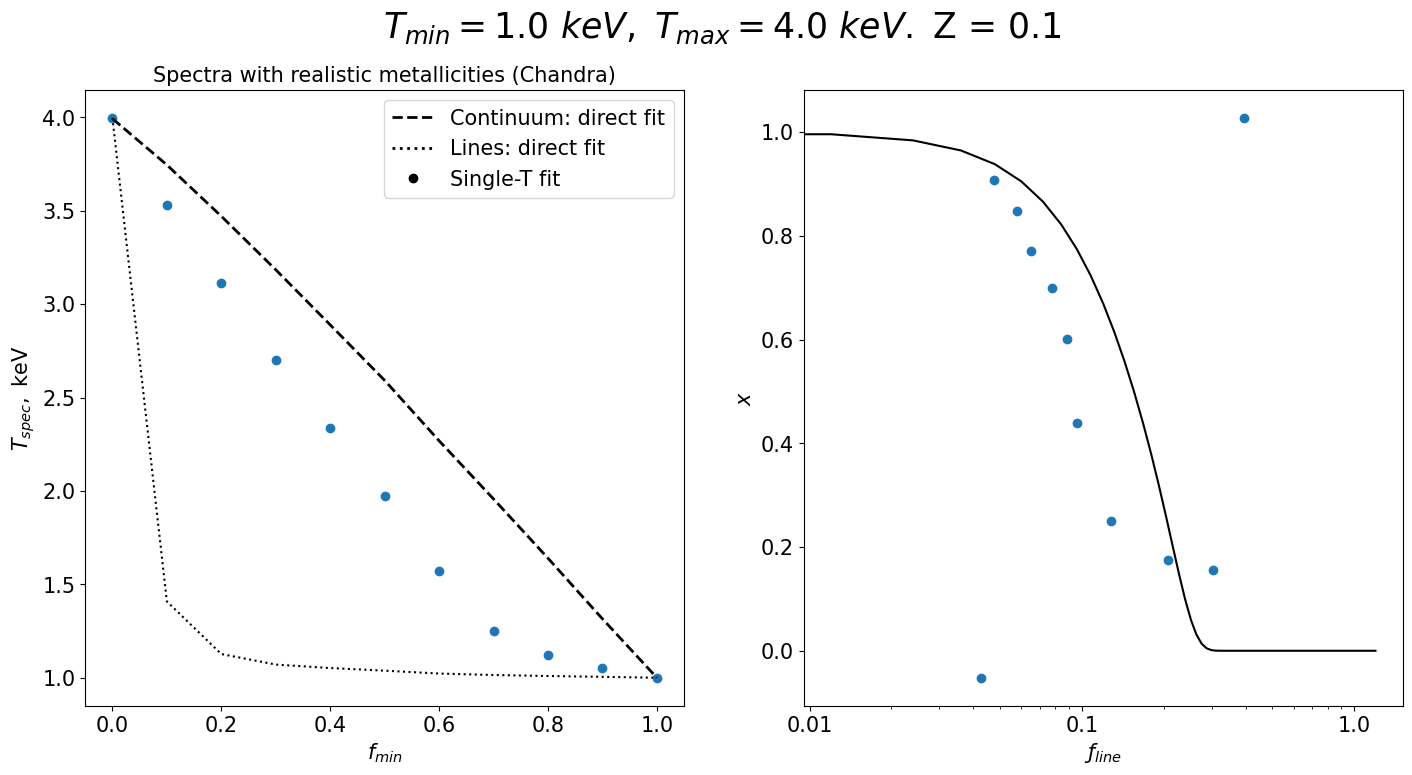

F_cnt + F_lin = F_sum =?= F_fit
1458.54 + 418.16 = 1876.71 =?= 1499.74 ....... f_line = 0.03, x = -1.01
1366.31 + 459.25 = 1825.56 =?= 1410.57 ....... f_line = 0.03, x = 0.93
1276.91 + 472.36 = 1749.27 =?= 1320.02 ....... f_line = 0.03, x = 0.90
1189.37 + 485.25 = 1674.62 =?= 1235.01 ....... f_line = 0.04, x = 0.90
1104.45 + 504.66 = 1609.11 =?= 1151.72 ....... f_line = 0.04, x = 0.88
1019.97 + 527.93 = 1547.90 =?= 1070.45 ....... f_line = 0.05, x = 0.88
938.75 + 549.15 = 1487.89 =?= 992.97 ....... f_line = 0.05, x = 0.88
861.84 + 570.04 = 1431.89 =?= 916.38 ....... f_line = 0.06, x = 0.88
787.03 + 589.82 = 1376.85 =?= 845.36 ....... f_line = 0.07, x = 0.88
718.07 + 605.93 = 1324.00 =?= 776.88 ....... f_line = 0.08, x = 0.87
651.58 + 621.79 = 1273.37 =?= 712.32 ....... f_line = 0.09, x = 1.00


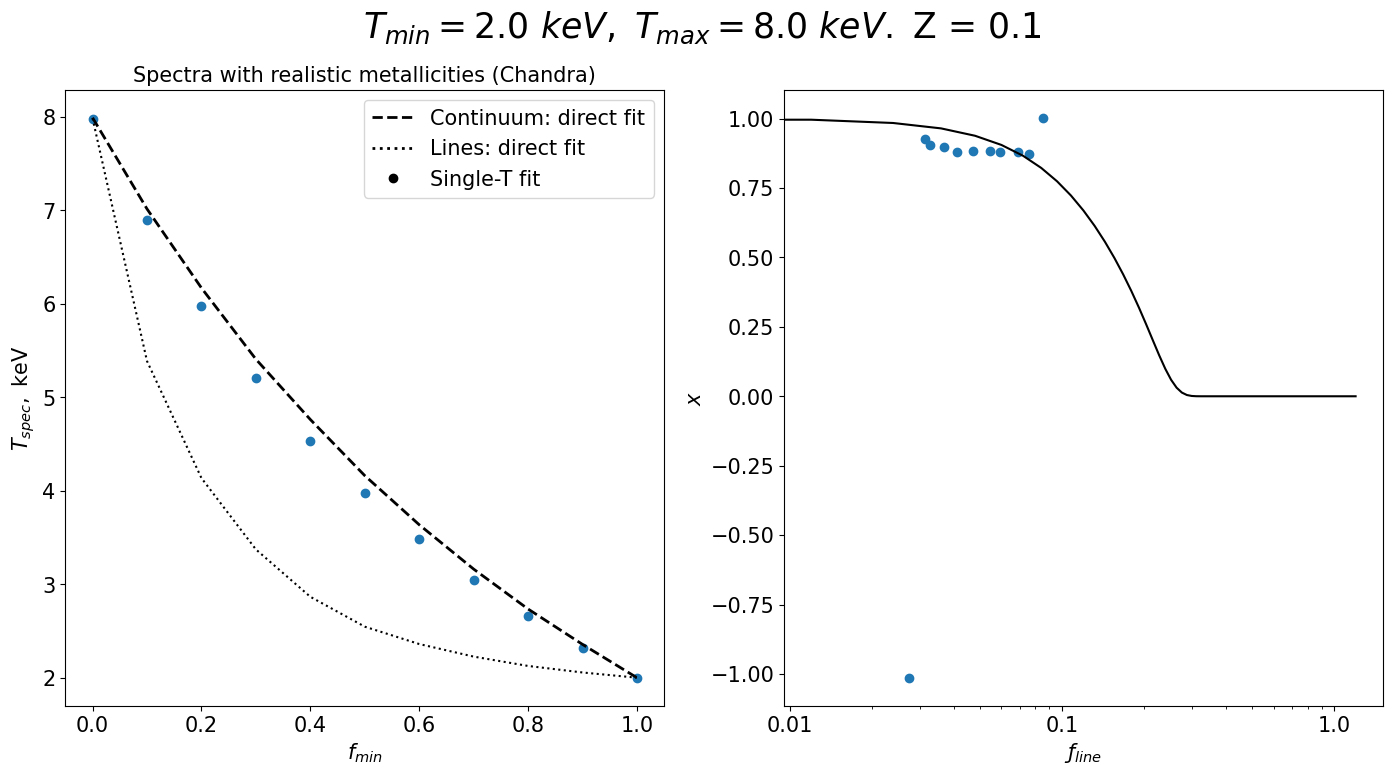

F_cnt + F_lin = F_sum =?= F_fit
1584.67 + 349.43 = 1934.10 =?= 1621.31 ....... f_line = 0.02, x = -0.00
1510.05 + 419.70 = 1929.75 =?= 1543.19 ....... f_line = 0.02, x = 0.90
1431.67 + 452.47 = 1884.14 =?= 1470.89 ....... f_line = 0.03, x = 0.95
1357.81 + 464.56 = 1822.37 =?= 1396.82 ....... f_line = 0.03, x = 0.92
1284.00 + 470.66 = 1754.66 =?= 1323.76 ....... f_line = 0.03, x = 0.92
1214.24 + 474.92 = 1689.16 =?= 1256.51 ....... f_line = 0.03, x = 0.92
1145.31 + 479.21 = 1624.52 =?= 1190.23 ....... f_line = 0.04, x = 0.92
1081.88 + 483.63 = 1565.51 =?= 1127.23 ....... f_line = 0.04, x = 0.90
1016.21 + 488.28 = 1504.49 =?= 1064.63 ....... f_line = 0.05, x = 0.90
957.35 + 493.13 = 1450.48 =?= 1004.96 ....... f_line = 0.05, x = 0.89
900.63 + 498.08 = 1398.71 =?= 949.15 ....... f_line = 0.05, x = 0.00


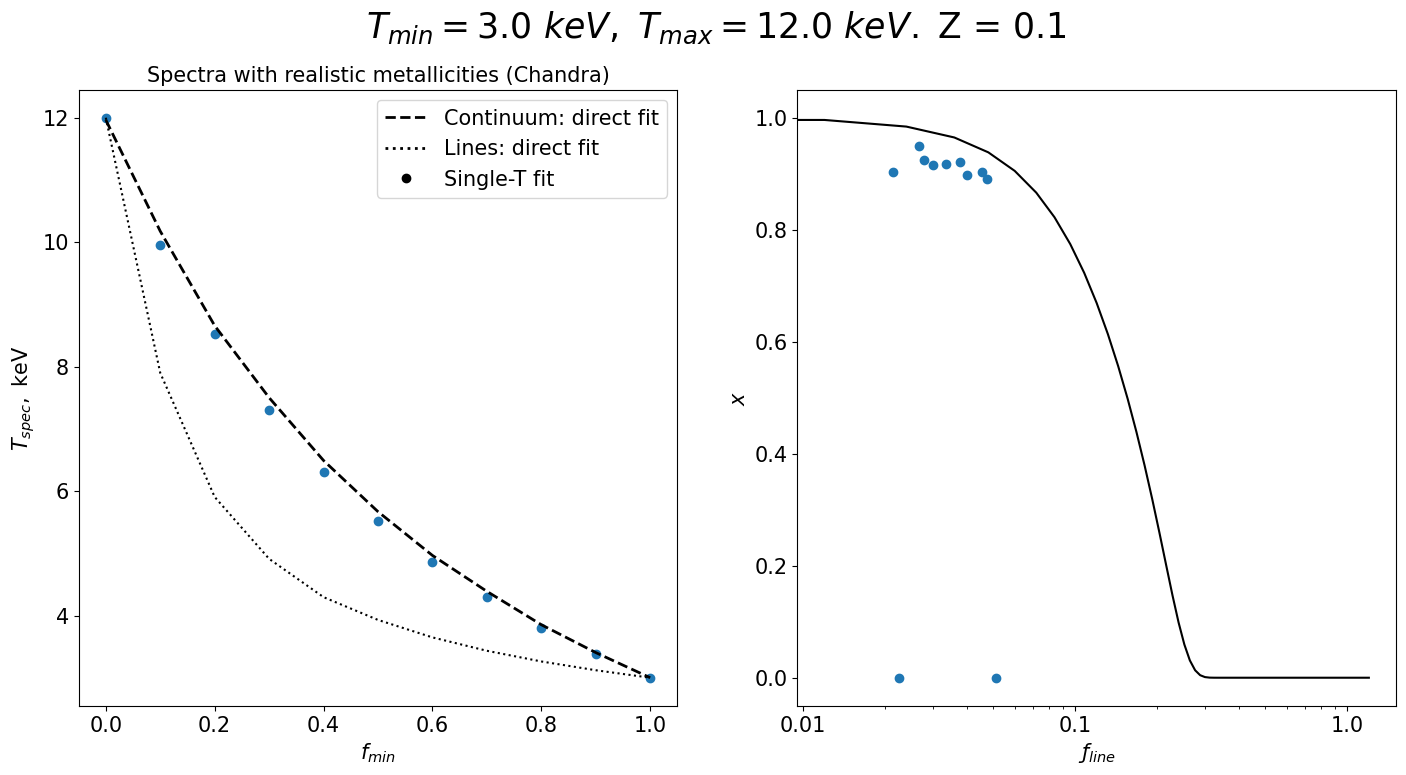

F_cnt + F_lin = F_sum =?= F_fit
310.28 + 2021.16 = 2331.44 =?= 917.01 ....... f_line = 0.66, x = 0.00
289.48 + 2123.04 = 2412.52 =?= 893.52 ....... f_line = 0.68, x = -0.35
268.91 + 2209.82 = 2478.73 =?= 869.68 ....... f_line = 0.69, x = -0.48
247.64 + 2312.60 = 2560.24 =?= 848.66 ....... f_line = 0.71, x = -0.48
227.44 + 2413.31 = 2640.74 =?= 828.42 ....... f_line = 0.73, x = -0.34
206.87 + 2497.44 = 2704.32 =?= 810.70 ....... f_line = 0.74, x = -0.31
186.06 + 2550.18 = 2736.24 =?= 800.41 ....... f_line = 0.77, x = -0.64
166.09 + 2548.87 = 2714.95 =?= 790.90 ....... f_line = 0.79, x = -0.21
146.11 + 2488.96 = 2635.08 =?= 784.01 ....... f_line = 0.81, x = -0.42
126.79 + 2354.55 = 2481.34 =?= 774.07 ....... f_line = 0.84, x = -0.24
108.04 + 2183.13 = 2291.17 =?= 763.52 ....... f_line = 0.86, x = 0.00


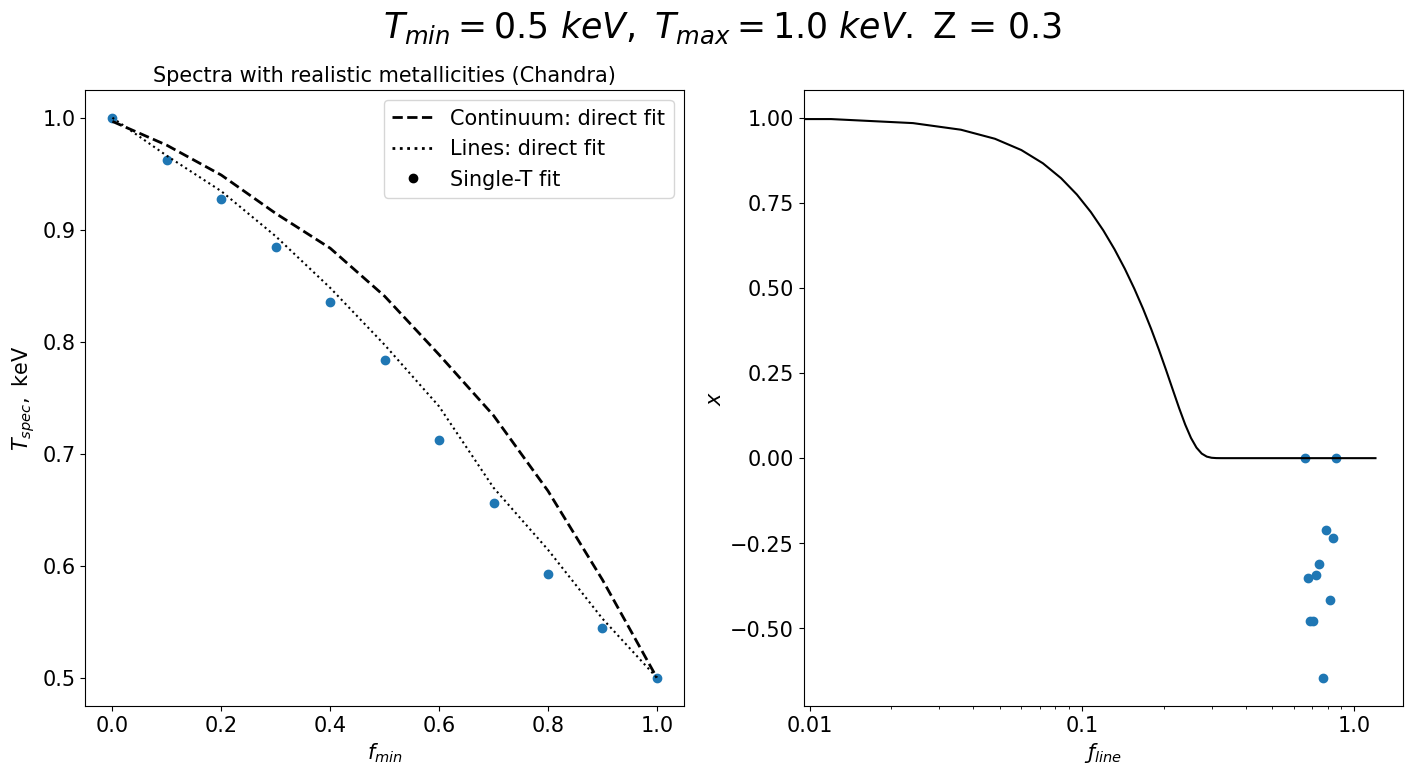

F_cnt + F_lin = F_sum =?= F_fit
649.79 + 621.88 = 1271.66 =?= 836.86 ....... f_line = 0.22, x = 0.34
614.72 + 850.23 = 1464.94 =?= 818.28 ....... f_line = 0.25, x = 0.41
579.86 + 1171.52 = 1751.38 =?= 803.20 ....... f_line = 0.28, x = 0.32
543.66 + 1466.22 = 2009.88 =?= 795.97 ....... f_line = 0.32, x = 0.22
509.79 + 1650.90 = 2160.69 =?= 799.86 ....... f_line = 0.36, x = 0.13
474.81 + 1783.29 = 2258.11 =?= 812.85 ....... f_line = 0.42, x = 0.10
441.45 + 1848.84 = 2290.30 =?= 830.69 ....... f_line = 0.47, x = 0.06
406.36 + 1902.43 = 2308.79 =?= 851.42 ....... f_line = 0.52, x = 0.04
374.33 + 1959.97 = 2334.30 =?= 873.24 ....... f_line = 0.57, x = 0.04
341.79 + 1993.05 = 2334.83 =?= 895.28 ....... f_line = 0.62, x = 0.03
311.32 + 2021.15 = 2332.48 =?= 917.67 ....... f_line = 0.66, x = 1.40


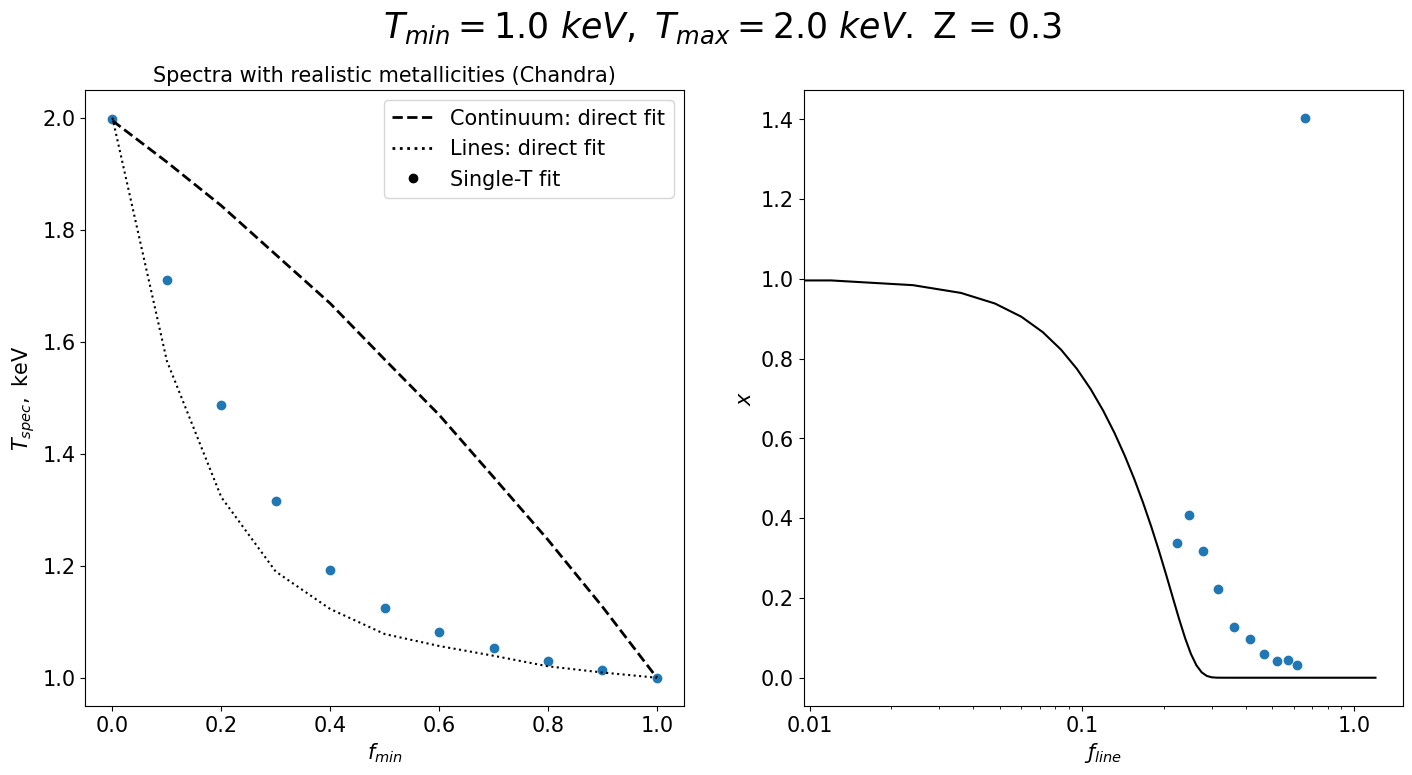

F_cnt + F_lin = F_sum =?= F_fit
1082.55 + 474.03 = 1556.58 =?= 1224.13 ....... f_line = 0.12, x = 0.46
1037.06 + 481.53 = 1518.59 =?= 1182.92 ....... f_line = 0.12, x = 0.81
991.46 + 491.68 = 1483.14 =?= 1139.88 ....... f_line = 0.13, x = 0.77
946.12 + 505.21 = 1451.33 =?= 1098.13 ....... f_line = 0.14, x = 0.77
901.73 + 520.39 = 1422.12 =?= 1056.54 ....... f_line = 0.15, x = 0.75
857.66 + 537.23 = 1394.88 =?= 1018.22 ....... f_line = 0.16, x = 0.75
815.21 + 554.81 = 1370.02 =?= 978.44 ....... f_line = 0.17, x = 0.72
772.49 + 572.93 = 1345.43 =?= 941.86 ....... f_line = 0.18, x = 0.74
730.16 + 591.05 = 1321.21 =?= 904.12 ....... f_line = 0.19, x = 0.70
690.56 + 606.49 = 1297.06 =?= 870.27 ....... f_line = 0.21, x = 0.67
652.96 + 621.88 = 1274.84 =?= 836.70 ....... f_line = 0.22, x = 0.00


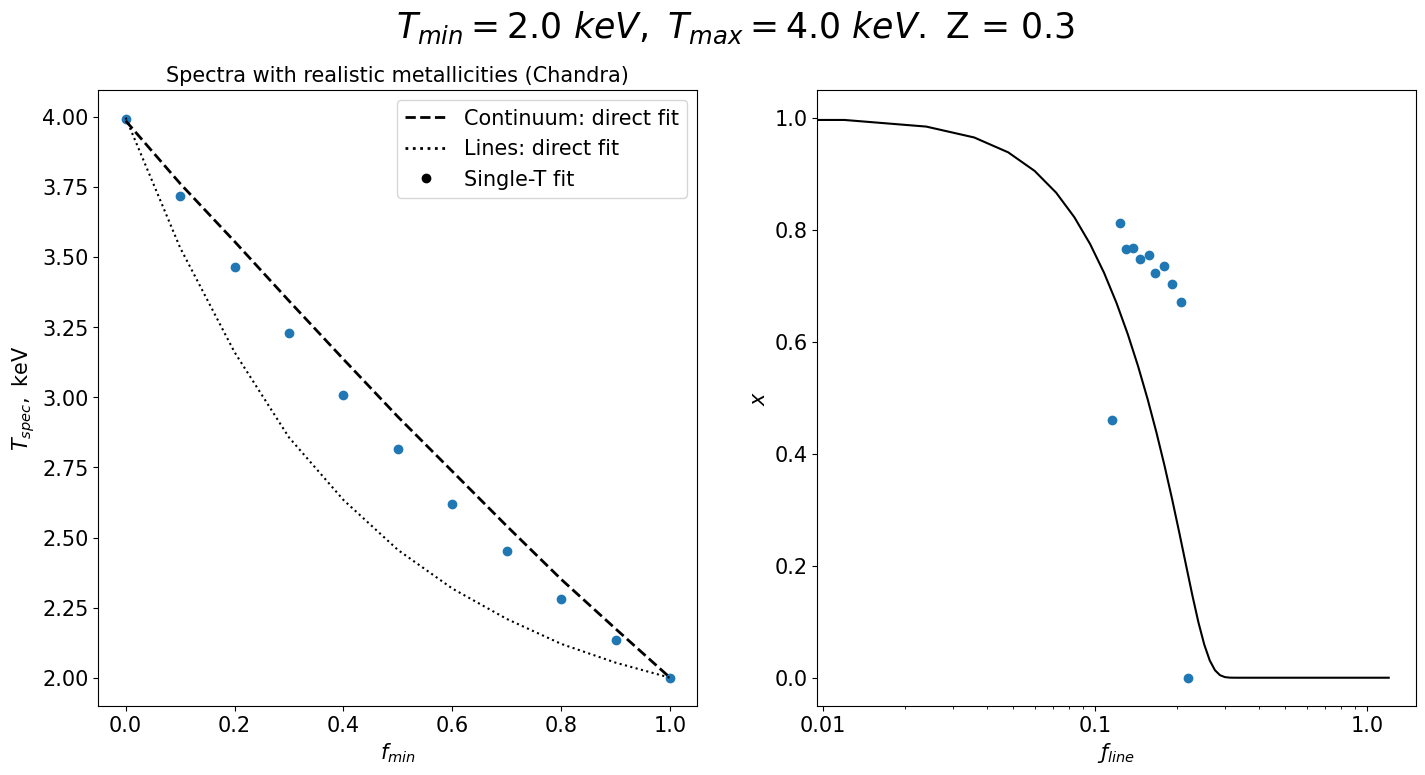

F_cnt + F_lin = F_sum =?= F_fit
1321.38 + 451.26 = 1772.64 =?= 1457.73 ....... f_line = 0.09, x = 0.99
1276.68 + 459.56 = 1736.24 =?= 1412.22 ....... f_line = 0.10, x = 0.79
1231.70 + 465.03 = 1696.74 =?= 1369.92 ....... f_line = 0.10, x = 0.81
1189.18 + 468.93 = 1658.11 =?= 1326.27 ....... f_line = 0.10, x = 0.76
1143.51 + 472.32 = 1615.82 =?= 1283.69 ....... f_line = 0.11, x = 0.79
1101.37 + 475.79 = 1577.17 =?= 1243.29 ....... f_line = 0.11, x = 0.79
1060.56 + 479.56 = 1540.12 =?= 1202.72 ....... f_line = 0.12, x = 0.78
1017.76 + 483.66 = 1501.43 =?= 1161.64 ....... f_line = 0.12, x = 0.77
977.70 + 487.99 = 1465.70 =?= 1124.20 ....... f_line = 0.13, x = 0.77
937.22 + 492.90 = 1430.12 =?= 1085.97 ....... f_line = 0.14, x = 0.78
900.05 + 498.05 = 1398.10 =?= 1048.55 ....... f_line = 0.14, x = -5.14


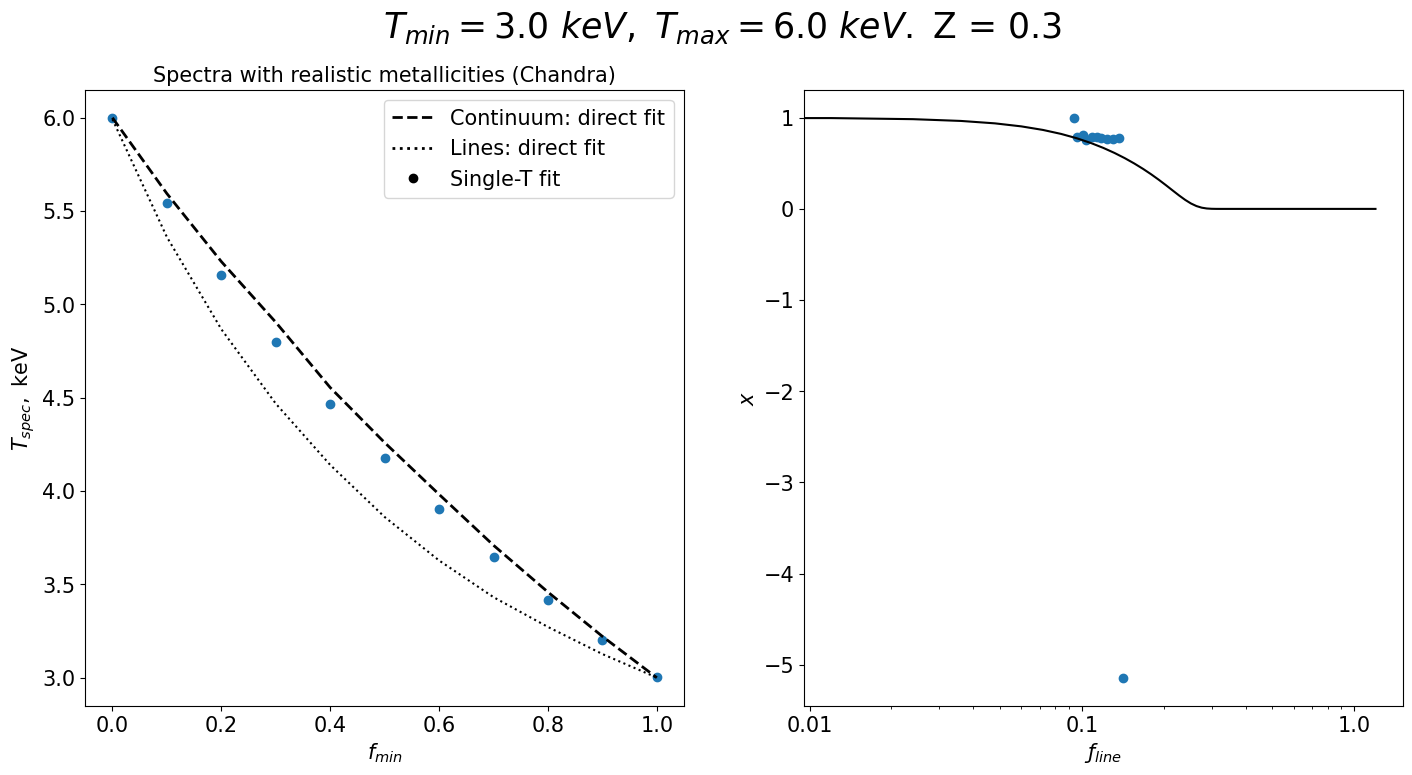

F_cnt + F_lin = F_sum =?= F_fit
493.95 + 915.75 = 1409.70 =?= 768.93 ....... f_line = 0.36, x = -0.22
453.78 + 1053.85 = 1507.63 =?= 744.49 ....... f_line = 0.39, x = -0.55
414.08 + 1260.74 = 1674.82 =?= 715.92 ....... f_line = 0.42, x = -0.52
374.18 + 1477.58 = 1851.76 =?= 689.22 ....... f_line = 0.46, x = -1.00
334.21 + 2546.60 = 2880.81 =?= 674.04 ....... f_line = 0.50, x = 0.08
294.48 + 2541.24 = 2835.72 =?= 677.51 ....... f_line = 0.57, x = 0.06
254.74 + 2484.38 = 2739.12 =?= 688.74 ....... f_line = 0.63, x = 0.03
215.30 + 2421.24 = 2636.54 =?= 704.48 ....... f_line = 0.69, x = 0.02
176.55 + 2355.77 = 2532.32 =?= 721.91 ....... f_line = 0.76, x = 0.01
140.11 + 2285.17 = 2425.28 =?= 741.98 ....... f_line = 0.81, x = 0.02
108.01 + 2183.51 = 2291.52 =?= 763.61 ....... f_line = 0.86, x = 1.00


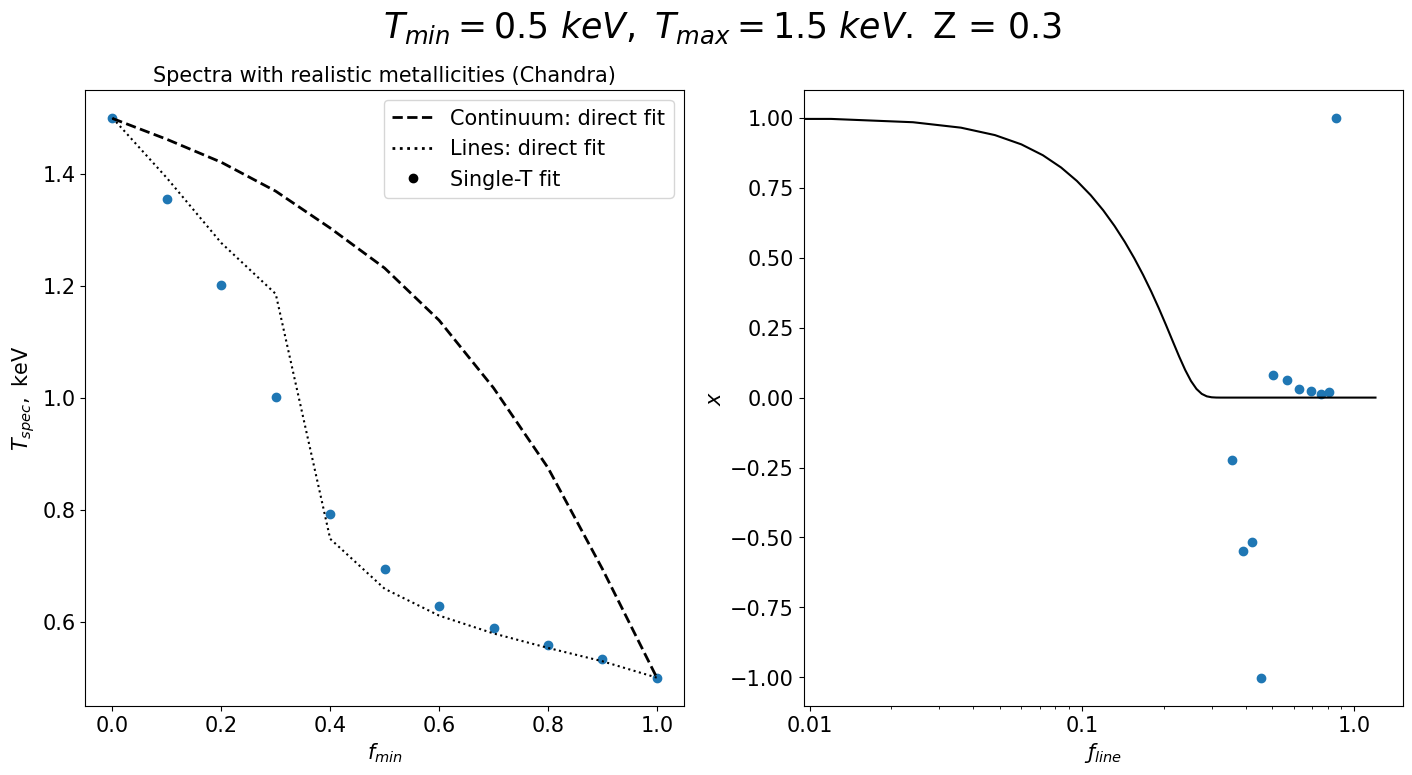

F_cnt + F_lin = F_sum =?= F_fit
897.85 + 498.14 = 1395.99 =?= 1047.16 ....... f_line = 0.14, x = 1.22
835.95 + 831.17 = 1667.13 =?= 998.41 ....... f_line = 0.16, x = 0.73
772.92 + 1451.96 = 2224.88 =?= 943.45 ....... f_line = 0.18, x = 0.60
711.01 + 1673.83 = 2384.83 =?= 879.30 ....... f_line = 0.19, x = 0.39
649.42 + 1814.02 = 2463.44 =?= 830.32 ....... f_line = 0.22, x = 0.19
588.14 + 1867.72 = 2455.86 =?= 826.85 ....... f_line = 0.29, x = 0.11
527.59 + 1911.98 = 2439.58 =?= 839.45 ....... f_line = 0.37, x = 0.07
469.86 + 1959.67 = 2429.52 =?= 857.88 ....... f_line = 0.45, x = 0.05
413.30 + 1984.72 = 2398.02 =?= 877.58 ....... f_line = 0.53, x = 0.05
360.24 + 2002.97 = 2363.21 =?= 898.77 ....... f_line = 0.60, x = 0.03
310.27 + 2021.16 = 2331.42 =?= 916.94 ....... f_line = 0.66, x = 0.00


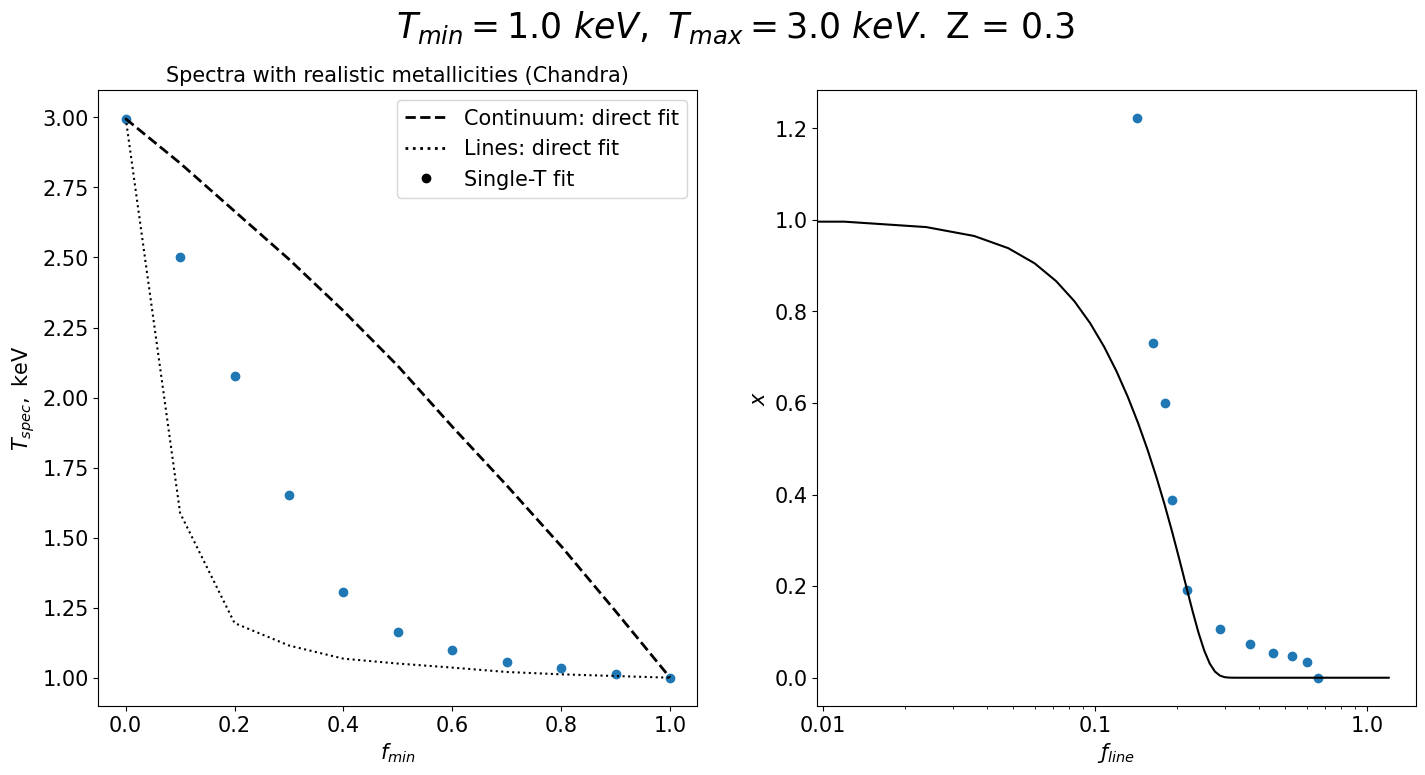

F_cnt + F_lin = F_sum =?= F_fit
1322.20 + 451.15 = 1773.35 =?= 1457.99 ....... f_line = 0.09, x = 0.13
1247.56 + 466.77 = 1714.34 =?= 1385.97 ....... f_line = 0.10, x = 0.81
1176.31 + 475.76 = 1652.06 =?= 1316.72 ....... f_line = 0.11, x = 0.76
1102.11 + 487.38 = 1589.49 =?= 1248.24 ....... f_line = 0.12, x = 0.75
1032.70 + 505.53 = 1538.23 =?= 1182.07 ....... f_line = 0.13, x = 0.74
964.21 + 527.20 = 1491.41 =?= 1116.10 ....... f_line = 0.14, x = 0.73
897.10 + 547.87 = 1444.97 =?= 1054.79 ....... f_line = 0.15, x = 0.72
831.66 + 568.31 = 1399.97 =?= 994.68 ....... f_line = 0.16, x = 0.70
768.43 + 588.49 = 1356.92 =?= 939.52 ....... f_line = 0.18, x = 0.70
708.55 + 604.99 = 1313.55 =?= 886.29 ....... f_line = 0.20, x = 0.69
651.44 + 621.88 = 1273.32 =?= 837.74 ....... f_line = 0.22, x = 0.00


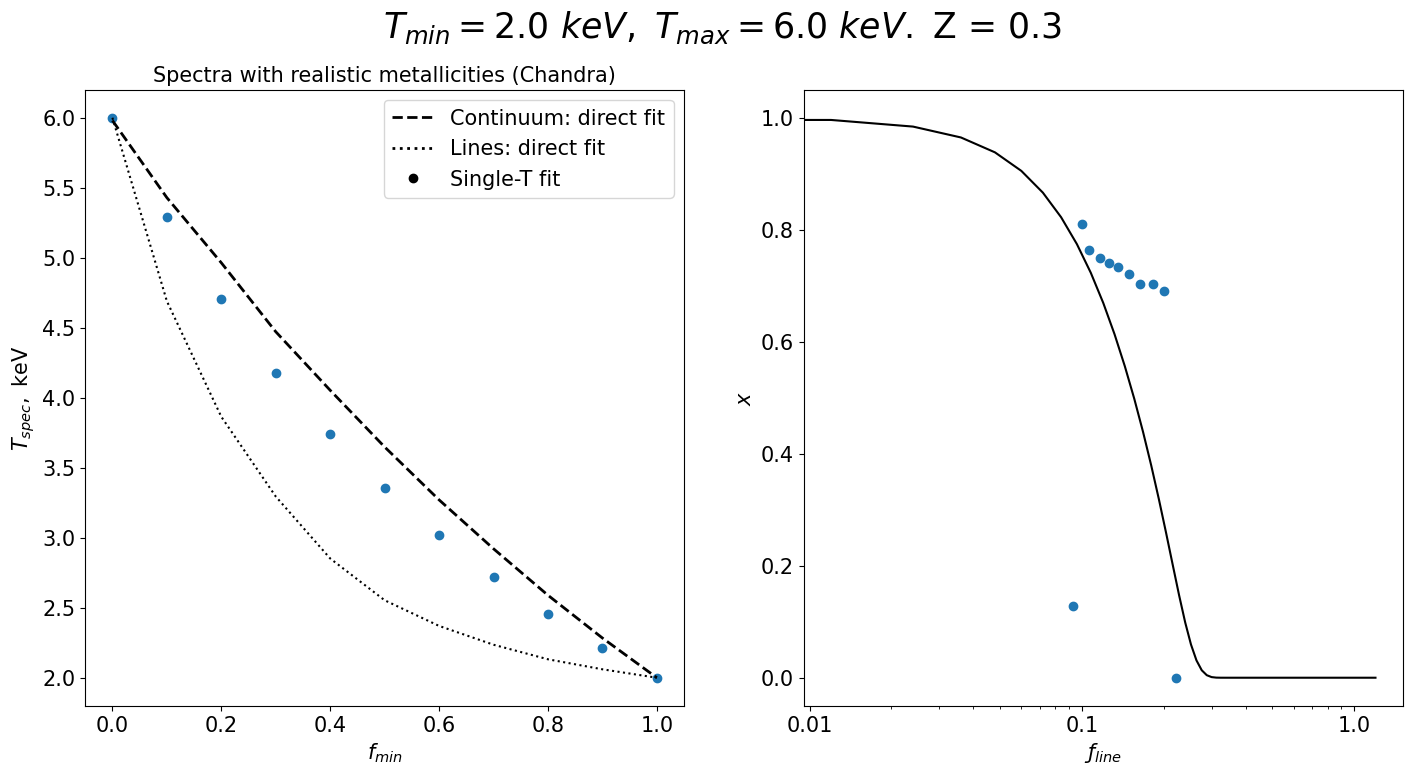

F_cnt + F_lin = F_sum =?= F_fit
1502.61 + 399.46 = 1902.08 =?= 1622.93 ....... f_line = 0.07, x = 2.03
1434.09 + 436.06 = 1870.15 =?= 1555.96 ....... f_line = 0.08, x = 0.87
1370.76 + 455.13 = 1825.89 =?= 1494.91 ....... f_line = 0.08, x = 0.84
1307.06 + 464.15 = 1771.21 =?= 1431.67 ....... f_line = 0.09, x = 0.79
1243.92 + 469.56 = 1713.48 =?= 1371.52 ....... f_line = 0.09, x = 0.78
1181.36 + 473.96 = 1655.33 =?= 1314.03 ....... f_line = 0.10, x = 0.79
1122.64 + 478.12 = 1600.75 =?= 1257.82 ....... f_line = 0.11, x = 0.77
1063.68 + 482.48 = 1546.16 =?= 1201.00 ....... f_line = 0.11, x = 0.74
1007.25 + 487.48 = 1494.73 =?= 1150.73 ....... f_line = 0.12, x = 0.75
952.30 + 492.68 = 1444.98 =?= 1098.73 ....... f_line = 0.13, x = 0.75
900.04 + 498.08 = 1398.11 =?= 1049.57 ....... f_line = 0.14, x = 11268.25


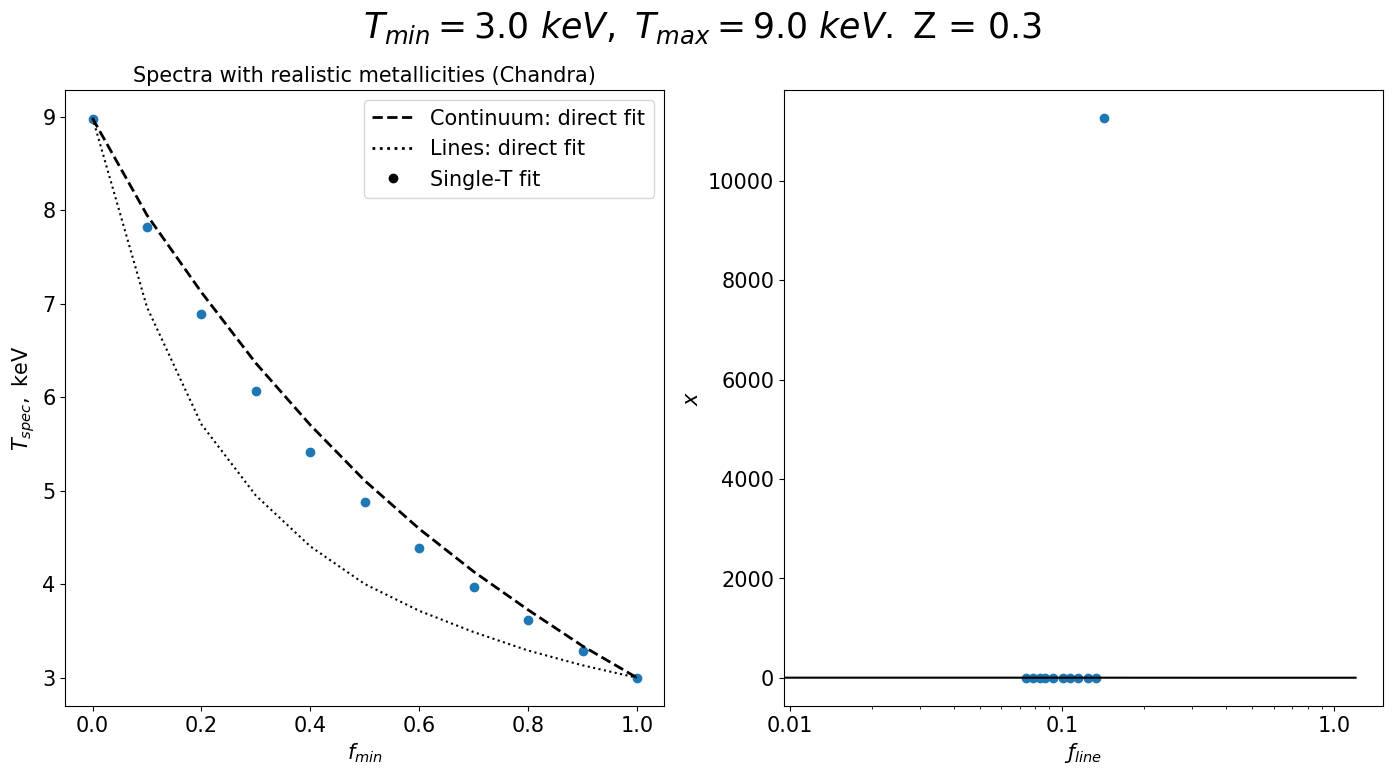

F_cnt + F_lin = F_sum =?= F_fit
650.24 + 622.00 = 1272.23 =?= 837.28 ....... f_line = 0.22, x = 1.33
593.76 + 723.86 = 1317.62 =?= 789.00 ....... f_line = 0.25, x = -0.15
537.52 + 918.25 = 1455.77 =?= 734.89 ....... f_line = 0.27, x = -0.17
481.17 + 2512.96 = 2994.13 =?= 683.42 ....... f_line = 0.30, x = 0.46
425.02 + 2462.45 = 2887.47 =?= 641.23 ....... f_line = 0.34, x = 0.21
368.59 + 2428.63 = 2797.22 =?= 644.25 ....... f_line = 0.43, x = 0.11
312.52 + 2389.04 = 2701.56 =?= 659.65 ....... f_line = 0.53, x = 0.07
256.45 + 2352.62 = 2609.07 =?= 681.98 ....... f_line = 0.62, x = 0.05
201.20 + 2316.34 = 2517.54 =?= 706.12 ....... f_line = 0.72, x = 0.05
150.19 + 2263.29 = 2413.49 =?= 733.37 ....... f_line = 0.80, x = 0.06
108.30 + 2183.13 = 2291.43 =?= 763.16 ....... f_line = 0.86, x = 0.00


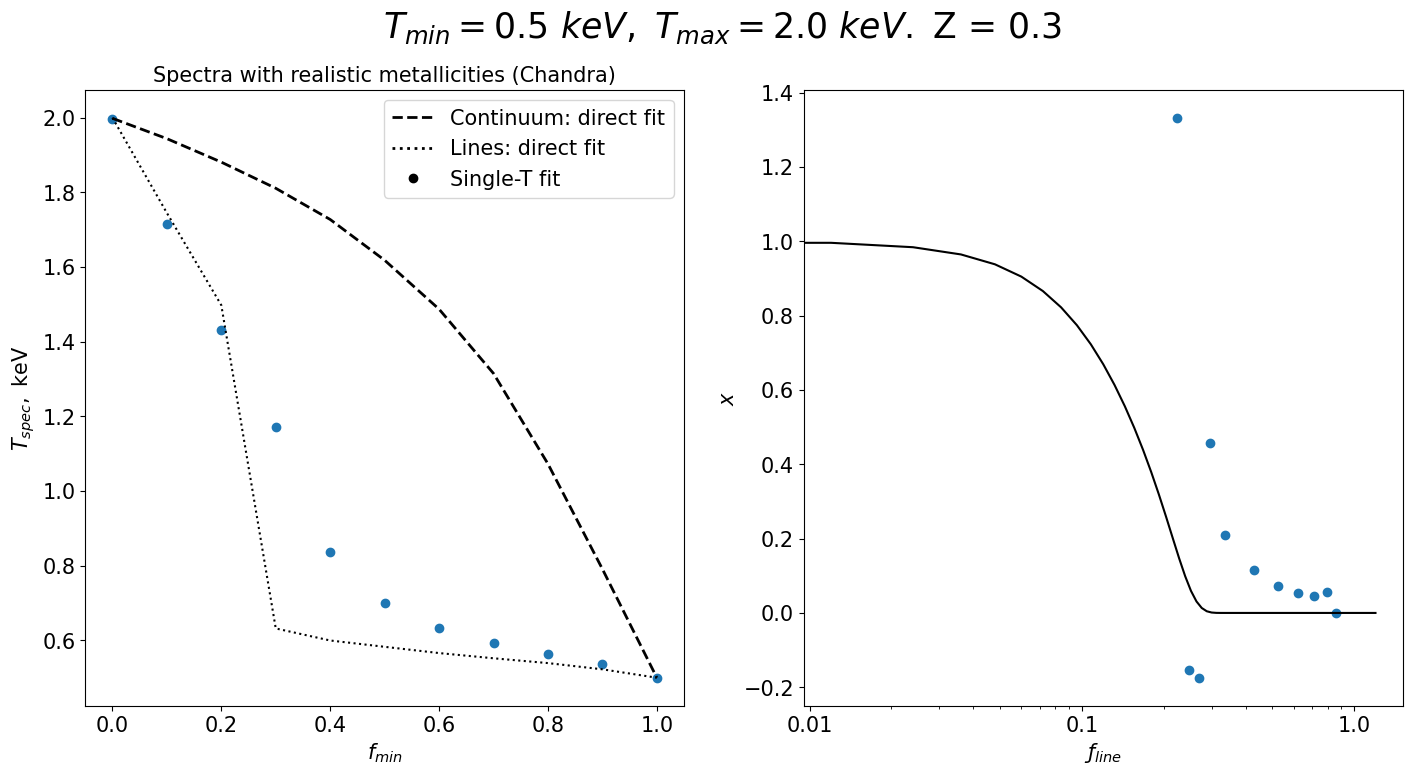

F_cnt + F_lin = F_sum =?= F_fit
1083.03 + 474.01 = 1557.04 =?= 1225.61 ....... f_line = 0.12, x = 0.20
999.41 + 1031.11 = 2030.52 =?= 1152.18 ....... f_line = 0.13, x = 0.80
916.07 + 1639.20 = 2555.27 =?= 1068.12 ....... f_line = 0.14, x = 0.65
832.81 + 1806.14 = 2638.95 =?= 982.51 ....... f_line = 0.15, x = 0.49
750.74 + 1864.39 = 2615.13 =?= 859.22 ....... f_line = 0.13, x = 0.19
669.25 + 1907.56 = 2576.81 =?= 834.45 ....... f_line = 0.20, x = 0.09
588.95 + 1953.10 = 2542.05 =?= 845.02 ....... f_line = 0.30, x = 0.07
512.51 + 1977.19 = 2489.69 =?= 861.73 ....... f_line = 0.41, x = 0.05
439.46 + 1992.92 = 2432.38 =?= 880.96 ....... f_line = 0.50, x = 0.04
371.68 + 2007.32 = 2379.00 =?= 900.42 ....... f_line = 0.59, x = 0.03
311.68 + 2021.07 = 2332.76 =?= 916.60 ....... f_line = 0.66, x = -3.22


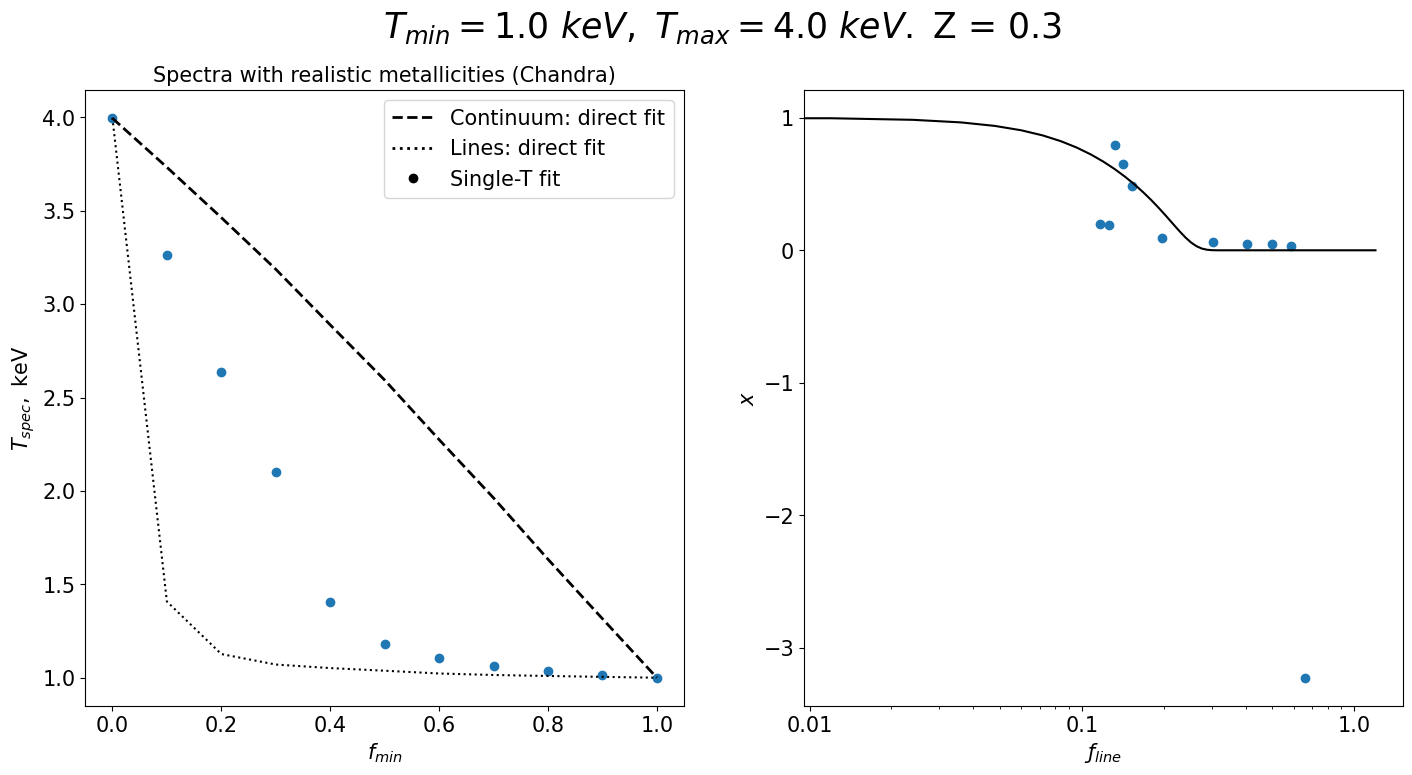

F_cnt + F_lin = F_sum =?= F_fit
1456.24 + 417.90 = 1874.14 =?= 1583.83 ....... f_line = 0.08, x = 0.31
1367.48 + 459.32 = 1826.80 =?= 1493.70 ....... f_line = 0.08, x = 0.80
1275.11 + 472.28 = 1747.39 =?= 1405.97 ....... f_line = 0.09, x = 0.77
1189.42 + 485.30 = 1674.72 =?= 1322.86 ....... f_line = 0.10, x = 0.75
1104.01 + 504.64 = 1608.65 =?= 1243.26 ....... f_line = 0.11, x = 0.73
1019.52 + 527.45 = 1546.97 =?= 1165.64 ....... f_line = 0.13, x = 0.72
940.77 + 549.07 = 1489.85 =?= 1090.93 ....... f_line = 0.14, x = 0.70
861.58 + 570.06 = 1431.64 =?= 1019.65 ....... f_line = 0.16, x = 0.70
787.14 + 589.85 = 1376.99 =?= 954.56 ....... f_line = 0.18, x = 0.68
717.57 + 605.99 = 1323.56 =?= 893.82 ....... f_line = 0.20, x = 0.68
651.44 + 621.72 = 1273.15 =?= 837.53 ....... f_line = 0.22, x = 1.00


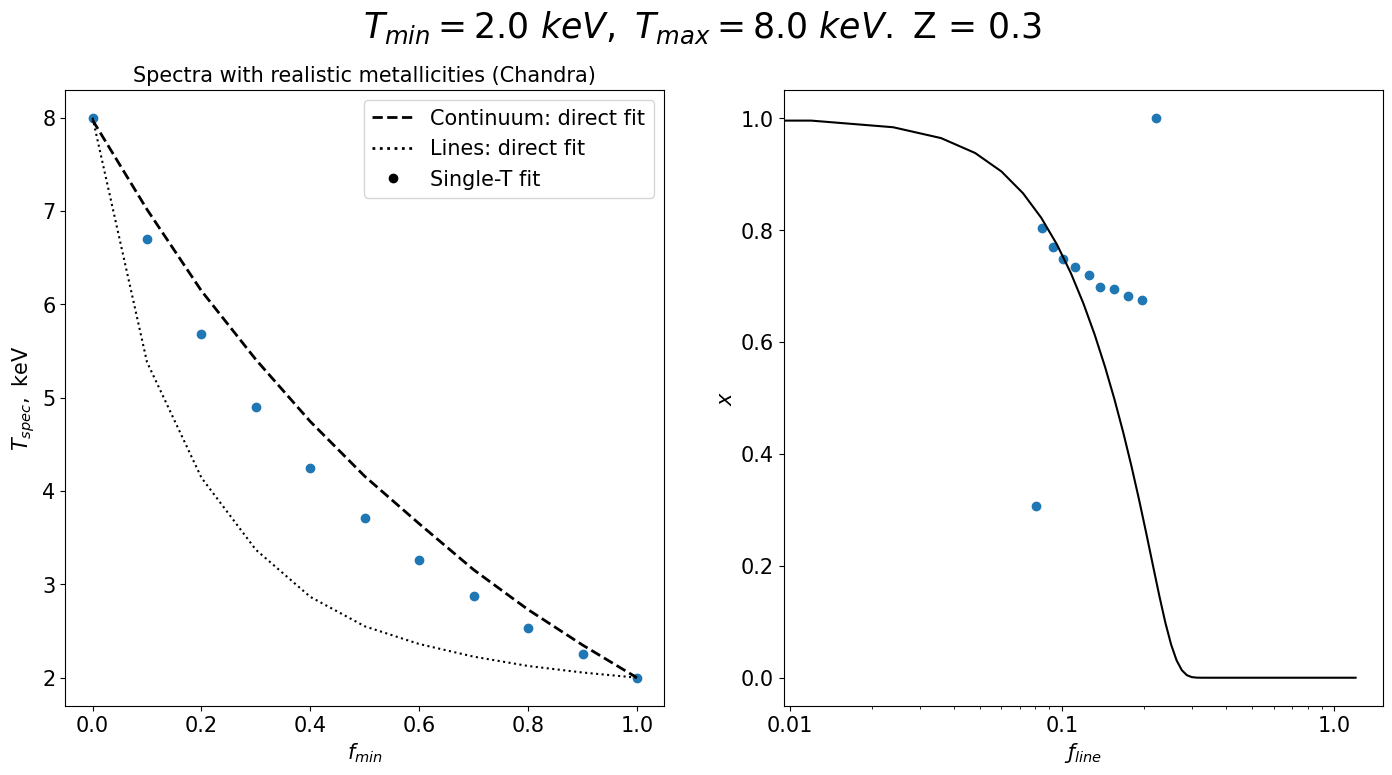

F_cnt + F_lin = F_sum =?= F_fit
1586.42 + 349.43 = 1935.85 =?= 1689.89 ....... f_line = 0.06, x = 1.54
1508.52 + 419.60 = 1928.13 =?= 1616.39 ....... f_line = 0.07, x = 0.89
1432.77 + 452.59 = 1885.35 =?= 1542.41 ....... f_line = 0.07, x = 0.85
1356.90 + 464.61 = 1821.51 =?= 1472.63 ....... f_line = 0.08, x = 0.83
1283.51 + 470.65 = 1754.16 =?= 1402.95 ....... f_line = 0.09, x = 0.80
1213.83 + 474.97 = 1688.81 =?= 1337.66 ....... f_line = 0.09, x = 0.78
1145.90 + 479.29 = 1625.19 =?= 1275.07 ....... f_line = 0.10, x = 0.77
1082.25 + 483.60 = 1565.85 =?= 1215.71 ....... f_line = 0.11, x = 0.74
1017.57 + 488.27 = 1505.84 =?= 1157.61 ....... f_line = 0.12, x = 0.76
958.34 + 493.15 = 1451.49 =?= 1102.55 ....... f_line = 0.13, x = 0.77
898.53 + 498.08 = 1396.61 =?= 1048.06 ....... f_line = 0.14, x = 0.00


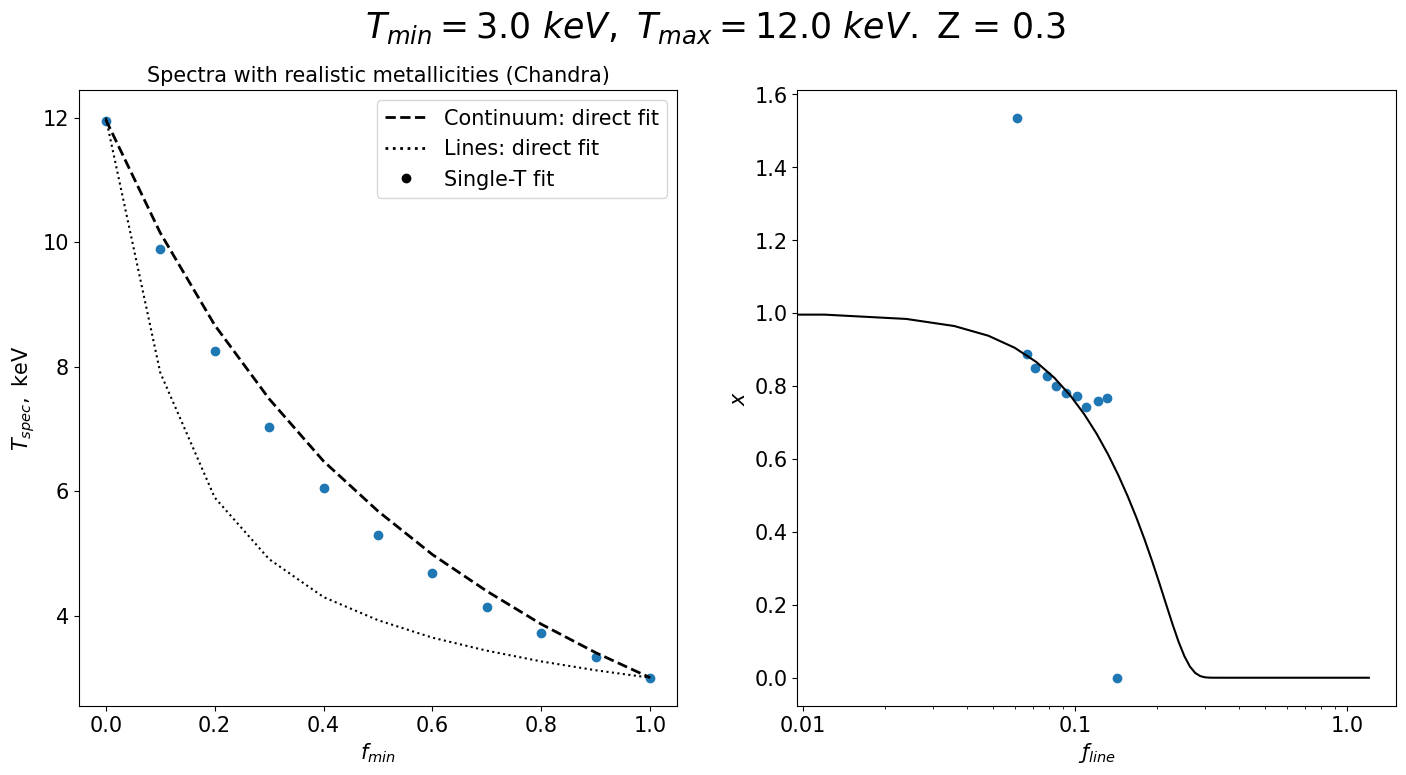

F_cnt + F_lin = F_sum =?= F_fit
310.53 + 2021.23 = 2331.75 =?= 2331.67 ....... f_line = 0.87, x = 0.04
289.71 + 2123.15 = 2412.86 =?= 2304.50 ....... f_line = 0.87, x = -0.40
268.85 + 2209.53 = 2478.38 =?= 2273.26 ....... f_line = 0.88, x = -0.44
247.94 + 2312.84 = 2560.78 =?= 2245.45 ....... f_line = 0.89, x = -0.36
227.43 + 2413.28 = 2640.71 =?= 2226.39 ....... f_line = 0.90, x = -0.33
206.37 + 2497.45 = 2703.83 =?= 2218.67 ....... f_line = 0.91, x = -0.31
186.10 + 2550.25 = 2736.36 =?= 2237.87 ....... f_line = 0.92, x = -0.60
166.39 + 2548.84 = 2715.23 =?= 2252.77 ....... f_line = 0.93, x = -0.20
145.81 + 2488.96 = 2634.76 =?= 2280.45 ....... f_line = 0.94, x = -0.47
126.69 + 2354.59 = 2481.28 =?= 2295.91 ....... f_line = 0.94, x = -0.43
108.14 + 2183.13 = 2291.27 =?= 2290.77 ....... f_line = 0.95, x = 0.00


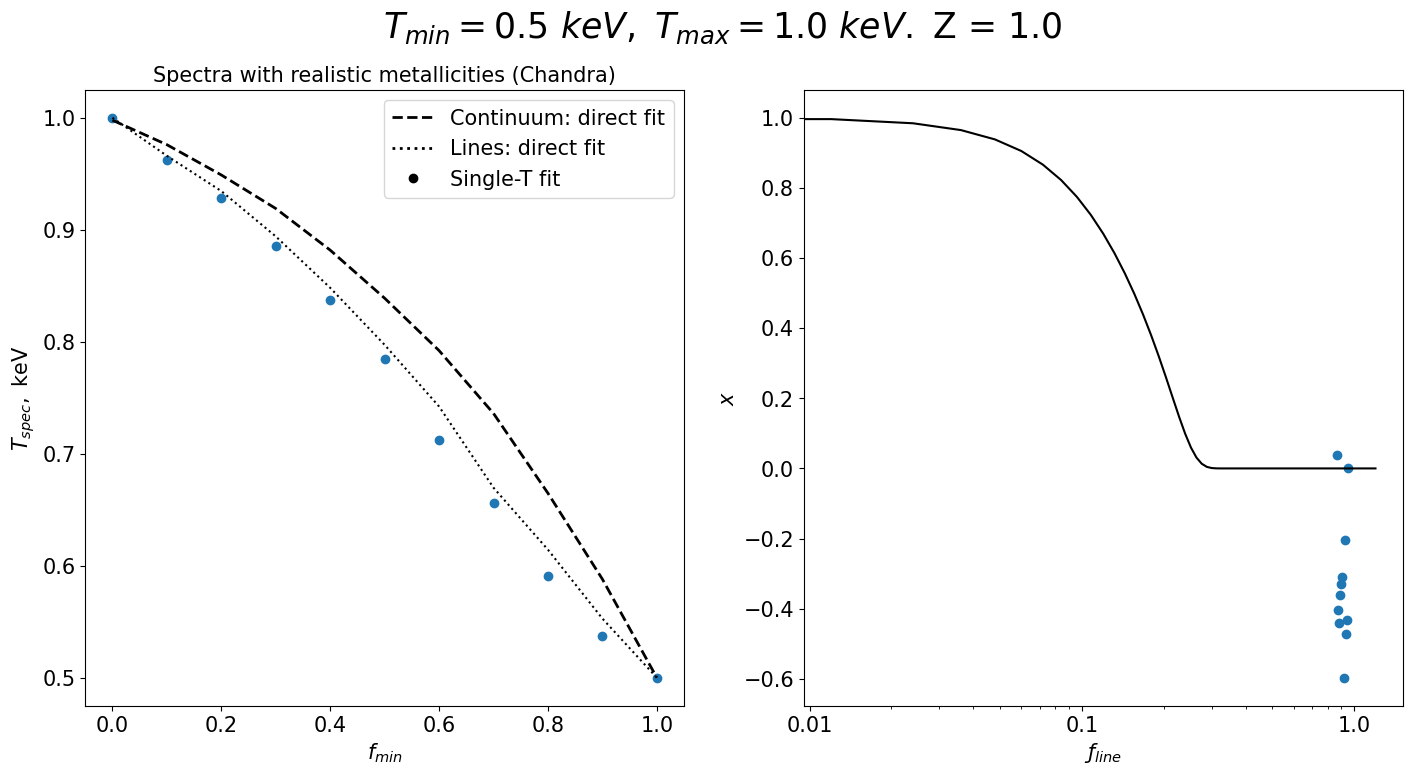

F_cnt + F_lin = F_sum =?= F_fit
650.51 + 621.96 = 1272.47 =?= 1272.50 ....... f_line = 0.49, x = 0.14
614.65 + 850.33 = 1464.99 =?= 1300.18 ....... f_line = 0.53, x = 0.02
579.57 + 1171.30 = 1750.87 =?= 1365.22 ....... f_line = 0.58, x = 0.01
544.72 + 1466.70 = 2011.42 =?= 1458.82 ....... f_line = 0.63, x = 0.00
509.81 + 1650.22 = 2160.03 =?= 1574.19 ....... f_line = 0.68, x = -0.00
474.80 + 1782.57 = 2257.36 =?= 1697.22 ....... f_line = 0.72, x = -0.00
441.22 + 1848.69 = 2289.92 =?= 1822.95 ....... f_line = 0.76, x = -0.01
406.48 + 1902.89 = 2309.37 =?= 1949.95 ....... f_line = 0.79, x = -0.01
374.25 + 1959.57 = 2333.82 =?= 2077.54 ....... f_line = 0.82, x = -0.01
341.98 + 1993.00 = 2334.98 =?= 2206.66 ....... f_line = 0.85, x = -0.01
311.45 + 2021.16 = 2332.60 =?= 2332.19 ....... f_line = 0.87, x = 149.96


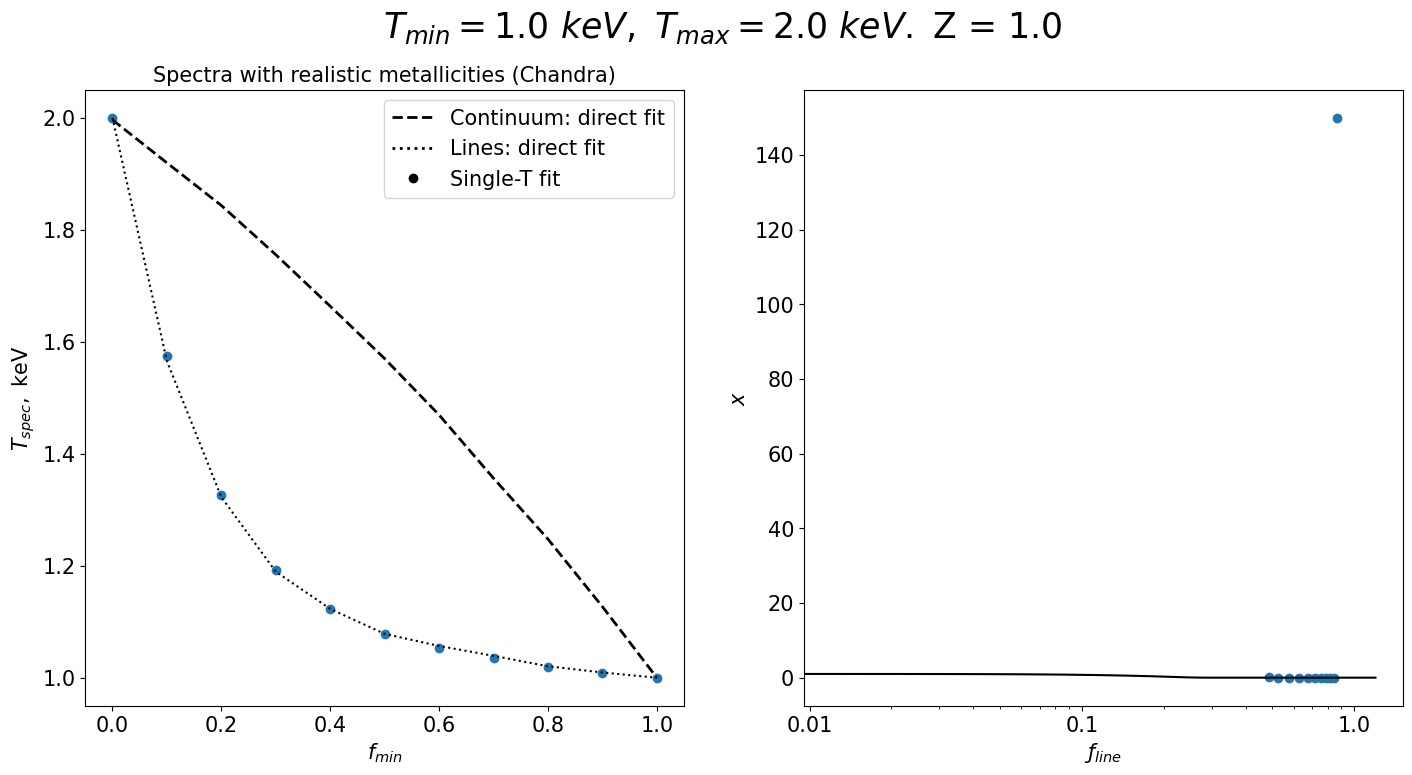

F_cnt + F_lin = F_sum =?= F_fit
1082.71 + 473.99 = 1556.70 =?= 1556.56 ....... f_line = 0.30, x = 3360.42
1037.34 + 481.55 = 1518.89 =?= 1519.91 ....... f_line = 0.32, x = 0.50
990.45 + 491.65 = 1482.10 =?= 1482.61 ....... f_line = 0.33, x = 0.52
947.57 + 505.32 = 1452.89 =?= 1448.55 ....... f_line = 0.35, x = 0.52
901.77 + 520.41 = 1422.18 =?= 1413.34 ....... f_line = 0.36, x = 0.48
857.20 + 536.98 = 1394.18 =?= 1383.11 ....... f_line = 0.38, x = 0.47
814.42 + 554.85 = 1369.27 =?= 1353.31 ....... f_line = 0.40, x = 0.44
772.72 + 573.01 = 1345.73 =?= 1329.47 ....... f_line = 0.42, x = 0.42
731.04 + 590.77 = 1321.81 =?= 1307.74 ....... f_line = 0.44, x = 0.41
689.67 + 606.40 = 1296.06 =?= 1288.96 ....... f_line = 0.46, x = 0.39
651.04 + 621.84 = 1272.88 =?= 1273.21 ....... f_line = 0.49, x = 1.01


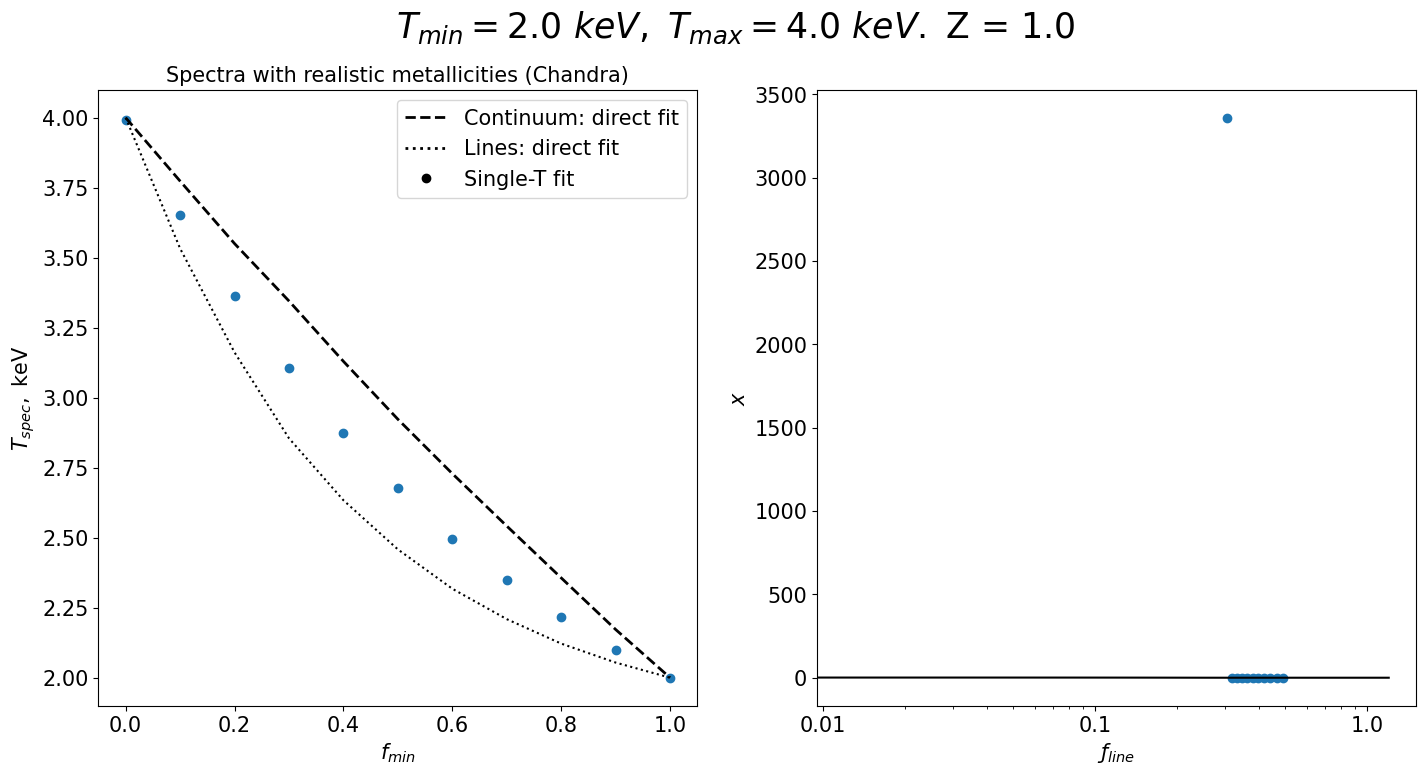

F_cnt + F_lin = F_sum =?= F_fit
1321.48 + 451.15 = 1772.62 =?= 1774.14 ....... f_line = 0.26, x = 47.59
1275.54 + 459.54 = 1735.08 =?= 1733.00 ....... f_line = 0.26, x = 0.62
1232.63 + 465.01 = 1697.64 =?= 1687.58 ....... f_line = 0.27, x = 0.49
1188.09 + 468.99 = 1657.08 =?= 1648.40 ....... f_line = 0.28, x = 0.50
1144.87 + 472.33 = 1617.20 =?= 1609.36 ....... f_line = 0.29, x = 0.50
1102.76 + 475.77 = 1578.53 =?= 1568.80 ....... f_line = 0.30, x = 0.47
1059.92 + 479.52 = 1539.44 =?= 1533.30 ....... f_line = 0.31, x = 0.49
1018.06 + 483.62 = 1501.68 =?= 1497.94 ....... f_line = 0.32, x = 0.50
979.24 + 488.02 = 1467.27 =?= 1460.71 ....... f_line = 0.33, x = 0.43
938.83 + 492.81 = 1431.64 =?= 1428.24 ....... f_line = 0.34, x = 0.42
900.84 + 498.08 = 1398.92 =?= 1396.92 ....... f_line = 0.36, x = 1489.32


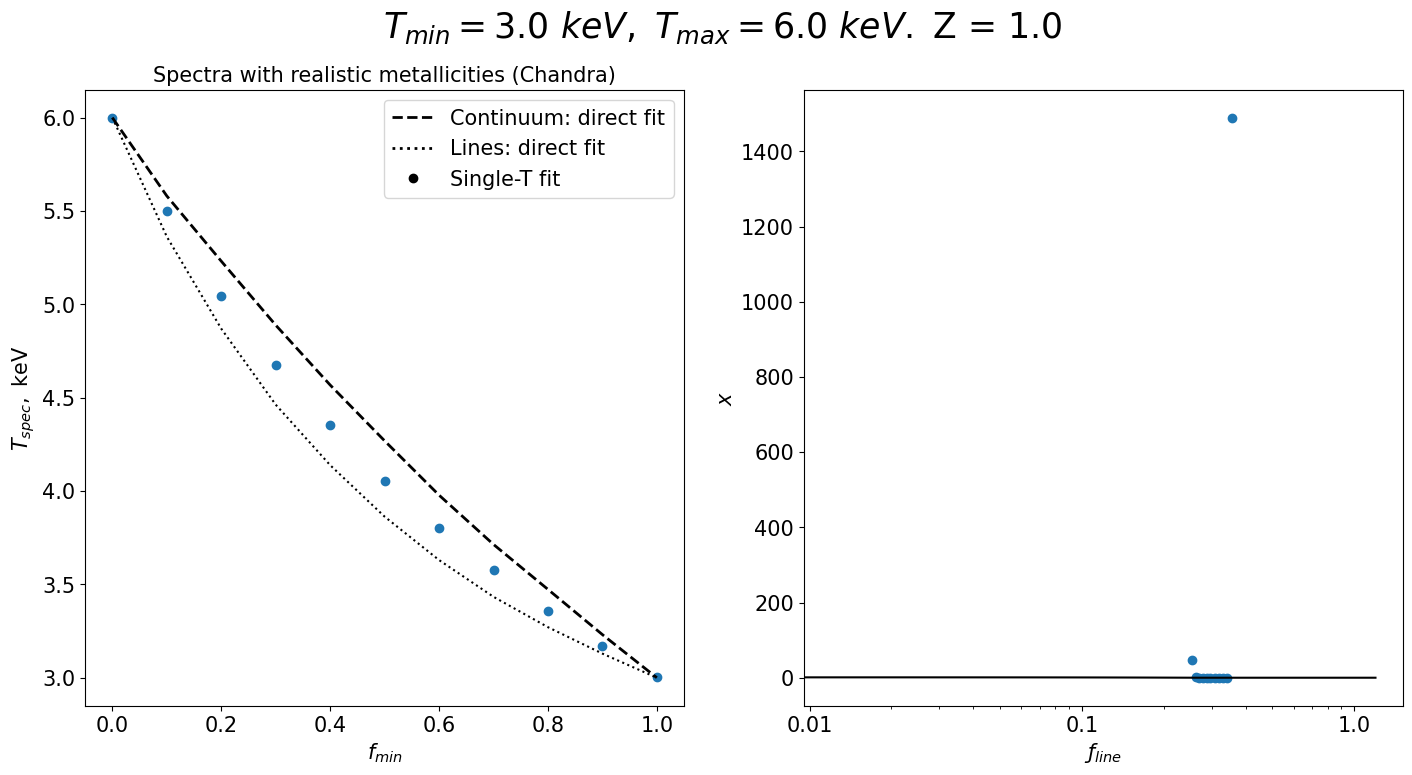

F_cnt + F_lin = F_sum =?= F_fit
493.81 + 915.73 = 1409.54 =?= 1408.64 ....... f_line = 0.65, x = 0.17
453.76 + 1054.01 = 1507.77 =?= 1426.52 ....... f_line = 0.68, x = -0.82
414.67 + 1259.71 = 1674.38 =?= 1427.36 ....... f_line = 0.71, x = -0.69
374.05 + 1477.85 = 1851.91 =?= 1462.06 ....... f_line = 0.74, x = -1.44
334.89 + 2546.52 = 2881.41 =?= 1576.29 ....... f_line = 0.79, x = -0.15
294.62 + 2541.26 = 2835.87 =?= 1693.48 ....... f_line = 0.83, x = -0.10
254.52 + 2484.72 = 2739.25 =?= 1810.53 ....... f_line = 0.86, x = -0.08
214.85 + 2421.89 = 2636.74 =?= 1931.02 ....... f_line = 0.89, x = -0.07
176.57 + 2355.65 = 2532.23 =?= 2052.18 ....... f_line = 0.91, x = -0.07
140.41 + 2285.25 = 2425.66 =?= 2171.32 ....... f_line = 0.94, x = -0.07
108.17 + 2183.33 = 2291.51 =?= 2292.06 ....... f_line = 0.95, x = 1.03


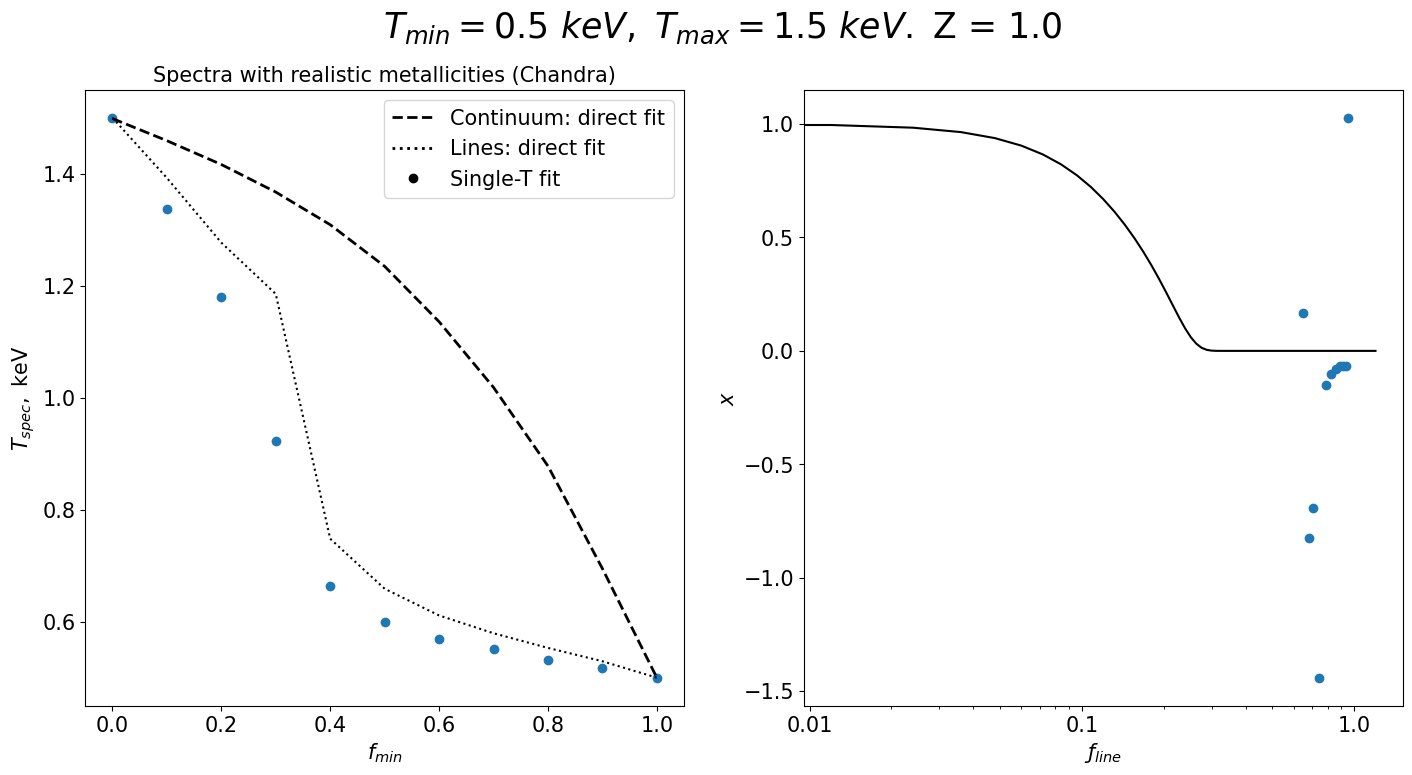

F_cnt + F_lin = F_sum =?= F_fit
899.10 + 498.08 = 1397.18 =?= 1396.70 ....... f_line = 0.36, x = 0.00
836.04 + 831.56 = 1667.60 =?= 1335.19 ....... f_line = 0.37, x = 0.40
773.06 + 1453.05 = 2226.10 =?= 1280.45 ....... f_line = 0.40, x = 0.13
710.60 + 1674.59 = 2385.19 =?= 1365.73 ....... f_line = 0.48, x = 0.04
649.12 + 1813.86 = 2462.97 =?= 1493.19 ....... f_line = 0.57, x = 0.03
588.02 + 1867.85 = 2455.87 =?= 1630.84 ....... f_line = 0.64, x = 0.01
527.72 + 1912.07 = 2439.79 =?= 1770.56 ....... f_line = 0.70, x = 0.01
469.53 + 1959.80 = 2429.33 =?= 1912.30 ....... f_line = 0.75, x = 0.00
413.09 + 1984.55 = 2397.64 =?= 2055.00 ....... f_line = 0.80, x = 0.00
360.34 + 2003.13 = 2363.47 =?= 2195.63 ....... f_line = 0.84, x = 0.00
311.08 + 2021.11 = 2332.19 =?= 2331.56 ....... f_line = 0.87, x = 1.03


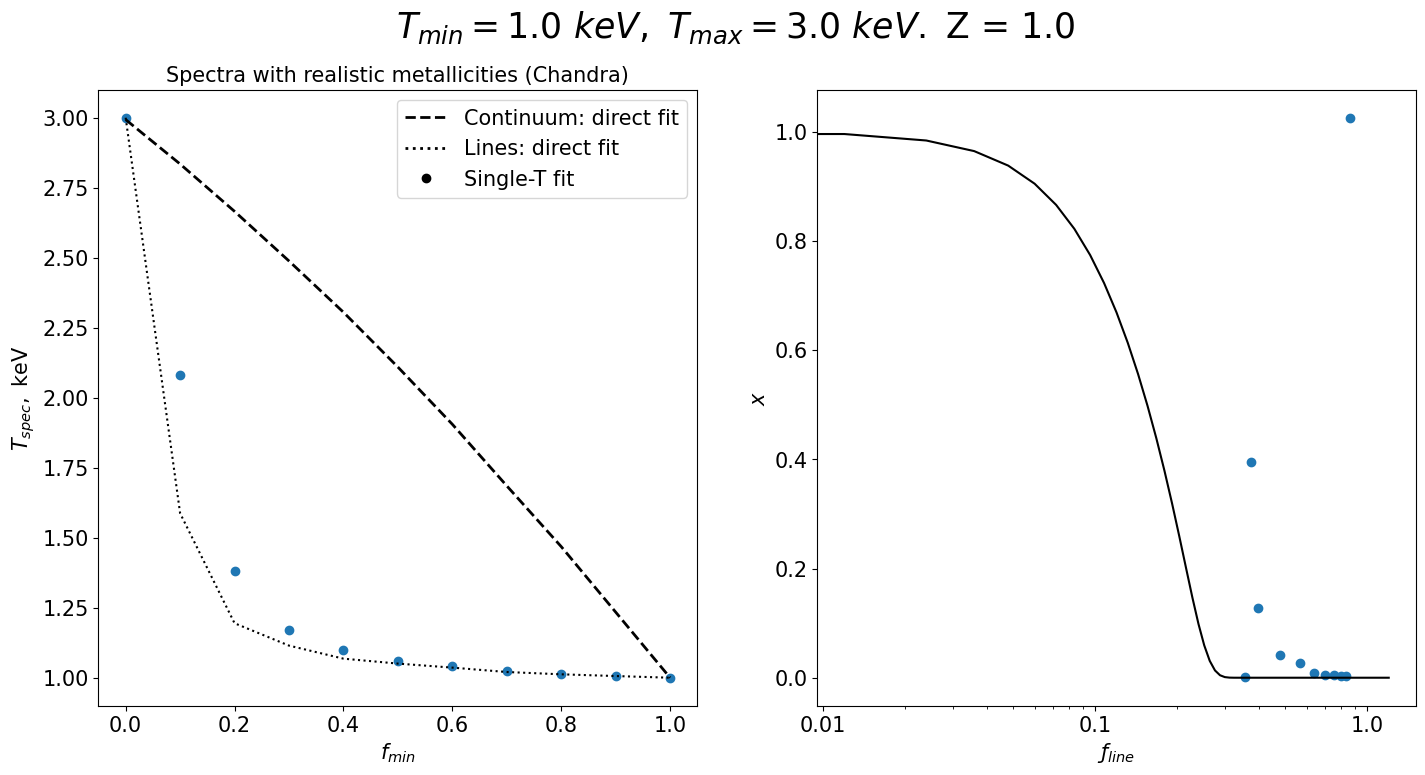

F_cnt + F_lin = F_sum =?= F_fit
1322.44 + 451.16 = 1773.61 =?= 1770.96 ....... f_line = 0.25, x = 2.29
1247.92 + 466.79 = 1714.72 =?= 1702.55 ....... f_line = 0.27, x = 0.48
1176.90 + 475.80 = 1652.70 =?= 1641.09 ....... f_line = 0.28, x = 0.48
1102.21 + 487.39 = 1589.60 =?= 1576.13 ....... f_line = 0.30, x = 0.46
1031.76 + 505.63 = 1537.39 =?= 1515.54 ....... f_line = 0.32, x = 0.47
963.90 + 527.46 = 1491.36 =?= 1463.69 ....... f_line = 0.34, x = 0.48
897.14 + 548.01 = 1445.14 =?= 1412.39 ....... f_line = 0.36, x = 0.44
830.67 + 568.63 = 1399.30 =?= 1366.08 ....... f_line = 0.39, x = 0.41
769.15 + 588.47 = 1357.61 =?= 1331.14 ....... f_line = 0.42, x = 0.40
708.51 + 604.84 = 1313.35 =?= 1297.70 ....... f_line = 0.45, x = 0.34
651.68 + 621.75 = 1273.43 =?= 1272.65 ....... f_line = 0.49, x = 0.42


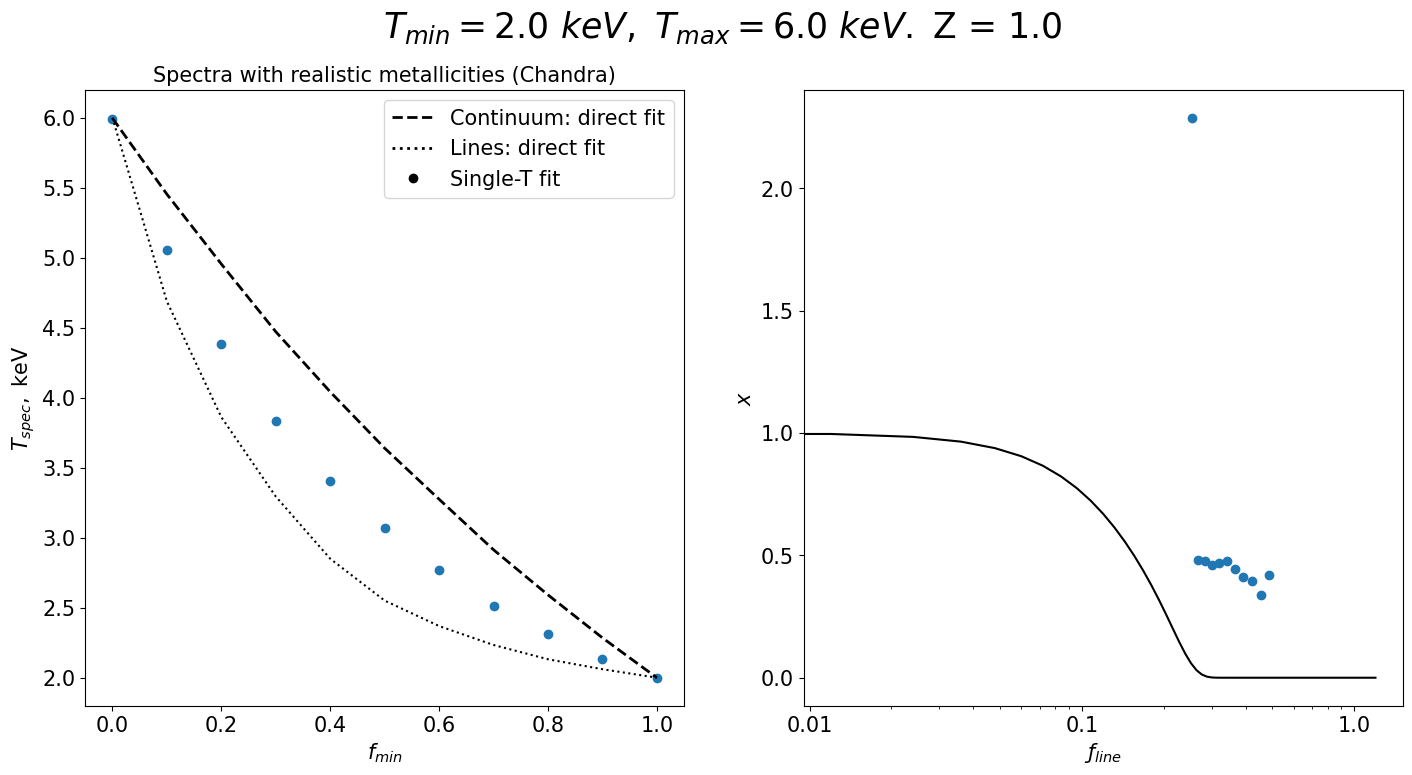

F_cnt + F_lin = F_sum =?= F_fit
1503.13 + 399.35 = 1902.49 =?= 1903.39 ....... f_line = 0.21, x = 0.30
1434.65 + 436.19 = 1870.84 =?= 1838.25 ....... f_line = 0.22, x = 0.62
1369.17 + 455.18 = 1824.34 =?= 1779.64 ....... f_line = 0.23, x = 0.58
1305.76 + 464.20 = 1769.96 =?= 1719.69 ....... f_line = 0.24, x = 0.52
1242.20 + 469.54 = 1711.73 =?= 1665.75 ....... f_line = 0.25, x = 0.50
1181.21 + 473.88 = 1655.08 =?= 1612.81 ....... f_line = 0.27, x = 0.48
1121.20 + 478.11 = 1599.31 =?= 1568.48 ....... f_line = 0.29, x = 0.48
1062.99 + 482.63 = 1545.62 =?= 1520.93 ....... f_line = 0.30, x = 0.46
1006.97 + 487.38 = 1494.36 =?= 1478.19 ....... f_line = 0.32, x = 0.44
952.06 + 492.66 = 1444.72 =?= 1437.58 ....... f_line = 0.34, x = 0.46
899.26 + 498.08 = 1397.34 =?= 1397.47 ....... f_line = 0.36, x = 0.00


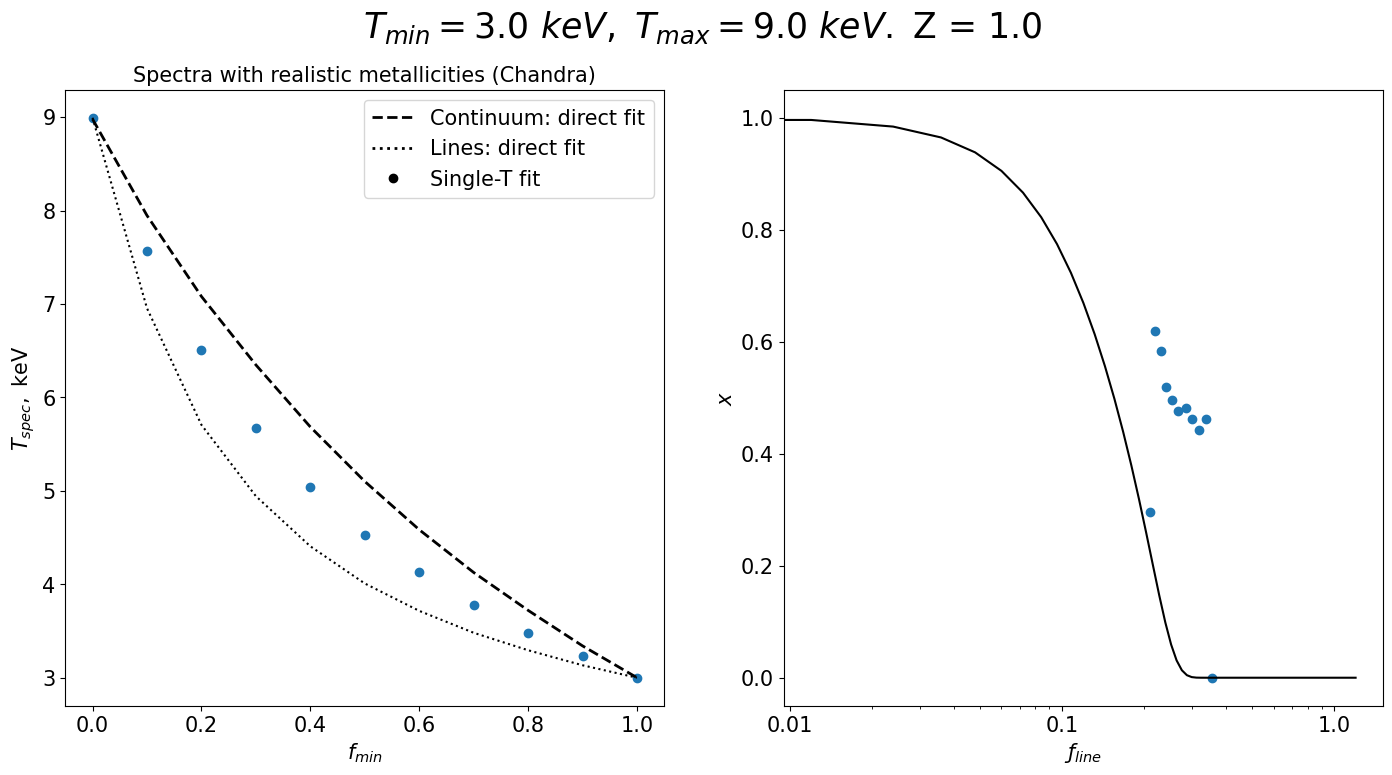

F_cnt + F_lin = F_sum =?= F_fit
650.33 + 621.90 = 1272.24 =?= 1272.14 ....... f_line = 0.49, x = 0.17
594.42 + 723.75 = 1318.17 =?= 1246.81 ....... f_line = 0.52, x = -0.81
537.23 + 918.04 = 1455.27 =?= 1217.51 ....... f_line = 0.56, x = -0.71
481.77 + 2512.82 = 2994.59 =?= 1258.64 ....... f_line = 0.62, x = 0.06
425.27 + 2462.63 = 2887.90 =?= 1389.05 ....... f_line = 0.69, x = 0.02
368.43 + 2428.78 = 2797.21 =?= 1531.67 ....... f_line = 0.76, x = 0.00
311.82 + 2388.90 = 2700.71 =?= 1679.07 ....... f_line = 0.81, x = -0.00
256.08 + 2352.66 = 2608.74 =?= 1830.78 ....... f_line = 0.86, x = -0.01
200.87 + 2316.95 = 2517.82 =?= 1981.48 ....... f_line = 0.90, x = -0.02
149.83 + 2262.37 = 2412.20 =?= 2135.37 ....... f_line = 0.93, x = -0.02
108.19 + 2183.13 = 2291.33 =?= 2290.86 ....... f_line = 0.95, x = 1069.44


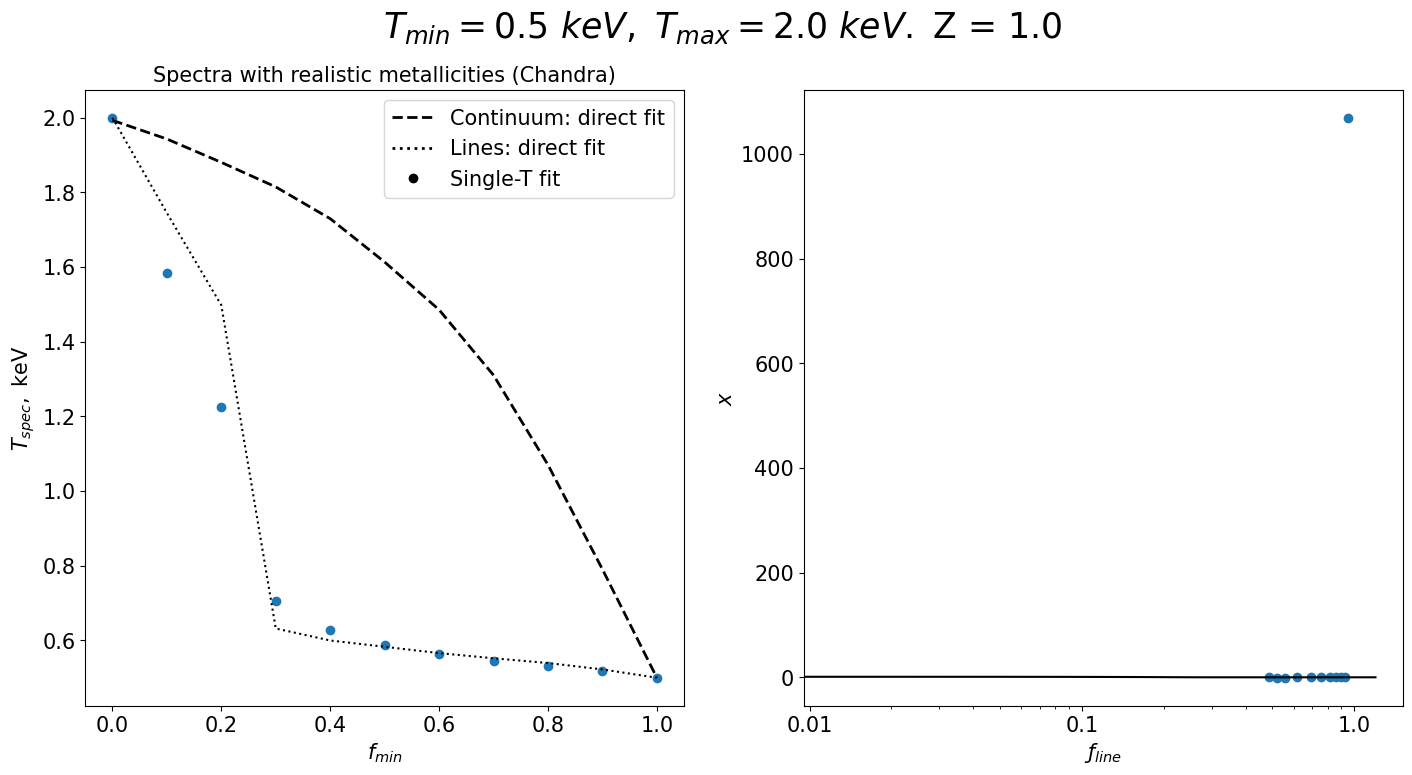

F_cnt + F_lin = F_sum =?= F_fit
1083.49 + 474.01 = 1557.50 =?= 1557.79 ....... f_line = 0.30, x = -15.00
999.40 + 1031.65 = 2031.05 =?= 1449.73 ....... f_line = 0.31, x = 0.54
915.51 + 1638.66 = 2554.18 =?= 1251.04 ....... f_line = 0.27, x = 0.12
832.62 + 1806.84 = 2639.46 =?= 1329.68 ....... f_line = 0.37, x = 0.04
750.97 + 1863.89 = 2614.87 =?= 1461.88 ....... f_line = 0.49, x = 0.02
669.31 + 1906.85 = 2576.16 =?= 1606.96 ....... f_line = 0.58, x = 0.01
588.69 + 1953.26 = 2541.94 =?= 1752.56 ....... f_line = 0.66, x = 0.01
512.30 + 1977.53 = 2489.83 =?= 1899.11 ....... f_line = 0.73, x = 0.01
438.94 + 1993.03 = 2431.97 =?= 2046.65 ....... f_line = 0.79, x = 0.00
371.52 + 2007.51 = 2379.03 =?= 2190.94 ....... f_line = 0.83, x = 0.00
310.81 + 2021.16 = 2331.96 =?= 2331.91 ....... f_line = 0.87, x = 0.00


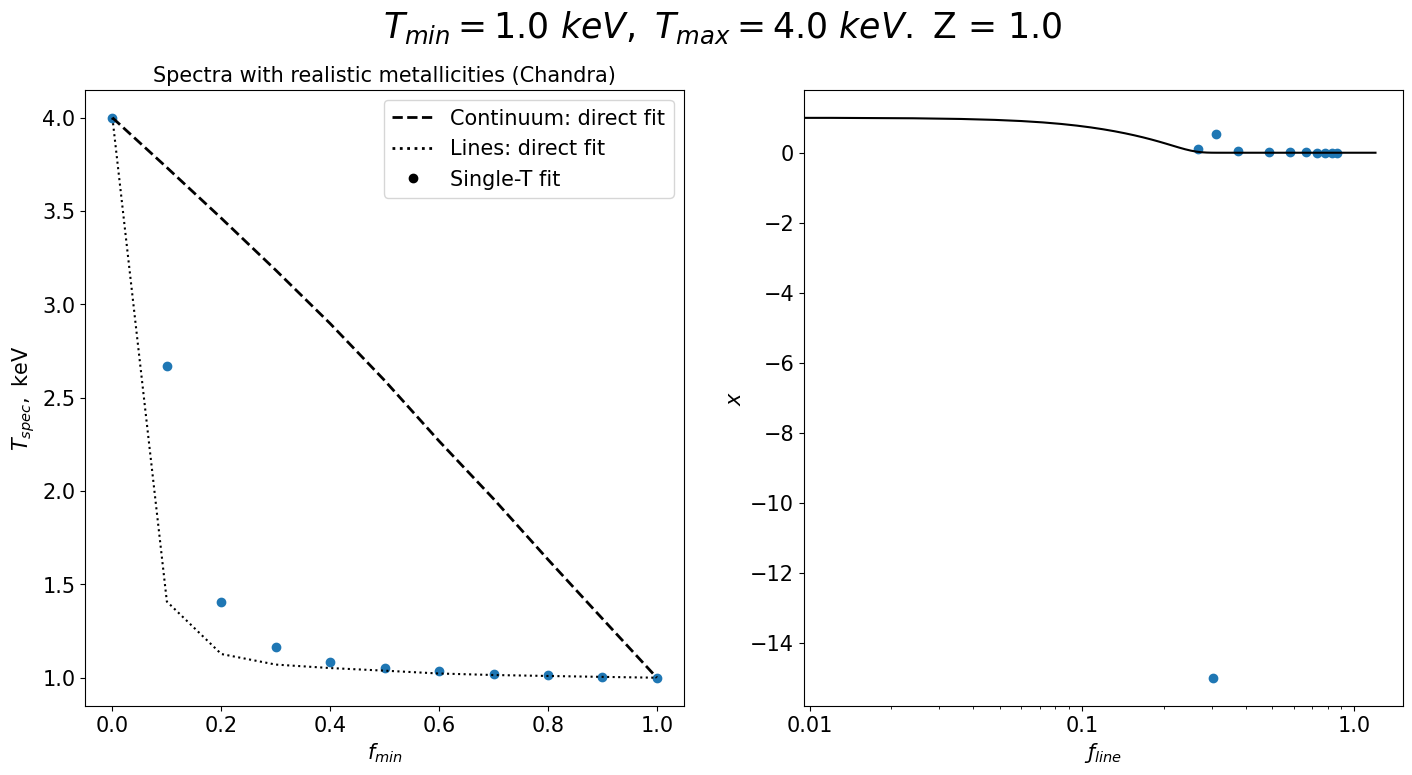

F_cnt + F_lin = F_sum =?= F_fit
1459.13 + 417.90 = 1877.02 =?= 1875.87 ....... f_line = 0.22, x = 18.72
1368.13 + 459.26 = 1827.39 =?= 1788.54 ....... f_line = 0.24, x = 0.52
1276.73 + 472.35 = 1749.08 =?= 1699.44 ....... f_line = 0.25, x = 0.46
1189.83 + 485.21 = 1675.04 =?= 1622.94 ....... f_line = 0.27, x = 0.44
1103.93 + 504.59 = 1608.52 =?= 1554.06 ....... f_line = 0.29, x = 0.44
1020.15 + 527.64 = 1547.79 =?= 1490.54 ....... f_line = 0.32, x = 0.44
939.58 + 549.40 = 1488.98 =?= 1428.43 ....... f_line = 0.34, x = 0.41
861.55 + 569.95 = 1431.50 =?= 1381.59 ....... f_line = 0.38, x = 0.40
788.90 + 589.53 = 1378.44 =?= 1336.17 ....... f_line = 0.41, x = 0.37
717.33 + 605.92 = 1323.25 =?= 1300.45 ....... f_line = 0.45, x = 0.33
651.81 + 621.81 = 1273.63 =?= 1273.16 ....... f_line = 0.49, x = 1.00


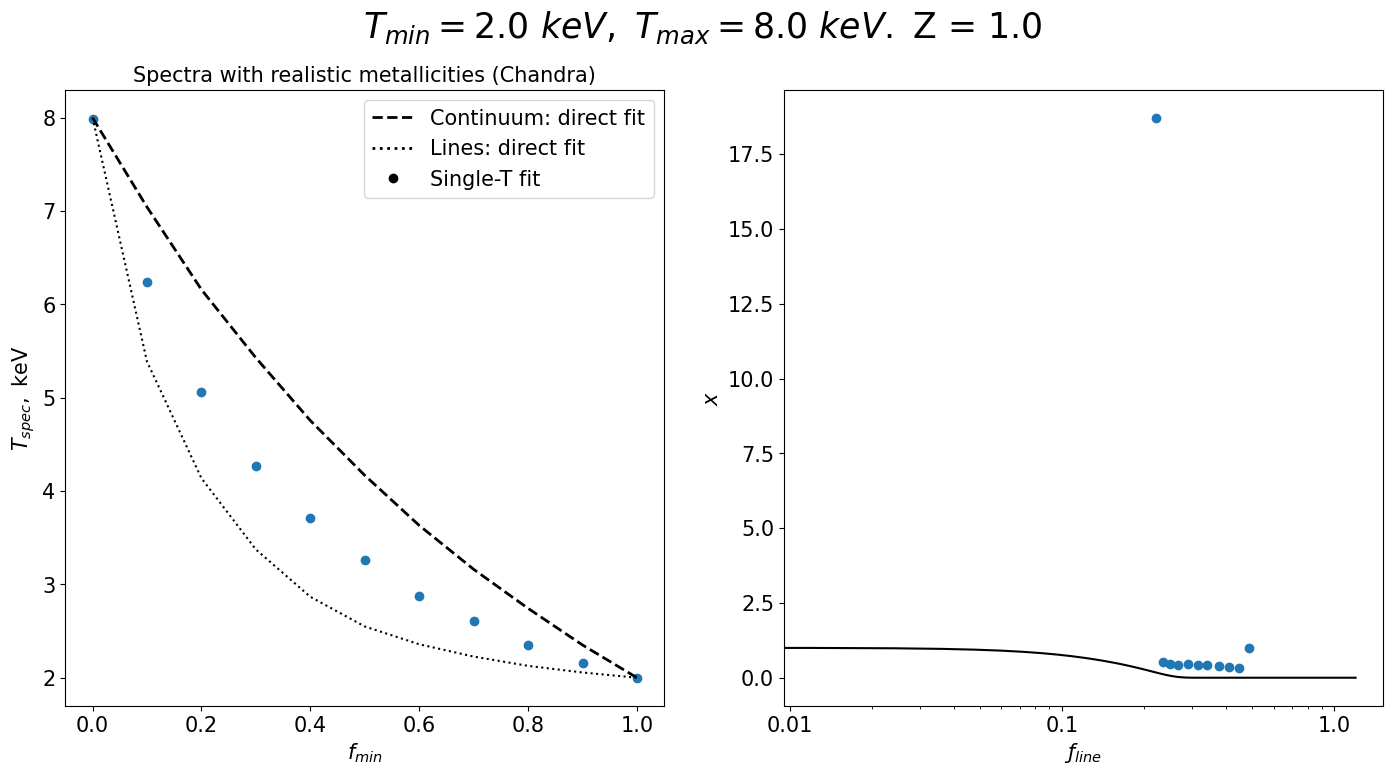

F_cnt + F_lin = F_sum =?= F_fit
1586.12 + 349.43 = 1935.55 =?= 1935.87 ....... f_line = 0.18, x = 1.37
1508.11 + 419.67 = 1927.78 =?= 1865.07 ....... f_line = 0.19, x = 0.68
1433.65 + 452.42 = 1886.07 =?= 1793.39 ....... f_line = 0.20, x = 0.59
1358.50 + 464.53 = 1823.02 =?= 1728.87 ....... f_line = 0.21, x = 0.55
1284.76 + 470.68 = 1755.44 =?= 1668.79 ....... f_line = 0.23, x = 0.51
1214.46 + 474.93 = 1689.39 =?= 1615.20 ....... f_line = 0.25, x = 0.48
1146.97 + 479.25 = 1626.22 =?= 1566.32 ....... f_line = 0.27, x = 0.45
1081.26 + 483.60 = 1564.86 =?= 1519.02 ....... f_line = 0.29, x = 0.45
1019.77 + 488.21 = 1507.98 =?= 1479.42 ....... f_line = 0.31, x = 0.44
956.94 + 493.13 = 1450.07 =?= 1438.86 ....... f_line = 0.33, x = 0.47
899.49 + 497.99 = 1397.47 =?= 1397.72 ....... f_line = 0.36, x = 0.78


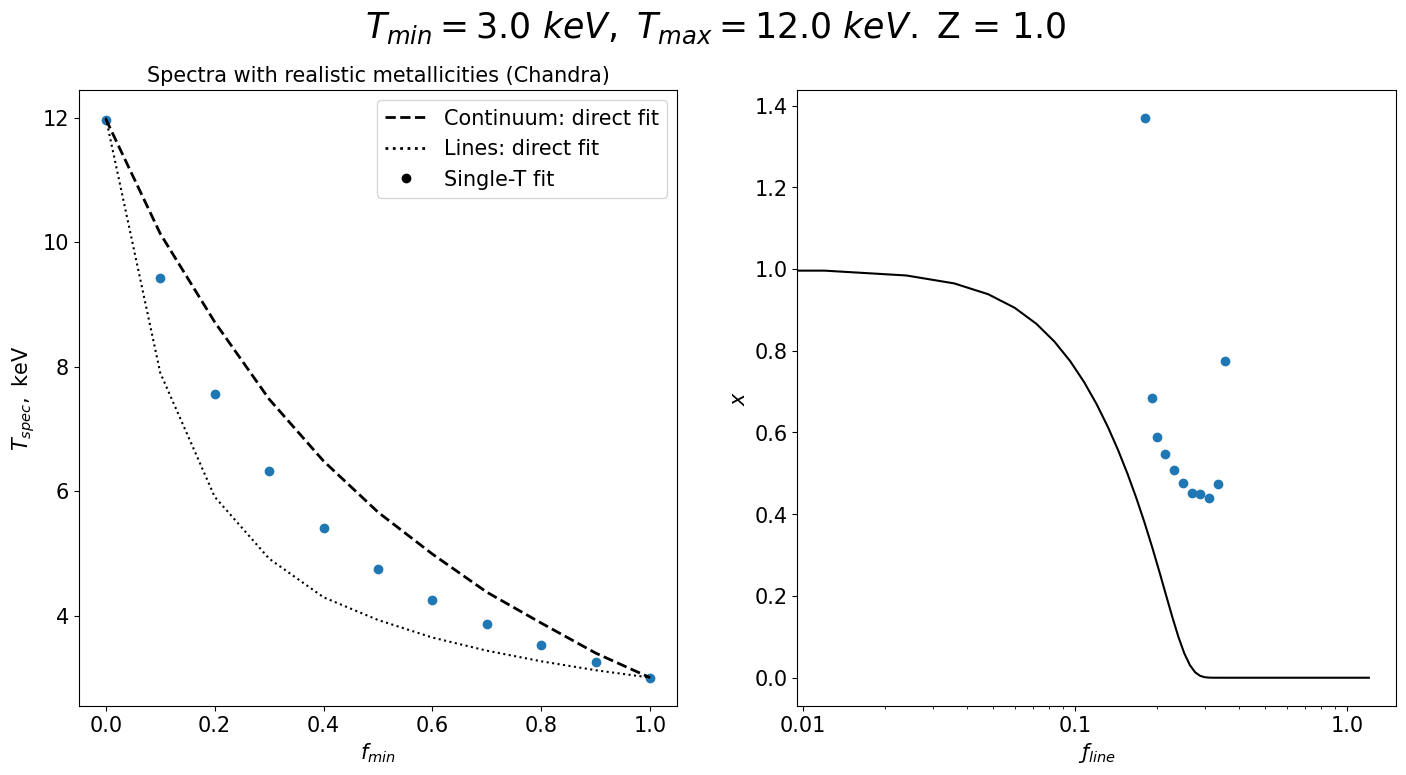

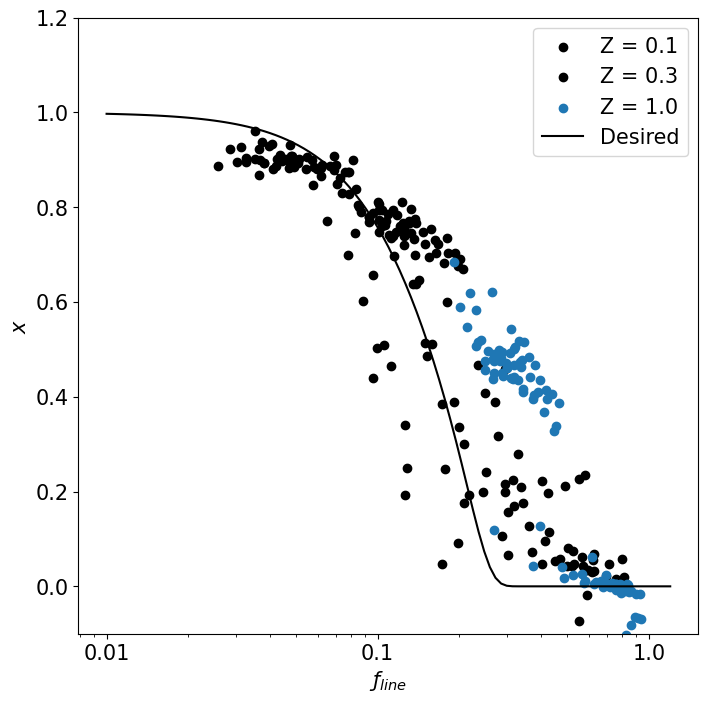

In [324]:
iks_all = []
fline_all = []

for metallicity in metallicities:

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        name_key = str(metallicity)+': '+str(T_min)+'-'+str(T_max)
         
        Tspec_list1 = Tspec_cont_f6[name_key]  # continuum
        Tspec_list2 = single_T_fit_f6[name_key] # realistic metallicities
        Tspec_list3 = Tspec_lines_f6[name_key]  # line-dominated

        num_iks = [tsp - tli for tsp, tli in zip(Tspec_list2, Tspec_list3)]
        denom_iks = [tco - tli for tco, tli in zip(Tspec_list1, Tspec_list3)]
                
        for i in range(0, len(denom_iks)):
            if denom_iks[i] == 0:
                denom_iks[i] = 0.00001
        
        #if 0.0 in denom_iks:
        #    denom_iks[np.index(0.0)] = 0.00001
         
        #denom_iks[np.where(denom_iks == 0.0)] = 0.00002
        
        #print(denom_iks)
        iks = [numx/denomx for numx, denomx in zip(num_iks, denom_iks)]

        Flux_list1 = Flux_cont_f6[name_key] # continuum
        Flux_list2 = Flux_fit_f6[name_key] # realistic metallicities
        Flux_list3 = Flux_lines_f6[name_key] # line-dominated
        
        #Flux_list2 = [a/metallicity for a in Flux_fit_f6[name_key]] 
        #Flux_list3 = [a/metallicity for a in Flux_lines_f6[name_key]]

        #num_fline = Flux_list3
        #denom_fline = [Fli + Fco for Fli, Fco in zip(Flux_list3, Flux_list1)]
        #denom_fline1 = Flux_list2
        #fline = [numf/denomf for numf, denomf in zip(num_fline, denom_fline)]

        #fline = [Fli/(Fli + Fco) for Fli, Fco in zip(Flux_list3, Flux_list1)]
        
        fline = [1-Fco/Fsum for Fco, Fsum in zip(Flux_list1, Flux_list2)]
        
        #fline = [1-Fco/(Fco+Fli) for Fco, Fli in zip(Flux_list1, Flux_list3)]
        
        
        iks_all.append(iks[1:-1])
        fline_all.append(fline[1:-1])

        a=1
        
        if a==1:
            
            plt.figure(figsize=(17,8))
            plt.suptitle(f'$T_{{min}}={T_min} \ keV, \ T_{{max}}={T_max} \ keV.$ Z = '+str(metallicity)+'\n \n', fontsize = 25)

            plt.subplot(1,2,1)
            # continuum
            plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
            # realistic metallicities
            plt.scatter(f_min, Tspec_list2)#, color='black')
            # line-dominated
            plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
        
            print('F_cnt + F_lin = F_sum =?= F_fit')
            for i in range(0, len(f_min)):
                print(f'{Flux_list1[i]*10**12:.2f} + {Flux_list3[i]*10**12:.2f} = {Flux_list1[i]*10**12 + Flux_list3[i]*10**12:.2f} =?= {Flux_list2[i]*10**12:.2f} ....... f_line = {fline[i]:.2f}, x = {iks[i]:.2f}')

            handles, labels = plt.gca().get_legend_handles_labels()
            line_n = Line2D([], [], label='Continuum: direct fit', color='black', linestyle='--', linewidth=2)
            line_e = Line2D([], [], label='Lines: direct fit', color='black', linestyle=':', linewidth=2)
            dots_f = Line2D([], [], label='Single-T fit', color='black', marker='.', linestyle='None', markersize=12)
            handles.extend([line_n, line_e, dots_f])
            plt.legend(handles=handles, fontsize=15)

            #plt.ylim(0, 12.1)
            plt.xticks(size=15)
            plt.yticks(size=15)
            plt.xlabel('$f_{min}$', fontsize = 15)
            plt.ylabel('$T_{spec},$ keV', fontsize = 15)
            plt.title('Spectra with realistic metallicities ('+telescope+')', fontsize = 15)
            #plt.savefig('Fig5_eROSITA.png')

            plt.subplot(1,2,2)
            #plt.plot(f_min, iks, color='red')
            #plt.plot(f_min, fline, color='blue')

            plt.scatter(fline, iks)
            ii = np.linspace(0, 1.2, 101)
            plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')
            plt.xscale('log')
            #plt.ylim(-0.1, 1.2)
            plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
            plt.yticks(size=15)
            plt.xlabel('$ƒ_{line}$', fontsize = 15)
            plt.ylabel('$x$', fontsize = 15)
            #plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
            plt.show()
            
plt.figure(figsize=(8,8))

#fline_all = [item for sublist in fline_all for item in sublist]
#iks_all = [item for sublist in iks_all for item in sublist]

#plt.scatter(fline_all, iks_all, color='black')
plt.scatter(fline_all[0:int(len(fline_all)/3)-1], iks_all[0:int(len(fline_all)/3)-1], label = 'Z = 0.1', color='black')
plt.scatter(fline_all[int(len(fline_all)/3):2*int(len(fline_all)/3)], iks_all[int(len(fline_all)/3):2*int(len(fline_all)/3)], label = 'Z = 0.3', color='black')
plt.scatter(fline_all[2*int(len(fline_all)/3):int(len(fline_all))], iks_all[2*int(len(fline_all)/3):int(len(fline_all))], label = 'Z = 1.0')

#ii = np.linspace(0, 1.2, 101)
ii = np.logspace(np.log10(0.01), np.log10(1.2), 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()

In [288]:
import scipy.optimize

In [312]:
x111 = [item for sublist in fline_all[0:24] for item in sublist]
y111 = [item for sublist in iks_all[0:24] for item in sublist]

popt, pcov = scipy.optimize.curve_fit(universal_function, x111, y111, [0.19, 0.25, 1.0])#, bounds=((0, 0.5), (0, 0.5), (0.5, 1.5)))

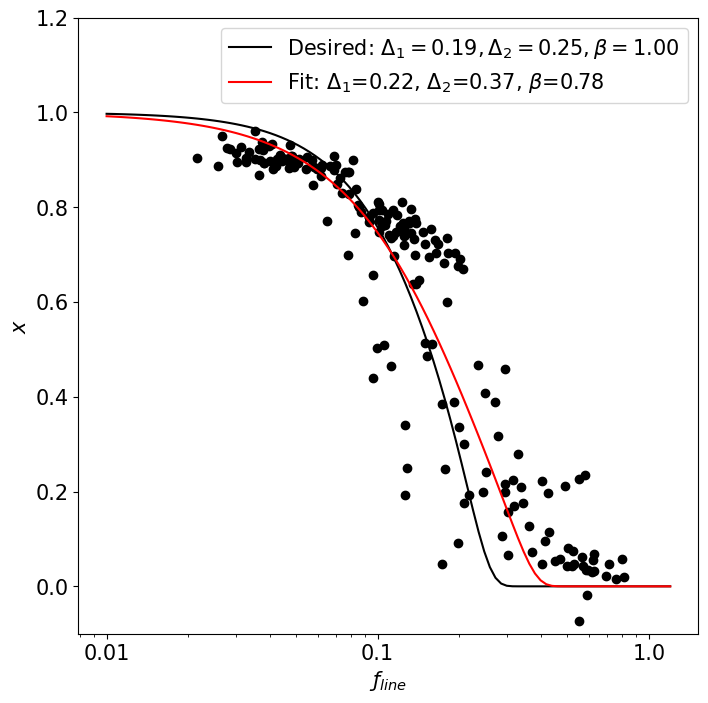

In [330]:
plt.figure(figsize=(8,8))
plt.scatter(x111, y111, color='black')

#ii = np.linspace(0, 1.2, 101)
ii = np.logspace(np.log10(0.01), np.log10(1.2), 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired: $\Delta_1=0.19, \Delta_2=0.25, \\beta=1.00$')
plt.plot(ii, universal_function(ii, *popt), 'r-', label='Fit: $\Delta_1$=%.2f, $\Delta_2$=%.2f, $\\beta$=%.2f' % tuple(popt))

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()

In [267]:
import emcee

def model(params, x):
    d1, d2, b = params
    return np.exp( -(x/d1)**(2*b) ) * np.exp( -(x/d2)**(8) )

def lnlike(params, x, y):
    d1, d2, b = params
    # the likelihood is sum of the lot of normal distributions
    return -0.5 * np.sum( ((y - model(params, x))/1 )**2 )# + np.log(2*np.pi*sigmu**2) )
    
def lnprior(params):
    # The parameters are stored as a vector of values, so unpack them
    d1, d2, b = params
    # Bounds
    if 0.0 < d1 < 0.5 and 0.0 < d2 < 0.5 and 0.5 < b < 1.5:
        return 0.0
    return -np.inf

def lnprob(params, x, y):
    lp = lnprior(params)
    if np.isfinite(lp):
          return lp + lnlike(params, x, y)
    else:
          return -np.inf

In [279]:
x111 = [item for sublist in fline_all[0:24] for item in sublist]
y111 = [item for sublist in iks_all[0:24] for item in sublist]

print(len(x111))
print(len(y111))

for j in range(0, len(y111)):
    
    if y111[j] > 1.2 or y111[j] <= 0:
        x111[j] = "k"
        y111[j] = "k"

x111 = [i for i in x111 if i != "k"]
y111 = [i for i in y111 if i != "k"]

print(len(x111))
print(len(y111))

216
216
192
192


In [280]:
#x111 = np.linspace(0, 1.2, 101)
#x111 = np.logspace(np.log10(0.01), np.log10(1.2), 101)
#y111 = universal_function(x111, 0.19, 0.25, 1.00) + np.random.normal(0, 0.4, size=101)
#plt.scatter(x111, y111)
#lt.xscale('log')

In [284]:
#def best_with_emcee(dtTrue, dmTrue, lengthofchain, arguments, draw):

true_delta1, true_delta2, true_beta = 0.25, 0.25, 1.0

nwalkers = 100
initial = [0.5, 0.5, 0.5]
ndim = len(initial)

# make the initial values more noisy
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args = (x111, y111) )

#p0, _, _ = sampler.run_mcmc(p0, 500, progress=True)
#sampler.reset()
lengthofchain = 500
pos,prob,state = sampler.run_mcmc(p0, lengthofchain, progress = False)

/home/aleksei/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


In [285]:
samples = sampler.flatchain
params_best  = samples[np.argmax(sampler.flatlnprobability)]
#randoms = np.random.randint(len(samples), size=50)

#print("Initial dt = {0:.3f}".format(initial[0]))
#print("Initial dm = {0:.3f}".format(initial[1]))
#print("sigmu = {0:.3f}".format(optim.x[2]))

#print('Best dt = {0:.3f}'.format(s[0]))
#print('Best dmu = {0:.3f}'.format(s[1])) 
#print('or best magnification ratio = {0:.3f}'.format(10**(-0.4*s[1])) )


#for params in samples[randoms]:
#  plt.plot(arguments[0], model(params, arguments[0], arguments[2], arguments[3]), color="b", alpha=0.1)

#best_fit_model = model(params_best, arguments[0], arguments[2], arguments[3])

#return params_best[0], params_best[1], samples[randoms]

#best_dt, best_dm, srand = best_with_MCMC(dtTrue=dt_true, 
#                              dmTrue=dm_true, 
#                              lengthofchain=500, 
#                              arguments=(t1_grid, lc1_noise, t2_grid, lc2_noise), 
#                              draw=True)
#print(best_dt, best_dm)
params_best

array([0.23498303, 0.49930648, 0.71244306])

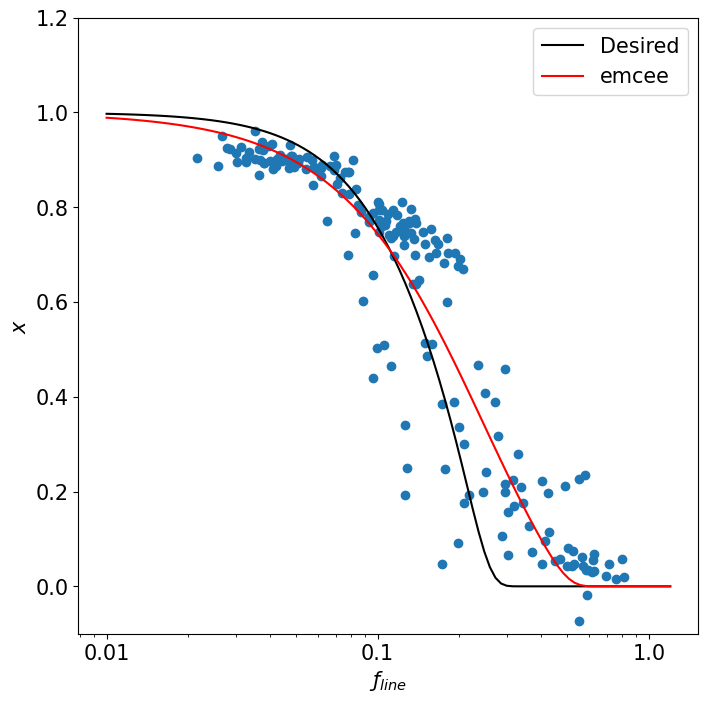

In [329]:
plt.figure(figsize=(8,8))
plt.scatter(x111, y111)

#ii = np.linspace(0, 1.2, 101)
ii = np.logspace(np.log10(0.01), np.log10(1.2), 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')
plt.plot(ii, model(params_best, ii), color='red', linestyle='-', label = 'emcee')

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()

In [ ]:

    #if False:
    #  fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
    #  chain = sampler.get_chain()
    #  labels = ['$\Delta t$', '$\Delta m$', '$\sigma_m$']
    #  for i in range(ndim):
    #      ax = axes[i]
    #      ax.plot(chain[:, :, i], "k", alpha=0.3)
    #      ax.set_xlim(0, len(chain))
    #      ax.set_ylabel(labels[i])
    #      ax.yaxis.set_label_coords(-0.1, 0.5)
    #  axes[-1].set_xlabel("step number")
      #tau = sampler.get_autocorr_time()
      #print(tau)
      #flat_samples = sampler.get_chain()#discard=400, thin=1, flat=False)
      #print(flat_samples.shape)

    #  fig = corner.corner(sampler.flatchain, 
    #                      show_titles=True, 
    #                      labels=['$\Delta t$', '$\Delta m$'], 
    #                      truths=[dt_true, dm_true], 
    #                      scale_hist=True, 
    #                      quantiles=[0.16, 0.5, 0.84])


Some results:

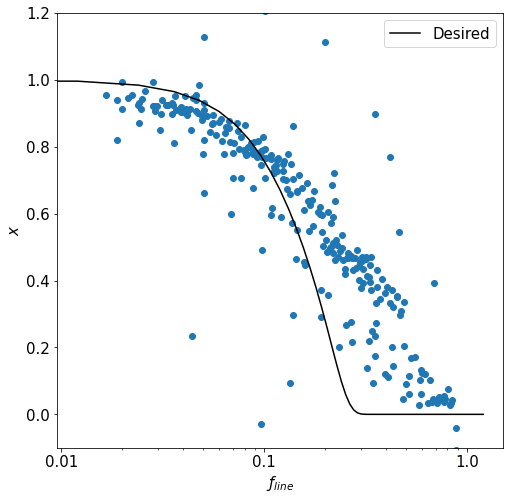

In [154]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

iks_all = []
fline_all = []

T_mins = (1., 2., 3., 1., 2., 3., 1., 2., 3.)
T_maxs = (2., 4., 6., 3., 6., 9., 4., 8., 12.)

for metallicity in (0.1, 0.3, 1.0):

    for T_min, T_max in list(zip(T_mins, T_maxs)):
        
        name_key = str(metallicity)+': '+str(T_min)+'-'+str(T_max)

        # continuum
        Tspec_list1 = Tspec_cont_f6[name_key]
        Flux_list1 = Flux_cont_f6[name_key]

        # realistic metallicities
        Tspec_list2 = single_T_fit_f6[name_key]
        Flux_list2 = Flux_fit_f6[name_key]

        #line-dominated
        Tspec_list3 = Tspec_lines_f6[name_key]
        Flux_list3 = Flux_lines_f6[name_key]

        num_iks = [tsp - tli for tsp, tli in zip(Tspec_list2, Tspec_list3)]
        denom_iks = [tco - tli for tco, tli in zip(Tspec_list1, Tspec_list3)]
        iks = [numx/denomx for numx, denomx in zip(num_iks, denom_iks)]

        num_fline = Flux_list3
        denom_fline = Flux_list2 #[Fli + Fco for Fli, Fco in zip(Flux_list3, Flux_list1)]
        fline = [numf/denomf for numf, denomf in zip(num_fline, denom_fline)]

        iks_all.append(iks)
        fline_all.append(fline)

        #plt.scatter(fline, iks)

plt.scatter(fline_all, iks_all)


#plt.scatter(fline_all_1, iks_all_1, label = 'Z = 0.1')
#plt.scatter(fline_all_2, iks_all_2, label = 'Z = 0.3')
#plt.scatter(fline_all_3, iks_all_3, label = 'Z = 1.0')

#for ii in np.linspace(0, 1.2, 101):
ii = np.linspace(0, 1.2, 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')

#handles, labels = plt.gca().get_legend_handles_labels()
#line_n = Line2D([], [], label='Continuum', color='black', linestyle='--', linewidth=2)
#line_e = Line2D([], [], label='Lines', color='black', linestyle=':', linewidth=2)
#dots_f = Line2D([], [], label='Single-T fit from Xspec', color='black', marker='.', linestyle='None', markersize=12)
#handles.extend([line_n, line_e, dots_f])
#plt.legend(handles=handles, fontsize=15)

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()